# Project: Bank of America Consumer Complaint Analysis

## Table of Contents
<ol>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#wrangling">Data Wrangling</li>
    <li><a href="#eda">Exploratory Data Analysis</a></li>
        <ul>
            <li><a href="#ta">Trend Analysis by Product</a></li>
            <li><a href="#ra">Response Analysis by Year</a></li>
            <li><a href="#aci">Analysis of Common Issues</a></li>
            <li><a href="#ca">Channel Analysis</a></li>
            <li><a href="#sp">Seasonal Patterns in Complaints</a></li>
            <li><a href="#tr">Timeliness and Effectiveness of Responses</a></li>
            <li><a href="#ssa">State-Specific Analyses</a></li>
        </ul>
<li><a href="#bff">Business Findings from EDA</li>
<li><a href="#conclusion">Recommendations and Conclusion</a></li>
</ol>

<a id='intro'></a>
## Introduction
<p>Bank of America (BoA), a financial institution based in the United States, has received numerous customer complaints over the years. To address this, BoA has decided to analyze consumer complaints related to its financial products and services from 2017 to 2023. A comprehensive dataset has been provided, containing detailed information on each complaint, including submission and receipt dates, associated products and issues, and BoA’s responses. This case study invites analysts and policymakers to explore the dataset to uncover insights and develop strategies for addressing customer complaints more effectively.</p>
   
## Objective
<p>The primary goal of this case study is to analyze the data, identify patterns, and propose informed, data-driven recommendations that BoA can implement to effectively address and reduce customer complaints.</p>

In [1]:
# Use this cell to set up import statements for all of the packages to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Data Wrangling
### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_excel('Consumer_Complaints.xlsx')

#code to inspect the first 10 lines
df.head()

Complaint ID Submitted via Date submitted Date received State  \
0       4848023      Referral     2021-10-24    2021-10-27    NY   
1       3621464           Web     2020-04-24    2020-04-24    FL   
2       5818349           Web     2022-07-27    2022-07-27    CA   
3       7233015      Referral     2023-07-10    2023-07-11    CA   
4       5820224      Referral     2022-07-27    2022-07-28    VA   

                                             Product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3                        Credit card or prepaid card   
4                        Credit card or prepaid card   

                                  Sub-product  \
0                  Conventional home mortgage   
1                   Refund anticipation check   
2                            Credit reporting   
3                General-purpose prepaid card   
4  General-purpose credit card or charge card   

                                               Issue  \
0  Applying for a mortgage or refinancing an exis...   
1                               Lost or stolen check   
2               Incorrect information on your report   
3       Problem getting a card or closing an account   
4                               Closing your account   

                                           Sub-issue  \
0                                                NaN   
1                                                NaN   
2                      Account information incorrect   
3  Trouble getting, activating, or registering a ...   
4                        Company closed your account   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1  Company has responded to the consumer and the ...   
2  Company has responded to the consumer and the ...   
3                                                NaN   
4  Company has responded to the consumer and the ...   

  Company response to consumer Timely response?  
0      Closed with explanation              Yes  
1  Closed with monetary relief              Yes  
2      Closed with explanation              Yes  
3                  In progress              NaN  
4      Closed with explanation              Yes

In [3]:
#Now, to find the number of rows and columns in our data
df.shape

(62516, 12)

>**Observation:** Our dataset has 62,516 rows/observations in 12 columns

In [4]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62516 entries, 0 to 62515
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Complaint ID                  62516 non-null  int64         
 1   Submitted via                 62516 non-null  object        
 2   Date submitted                62516 non-null  datetime64[ns]
 3   Date received                 62516 non-null  datetime64[ns]
 4   State                         62516 non-null  object        
 5   Product                       62516 non-null  object        
 6   Sub-product                   62509 non-null  object        
 7   Issue                         62516 non-null  object        
 8   Sub-issue                     51658 non-null  object        
 9   Company public response       60341 non-null  object        
 10  Company response to consumer  62516 non-null  object        
 11  Timely response?            

>**Observation:** There is only one column with numeric data - Complaint ID, 2 with datetime datatype, and the remaining 9 columns with object datatypes i.e string/text

In [5]:
#Get the total number of missing values in the dataset
df.isnull().any(axis=1).sum()

12785

>**Observation:** There are 12,785 missing values in our dataset 

In [6]:
#Get the columns with missing values and their counts
df.isnull().sum()

Complaint ID                        0
Submitted via                       0
Date submitted                      0
Date received                       0
State                               0
Product                             0
Sub-product                         7
Issue                               0
Sub-issue                       10858
Company public response          2175
Company response to consumer        0
Timely response?                 1494
dtype: int64

>**Observation:** There are 3 columns with missing values

<ul>
    <li> Sub-issue </li>
    <li> Company public response </li>
    <li> Timely response? </li>
</ul>

In [7]:
# Fill Null Values in Timely response? column with "In progress"
df['Timely response?'].fillna("In progress", inplace = True)
df['Company public response'].fillna("No response", inplace = True)

In [8]:
# Confirm there are no more null values in Company public response column
u_p_r = df['Company public response'].unique()
print(f'Unique Public responses: \n {u_p_r} \n')

# Confirm there are no more null values in Timely response? column
u_t_r = df['Timely response?'].unique()
print(f'Unique Timely responses: \n {u_t_r}')

Unique Public responses: 
 ['Company has responded to the consumer and the CFPB and chooses not to provide a public response'
 'No response'
 "Company believes the complaint provided an opportunity to answer consumer's questions"
 'Company disputes the facts presented in the complaint'
 'Company believes the complaint is the result of a misunderstanding'
 'Company believes it acted appropriately as authorized by contract or law'
 'Company believes complaint caused principally by actions of third party outside the control or direction of the company'] 

Unique Timely responses: 
 ['Yes' 'In progress' 'No']


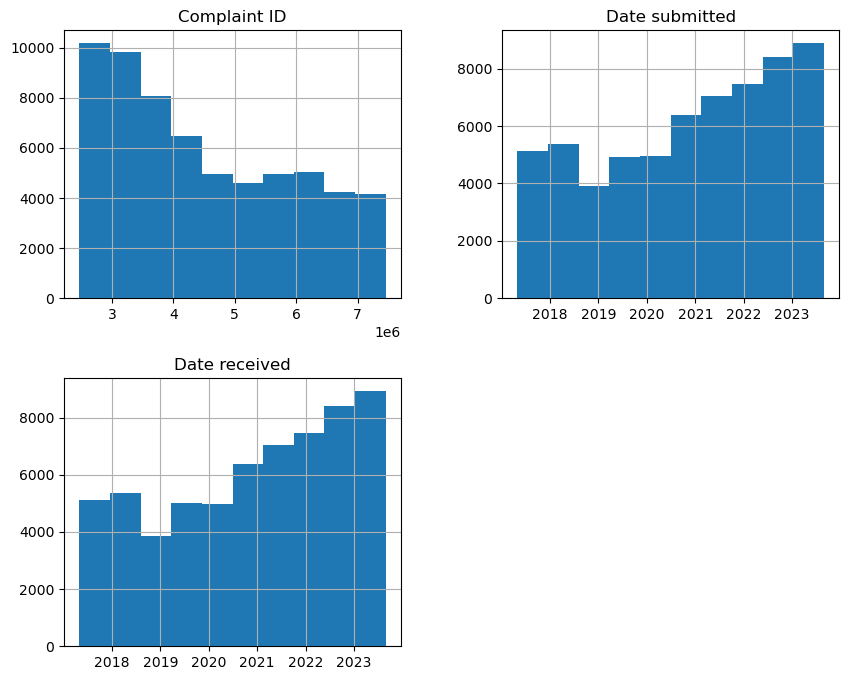

In [9]:
#View the histogram of the entire data
df.hist(figsize=(10,8));

>**Observation:** The <i>Date submitted</i> and <i>Date received</i> columns are skewed to the left, showing that the complaints kept increasing from 2017

In [10]:
#Statistical Overview of the dataset
df.describe()

Complaint ID                 Date submitted  \
count  6.251600e+04                          62516   
mean   4.512642e+06  2020-11-24 16:07:14.883869696   
min    2.471340e+06            2017-05-01 00:00:00   
25%    3.254020e+06            2019-05-22 00:00:00   
50%    4.178582e+06            2021-03-02 00:00:00   
75%    5.771284e+06            2022-07-14 00:00:00   
max    7.458912e+06            2023-08-28 00:00:00   
std    1.442917e+06                            NaN   

                       Date received  
count                          62516  
mean   2020-11-25 21:31:05.071341568  
min              2017-05-01 00:00:00  
25%              2019-05-28 00:00:00  
50%              2021-03-03 00:00:00  
75%              2022-07-15 00:00:00  
max              2023-08-28 00:00:00  
std                              NaN

>**Observaions:** The earliest complaint was submitted on May 1, 2017 and received same day, the latest complaint was submitted and received on August 28, 2023.

In [11]:
#Check for duplicated values
sum(df.duplicated())

0

>**Observation:** There are no duplicated values in our dataset

In [12]:
# Check if there is any observation/complaint without complaint ID
df['Complaint ID'].isnull().sum()

0

>**Observation:** There is no complaint without a complaint ID <br>
So we're good to go

<a id='eda'></a>
## Exploratory Data Analysis (EDA)

<a id="ta"></a>
#### Below are some EDA steps taken on the dataset
>#### **(A) Trend Analysis by Product:**
<p><ol>
    <li>Track complaints over time for each Product to identify which services have seen increases or decreases in complaints.</li>
    <li>Assess if specific Sub-products are more problematic within broader categories.</li>
</p>

In [13]:
# Calculate the total number of complaints for each product
product_complaint_counts = df['Product'].value_counts()

print("Total number of complaints for each product: \n", product_complaint_counts)

Total number of complaints for each product: 
 Product
Checking or savings account                                                     24814
Credit card or prepaid card                                                     16197
Credit reporting, credit repair services, or other personal consumer reports     7710
Mortgage                                                                         6601
Money transfer, virtual currency, or money service                               3453
Debt collection                                                                  2736
Vehicle loan or lease                                                             633
Payday loan, title loan, or personal loan                                         333
Student loan                                                                       39
Name: count, dtype: int64


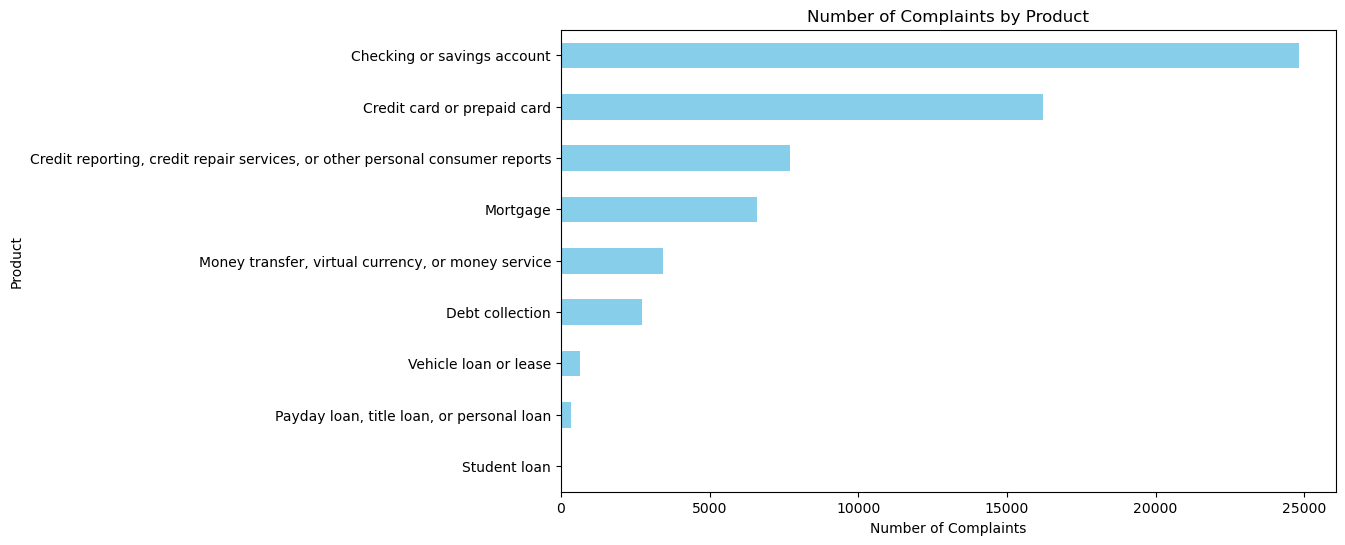

In [14]:
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
product_complaint_counts.plot(kind='barh', color='skyblue')
plt.title('Number of Complaints by Product')
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.gca().invert_yaxis()  #to have the highest count on top
plt.show()

>**Observation**: The top three products with highest complaints in the period considered are:
uol>
    <li>Checking or savings account with <b>24,814 total</b> complaints</li>
    <li>Credit card or prepaid card with <b>16,197 total</b> complaints, and</li>
    <li>Credit reporting, credit repair services, or other personal consumer reports with <b>7,710 complants </b><
</ul>ol>i>

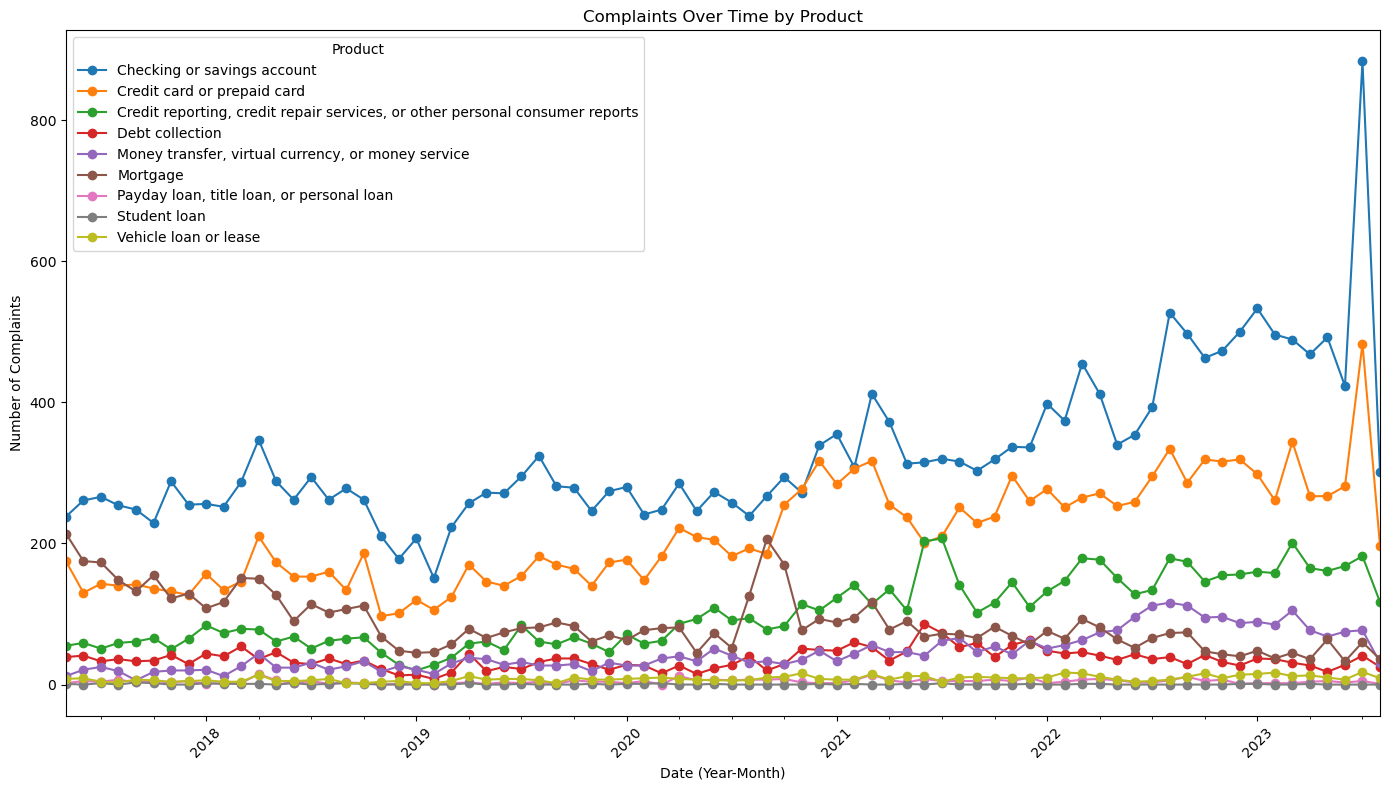

In [15]:
# Feature Engineering: Create a 'Year-Month' column from the 'Date submitted' column
df['Year_Month'] = df['Date submitted'].dt.to_period('M')

# Group by 'Year_Month' and 'Product' and count complaints
complaints_over_time = df.groupby(['Year_Month', 'Product']).size().unstack(fill_value=0)

# Plot the trends for each product
plt.figure(figsize=(14, 8))
complaints_over_time.plot(ax=plt.gca(), marker='o', linestyle='-')
plt.title('Complaints Over Time by Product')
plt.xlabel('Date (Year-Month)')
plt.ylabel('Number of Complaints')
plt.legend(title='Product', loc='upper left')
plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.show()

>**Observations:**
<p>From the chart above, the following can be observed</p>
<ul>
    <li>Complaints from the <i>Checking or savings account</i> product category have always been higher than from any othe category per time</li>
    <li><i>Student loan, Vehicle loan or lease, and Payday loan....</i> categories have almost a constant trend i.e rarely any spikes and they have the lowest number of complaints over the period as well</li>
    <li>The trend lines indicate seasonal spikes in complaints for some product categories, especially between the 2nd and 3rd quarters of each year</li>
</ul>

<a id='ra'><a/>
>#### **(B) Response Analysis by Year:**
<p>Analyze <i>Company response</i> to consumer and <i>Timely response?</i> over the years to see if response rates or resolution types have improved or worsened.</p>


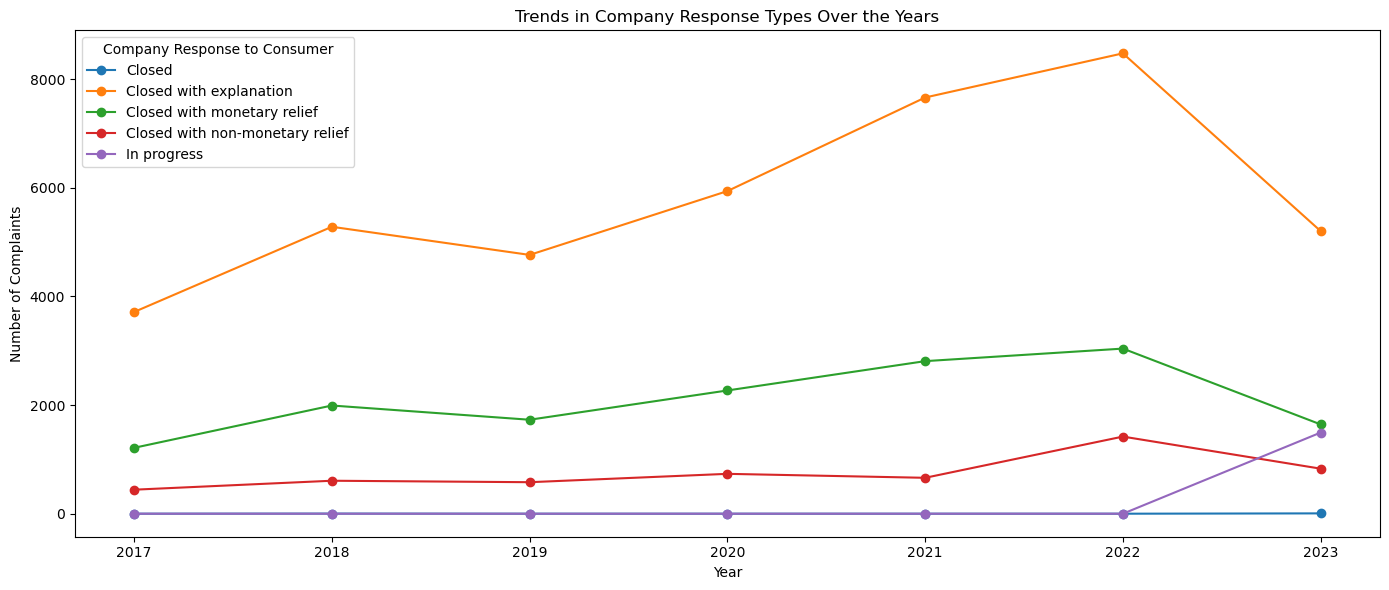

In [16]:
# Extract the year from 'Date received' or 'Date submitted'
df['Year'] = df['Date received'].dt.year

# Group by 'Year' and 'Company response to consumer' to get annual counts for each response type
response_trends = df.groupby(['Year', 'Company response to consumer']).size().unstack(fill_value=0)

# Plotting response trends over time
plt.figure(figsize=(14, 6))
response_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends in Company Response Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend(title='Company Response to Consumer', loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

>**Observations:**
<ul>
    <li>BoA has a <b>high <i>"Closed with explanation"</i> rate </b>compared with other Response Types,</li>
    <li>Next is <i>"Closed with monetary relief"</i>, though, this represents a substantial number, as it means that were complaints cannot be closed with just explanation, the next option is to close with monetary relief. BoA may need to look at how to reduce this.</li>
    <li>There are <b>no <i>"In progress"</i> </b>requests from previous years except for 2023</li>
    <li>Only a few complaints were resolved with <i>"Closed"</i> through the years, meaning it is rare to simply close complaints with no explanation or a sort of relief</li>
</ul>

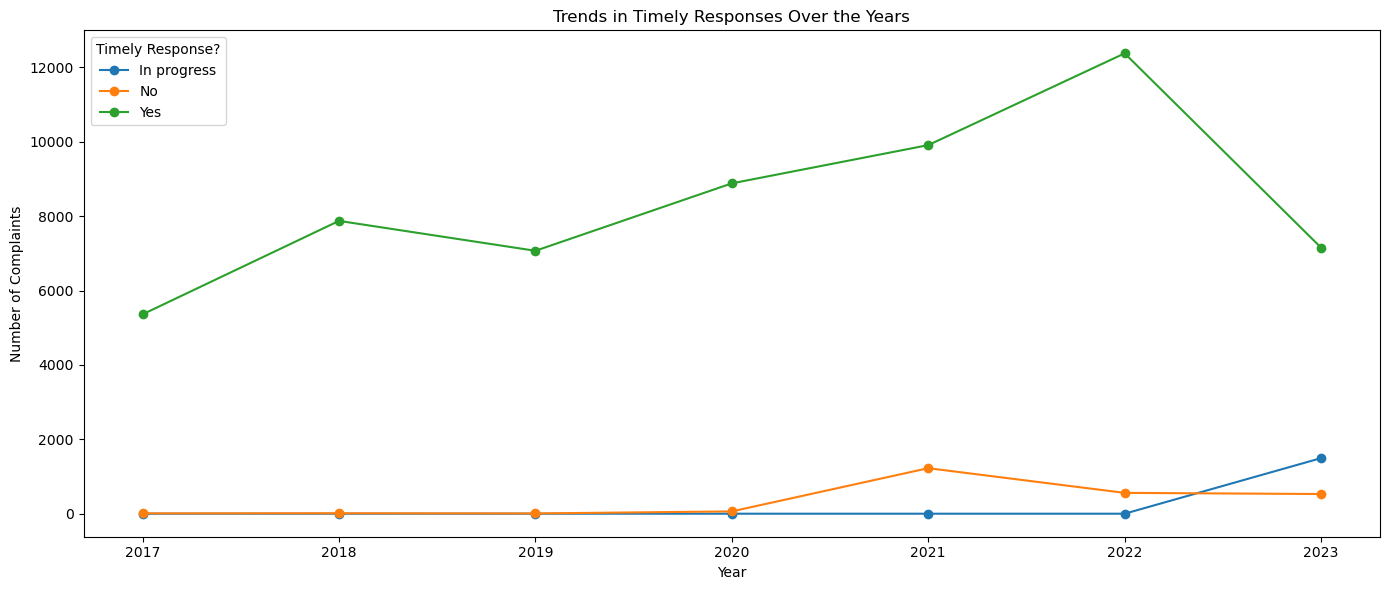

In [17]:
# Group by 'Year' and 'Timely response?' to get annual counts for timely vs. untimely responses
timely_trends = df.groupby(['Year', 'Timely response?']).size().unstack(fill_value=0)

# Plotting timely response trends over time
plt.figure(figsize=(14, 6))
timely_trends.plot(kind='line', marker='o', ax=plt.gca())
plt.title('Trends in Timely Responses Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Complaints')
plt.legend(title='Timely Response?', loc='upper left')
plt.grid(False)
plt.tight_layout()
plt.show()

>**Observations:** 
<ul>
    <li>It can be seen that the company responded timely to most complaints over the years, with all complaints responded on time between 2017 and 2020,</li>
    <li>Between 2021 and 2023, the number of timely responses with 'No' response increased</li>
    <li>2022 is the year with most number of timely responses</li>
</ul>

<a id='aci'></a>
>#### **(C) Analysis of Common Issues:**
<p>Identify the most common issues and sub-issues for each product. This is to help target problem areas with the most significant complaint volumes.</p>



In [18]:
# Calculate the total number of issues for each product
issues_counts = df.groupby(['Product'])['Issue'].value_counts()

issues_counts

Product                      Issue                                                                           
Checking or savings account  Managing an account                                                                 15109
                             Closing an account                                                                   2953
                             Opening an account                                                                   2725
                             Problem with a lender or other company charging your account                         2493
                             Problem caused by your funds being low                                               1330
                                                                                                                 ...  
Vehicle loan or lease        Struggling to pay your loan                                                            60
                             Incorrect information on you

In [19]:
# Get list of unique products from our Product column
unique_products = df['Product'].unique()  

# Print list of unique products
print("List of Products:")
print(*unique_products, sep='\n')

List of Products:
Mortgage
Money transfer, virtual currency, or money service
Credit reporting, credit repair services, or other personal consumer reports
Credit card or prepaid card
Checking or savings account
Vehicle loan or lease
Debt collection
Payday loan, title loan, or personal loan
Student loan


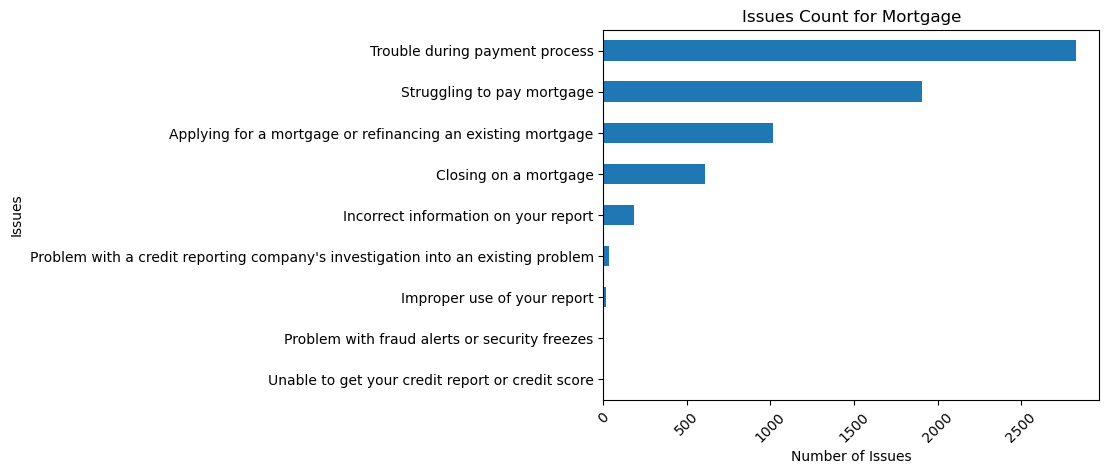

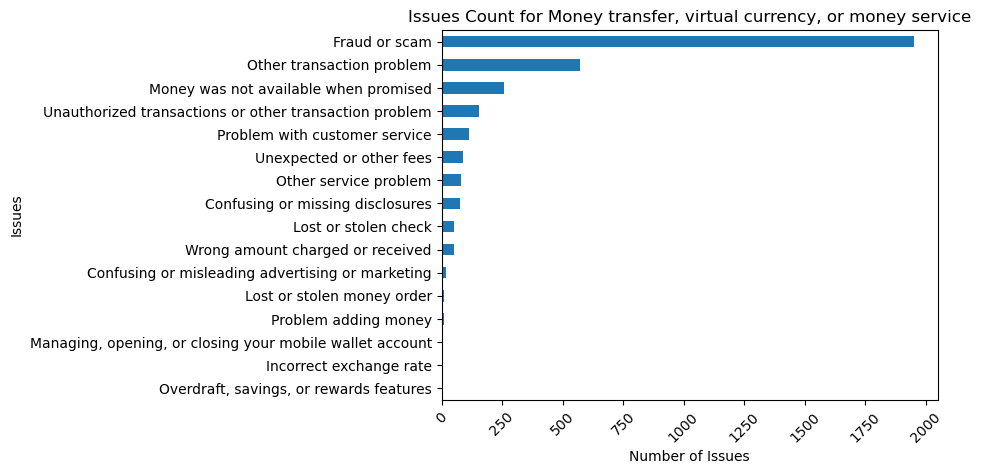

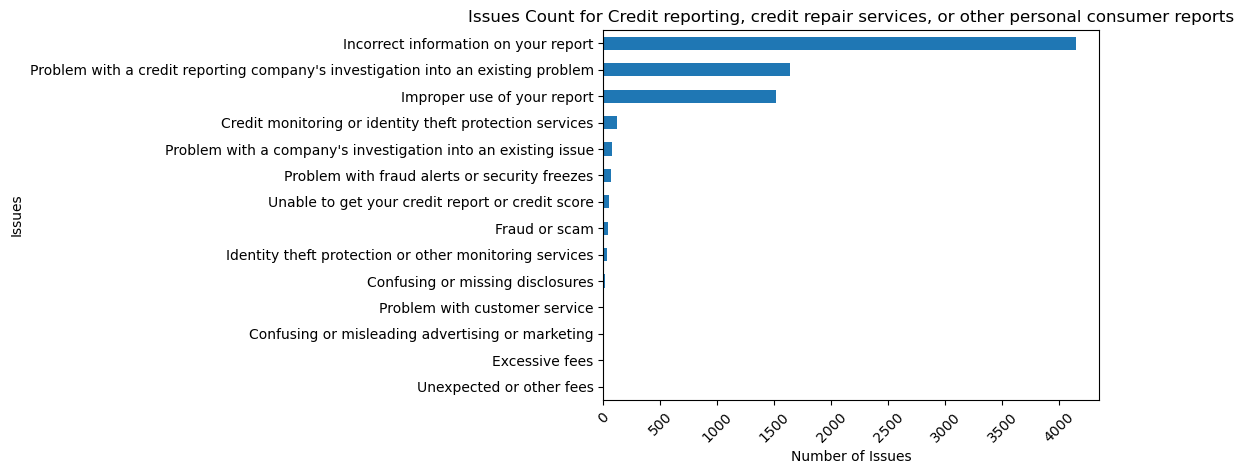

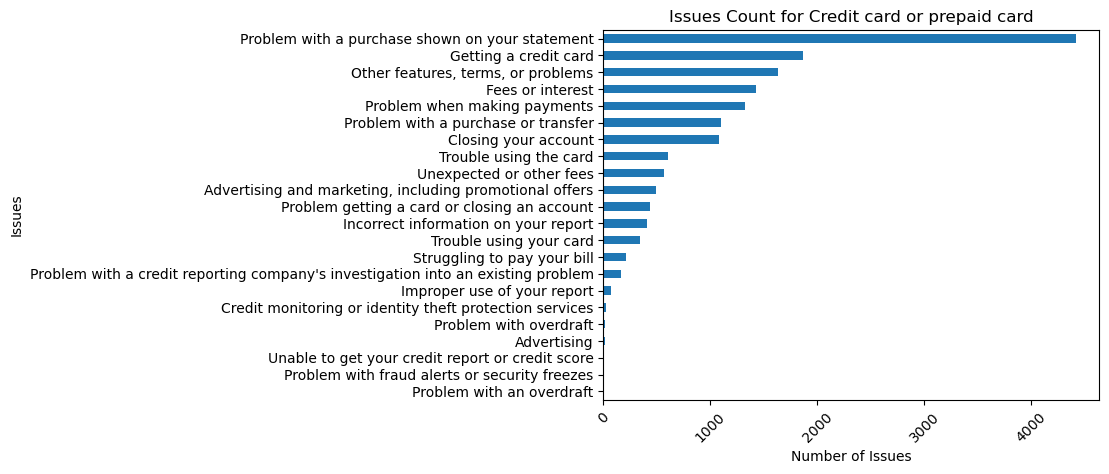

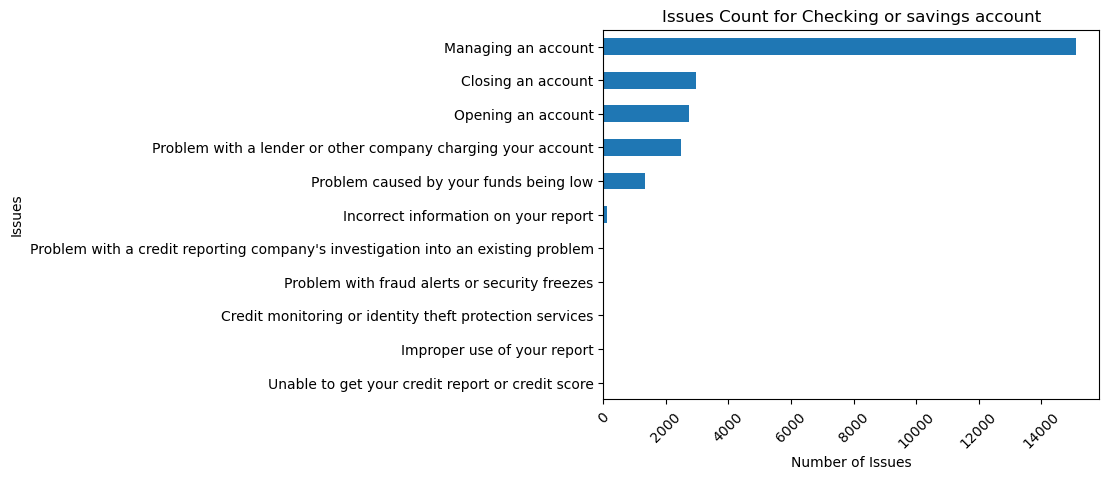

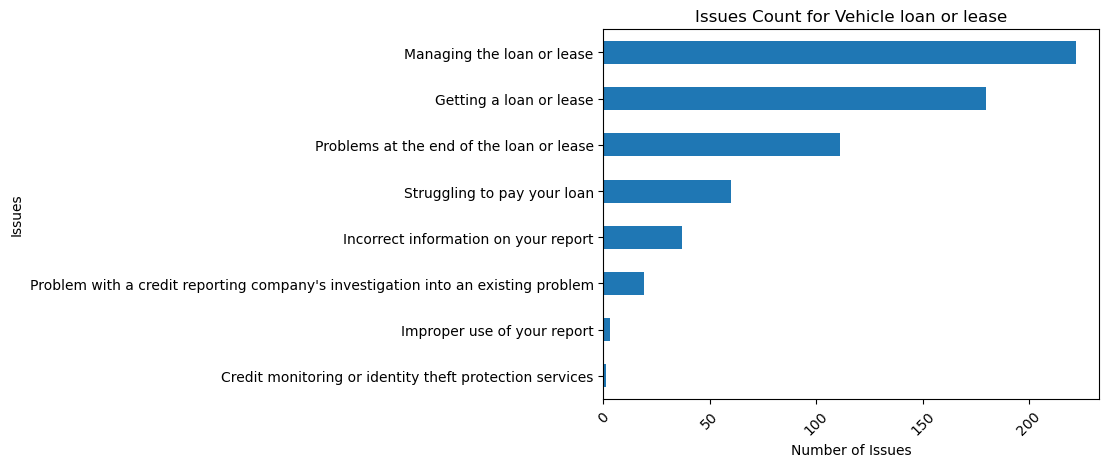

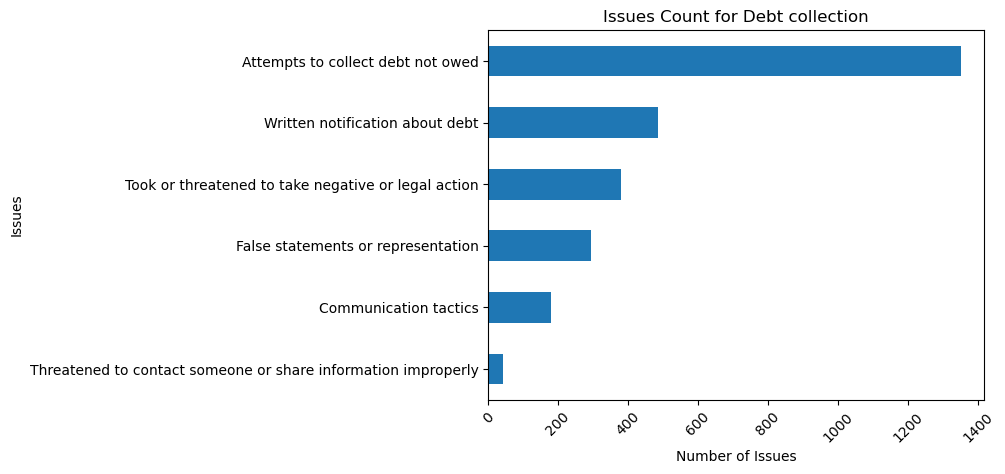

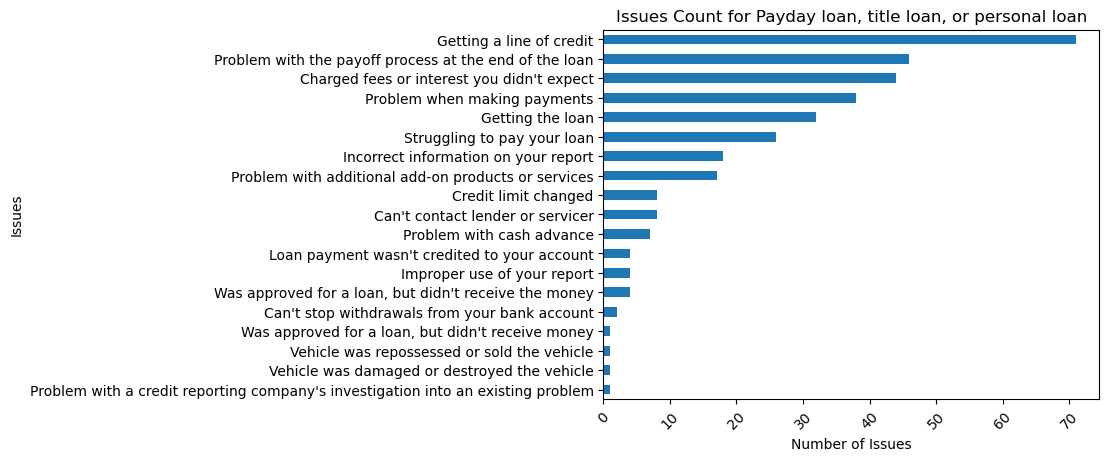

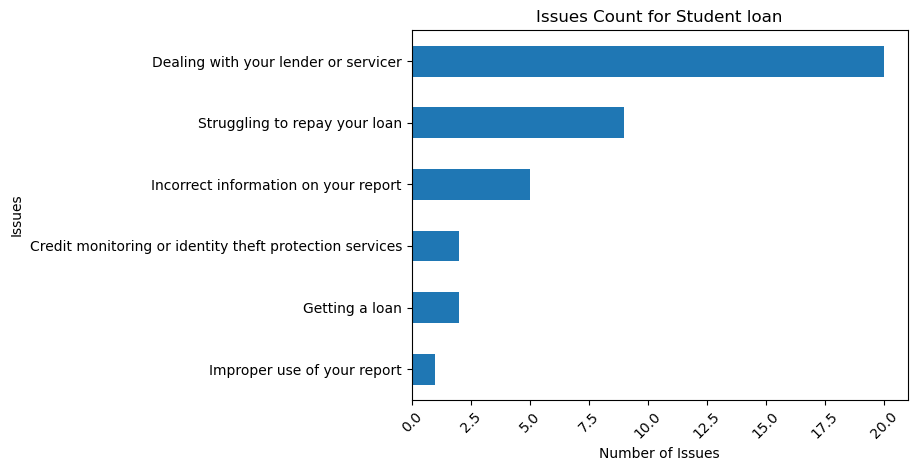

In [20]:
# Plot issues by unique products
for product in unique_products:  
    # Filter the issue counts for the current product  
    product_issues = issues_counts[product]  
    
    # Plotting  
    plt.figure()  
    product_issues.plot(kind='barh')  
    plt.title(f'Issues Count for {product}')  
    plt.xlabel('Number of Issues')  
    plt.ylabel('Issues')  
    plt.xticks(rotation=45)  
    plt.gca().invert_yaxis()  #to have the highest count on top
    plt.show()  

>**Observations:** For each of the Product categories, the highest issues categories are:
<p>
    <ol>
        <li>Mortgage - <b>Trouble during payment process</b></li>        <li>Money transfer, virtual currency, or money service - <b>Fraud or scam</b></li>
        <li>Credit reporting, credit repair services, or other personal consumer repots - <b>Incorrect information on your report</b></li>
         <li>Credit card or prepaid card - <b>Problem with a purchase shown on your statement</b></li>
        <li>Checking or savings account - <b>Managing an account</b></li>
        <li>Vehicle loan or lease  - <b>Managing the loan or lease</b></li>
        <li>Debt collection - <b>Attempts to collect debt not owed</b></li>
        <li>Payday loan, title loan, or personal loan - <b>Getting a line of credit</b></li>
        <li>Student loan - <b>Dealing with your lender or service</b></li>
    </ol>
</p>

In [21]:
# Calculate the total number of Sub-issues for each Issue
sub_issues_counts = df.groupby(['Issue','Sub-issue']).size()

sub_issues_counts

Issue                                                    Sub-issue                                                       
Advertising                                              Changes in terms from what was offered or advertised                  4
                                                         Confusing or misleading advertising about the card                   10
Advertising and marketing, including promotional offers  Confusing or misleading advertising about the credit card           195
                                                         Didn't receive advertised or promotional terms                      292
Attempts to collect debt not owed                        Debt is not yours                                                   530
                                                                                                                            ... 
Unable to get your credit report or credit score         Other problem getting your report or credit sco

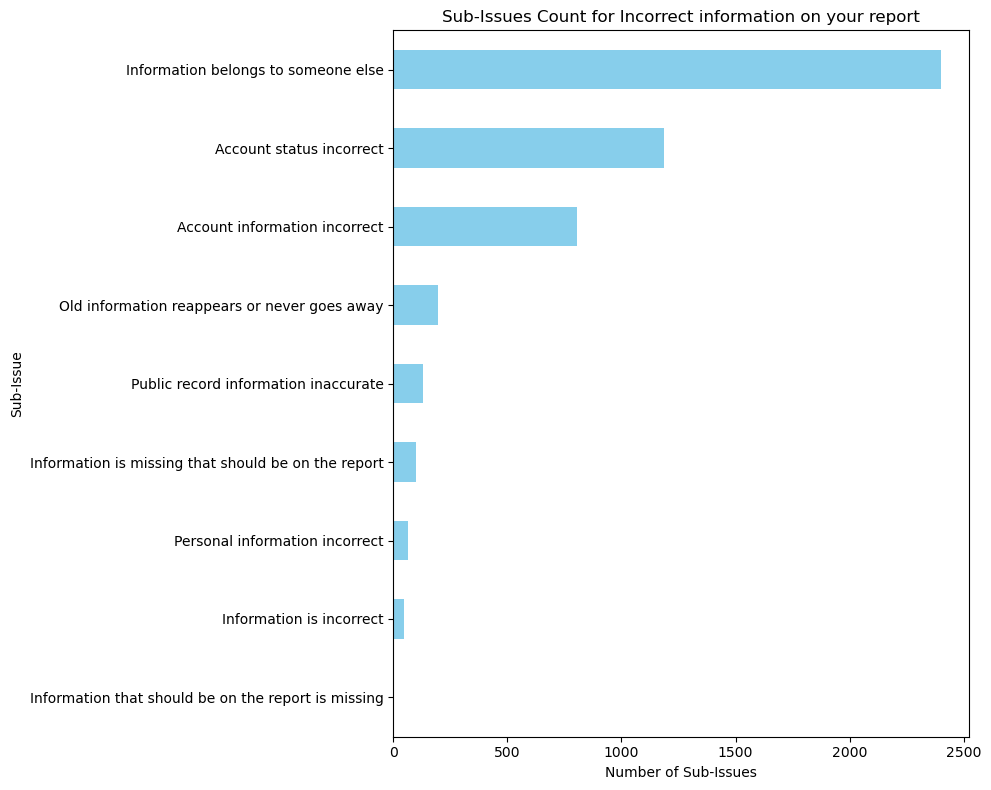

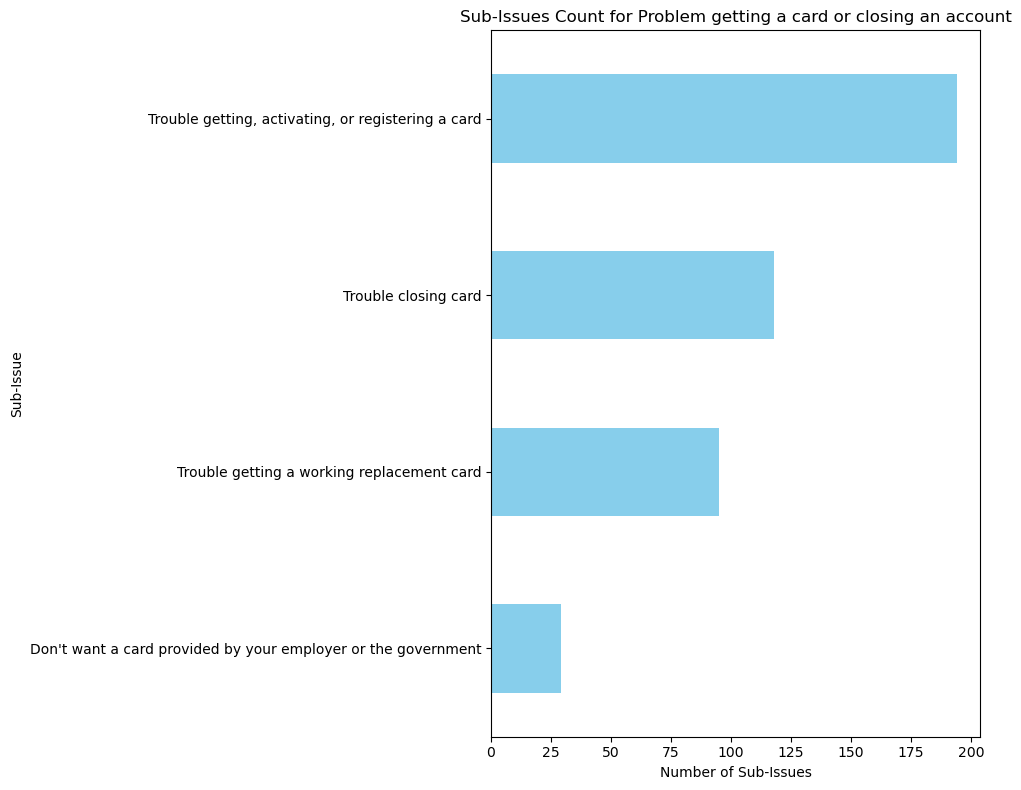

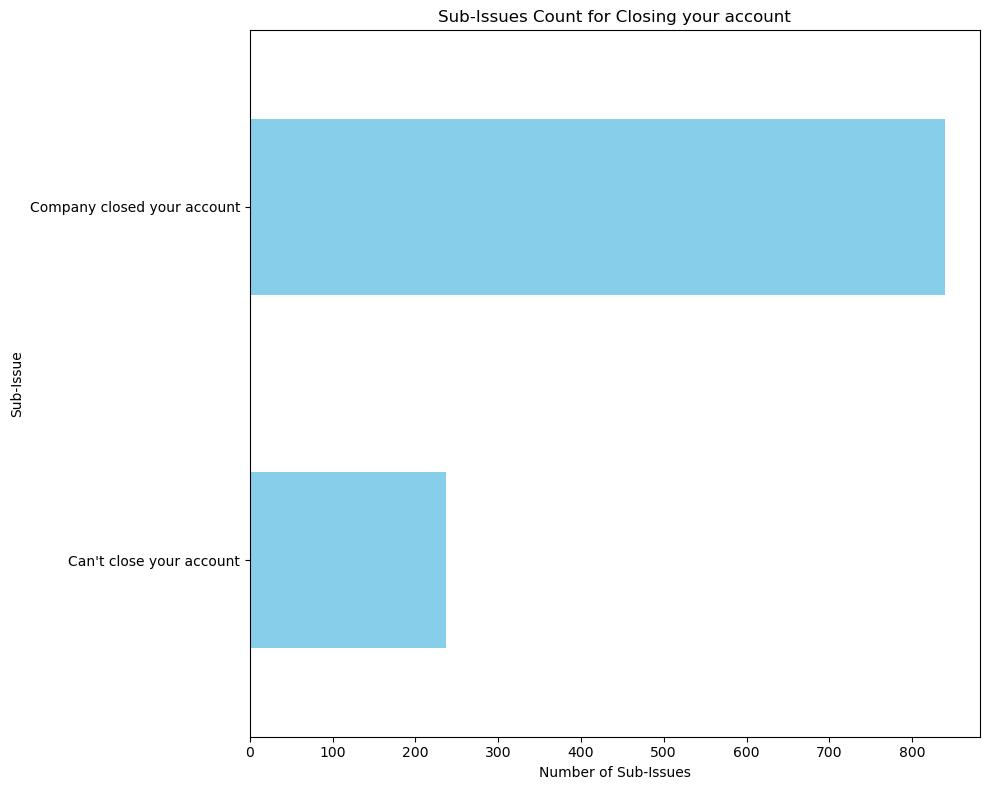

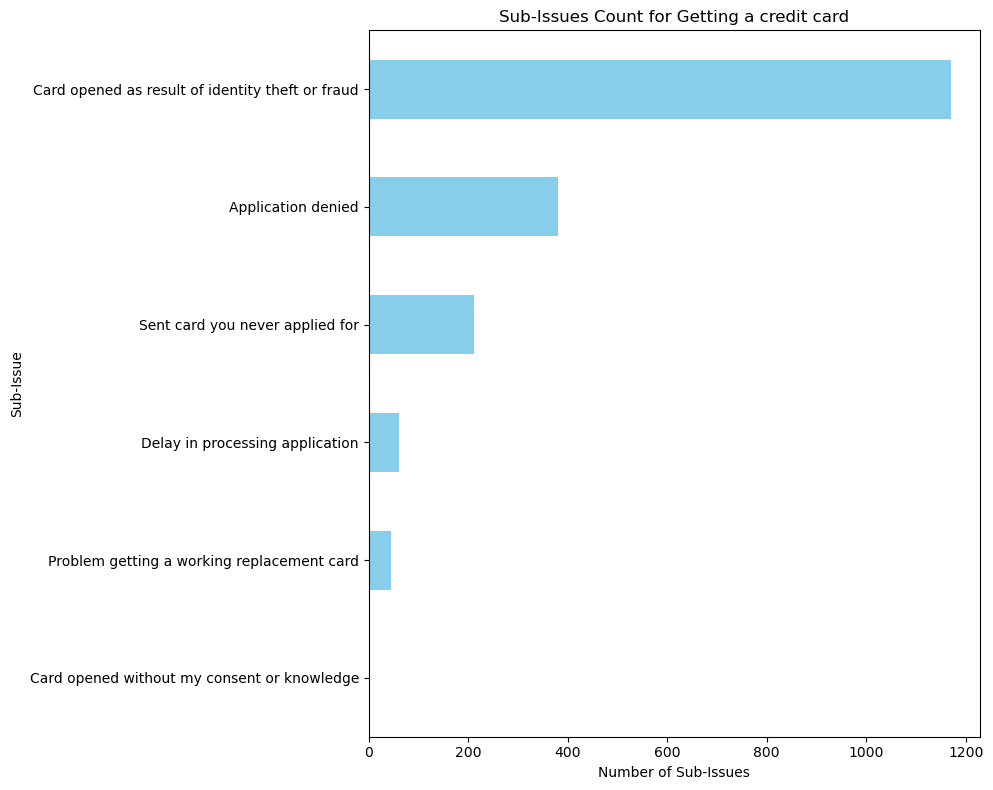

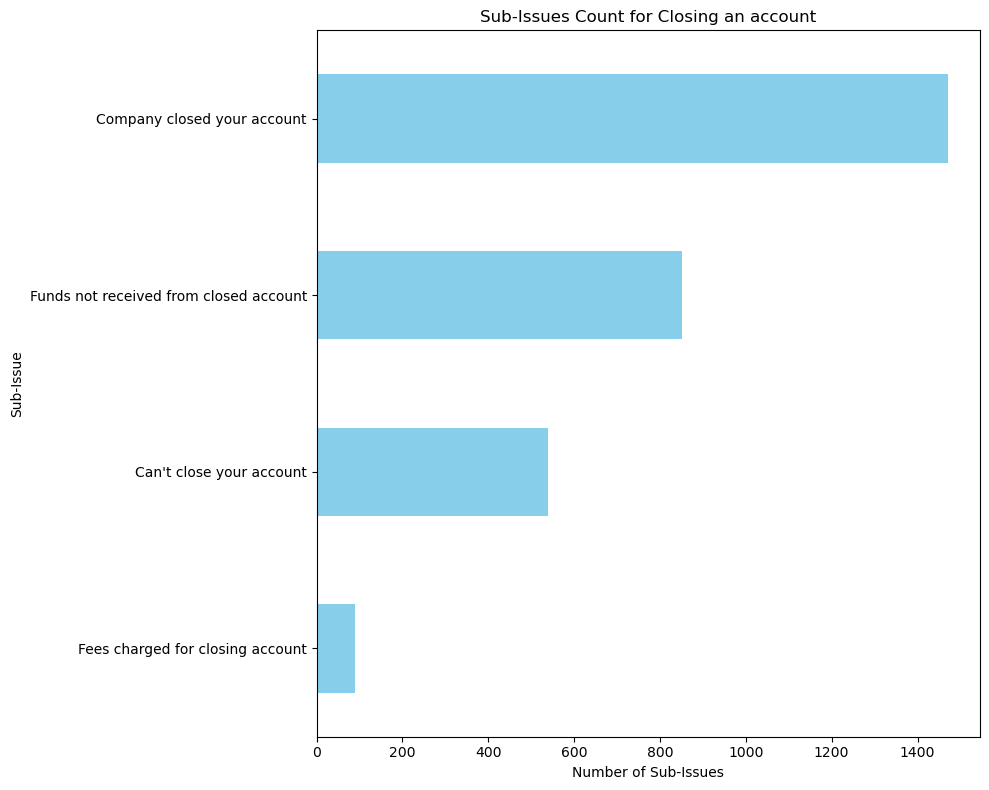

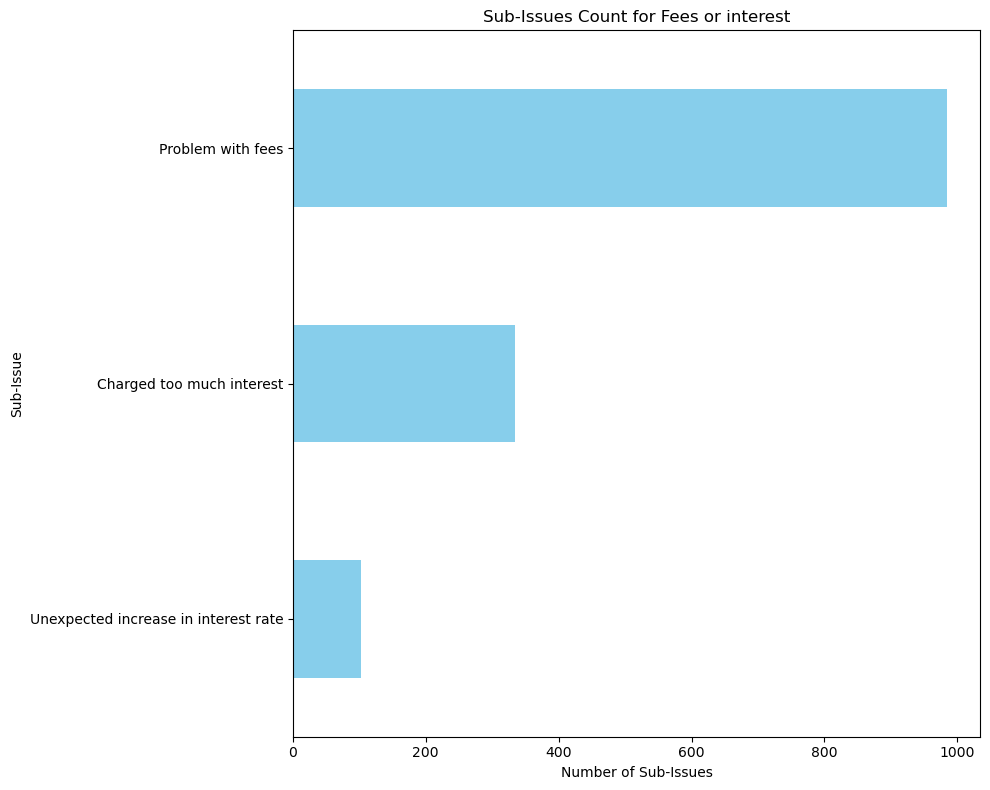

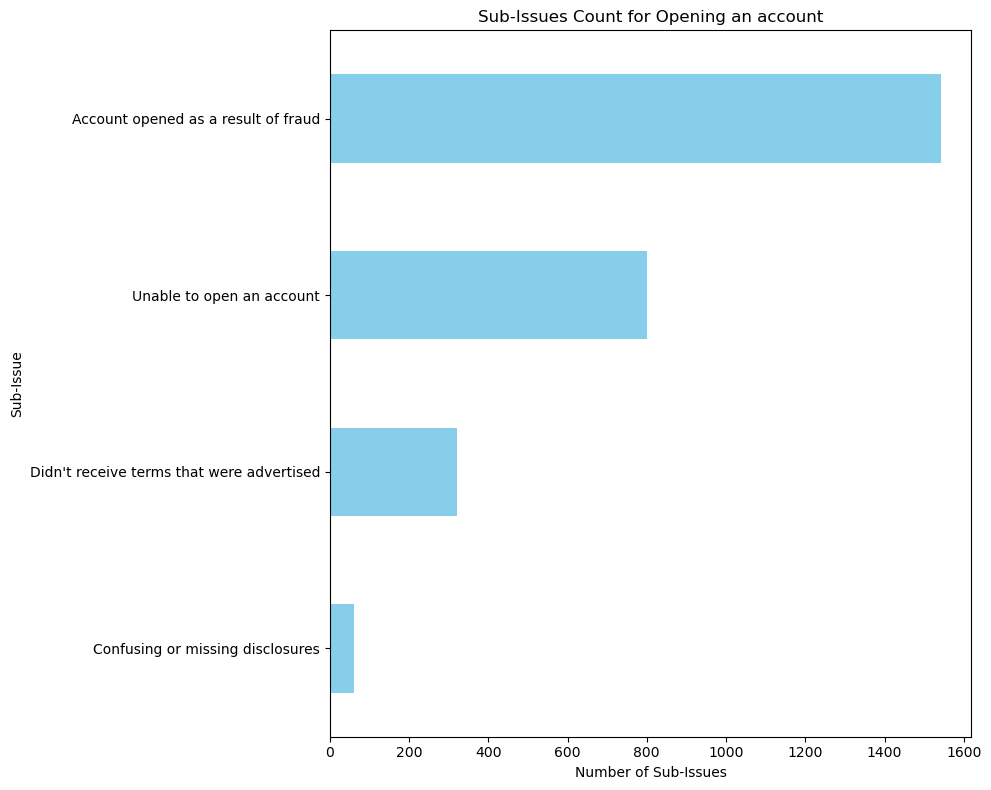

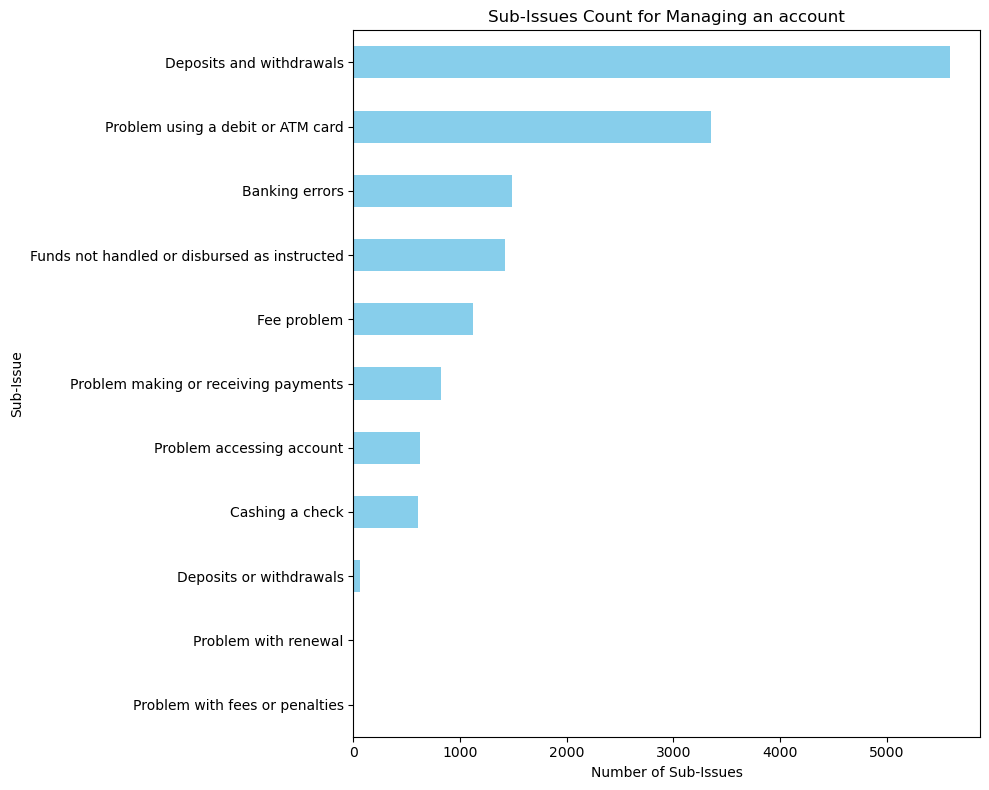

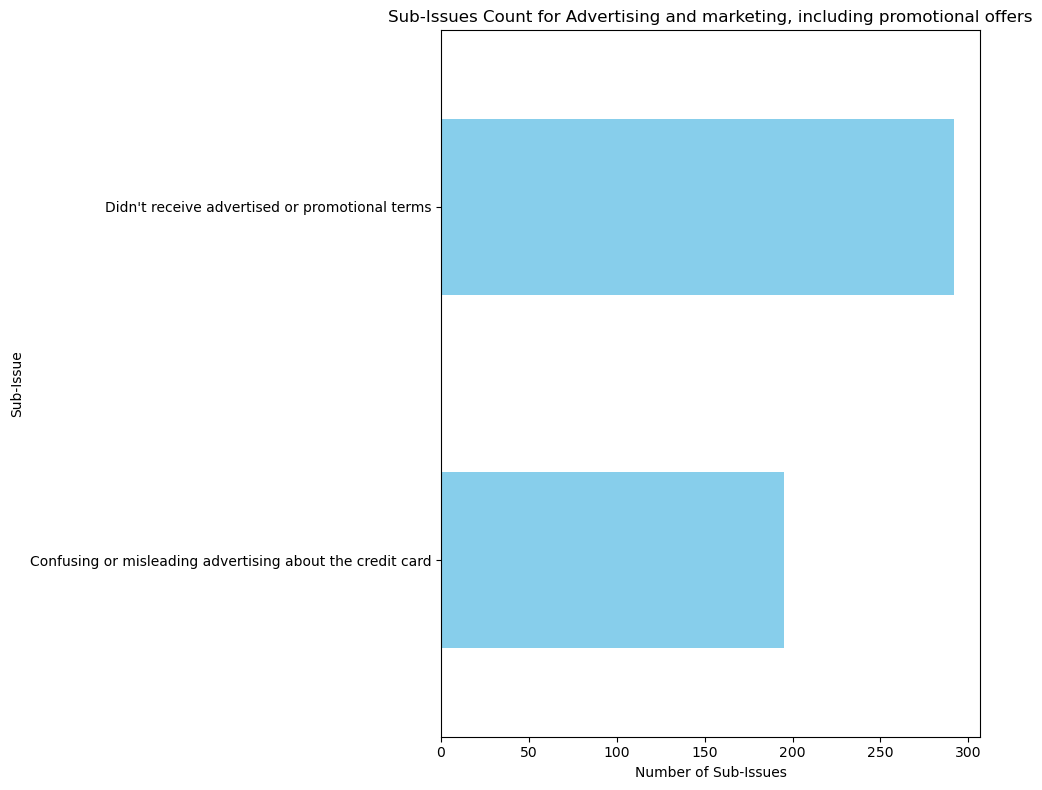

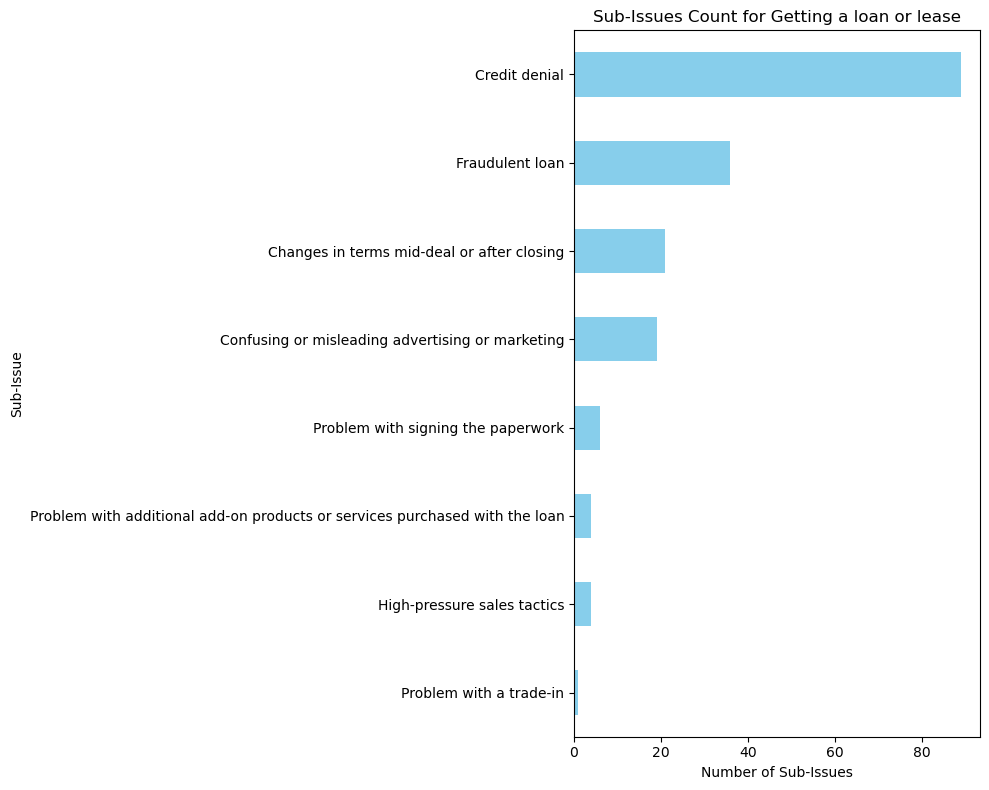

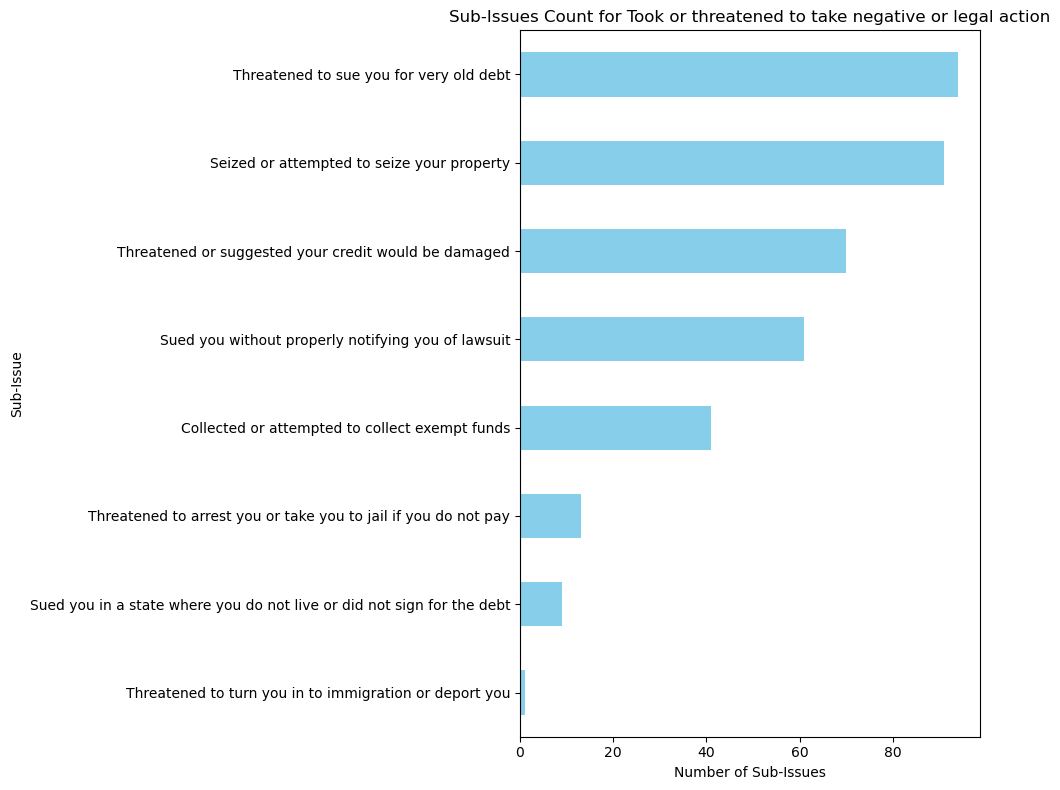

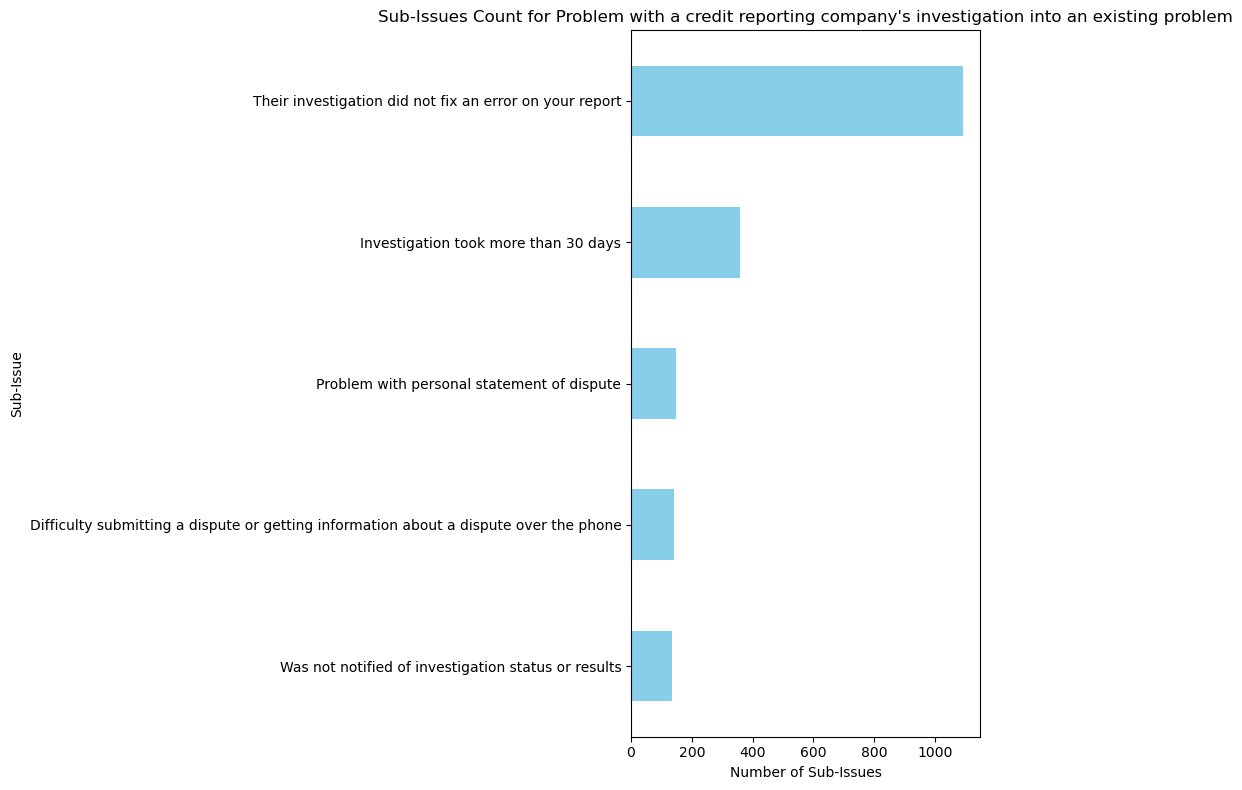

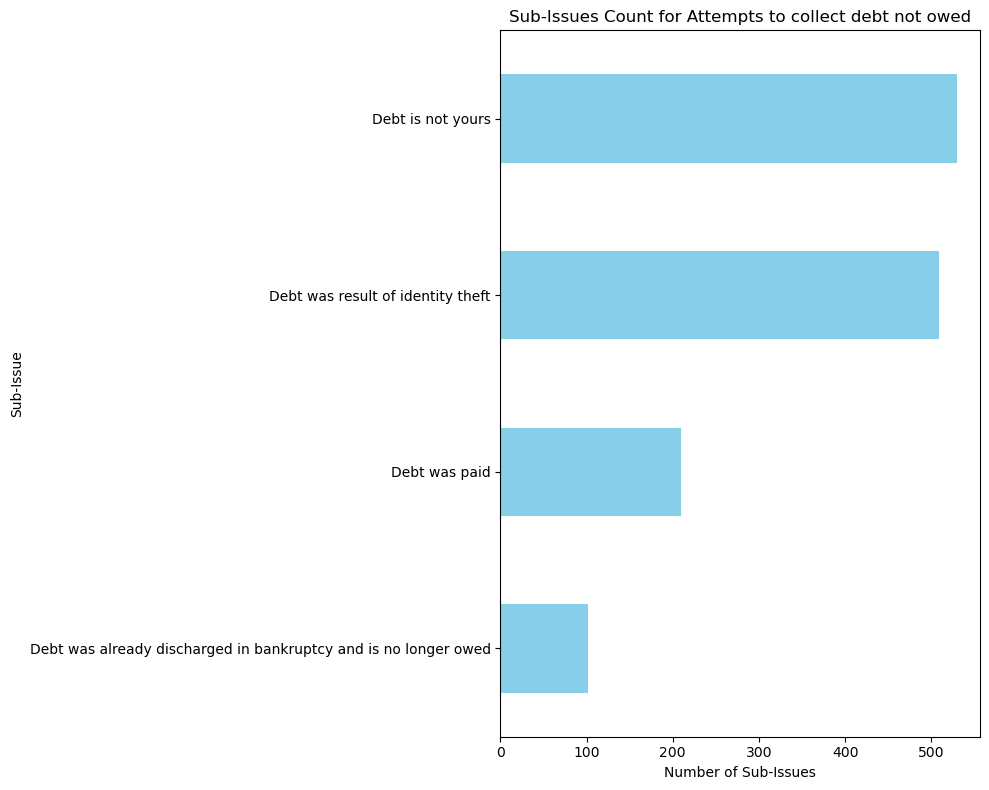

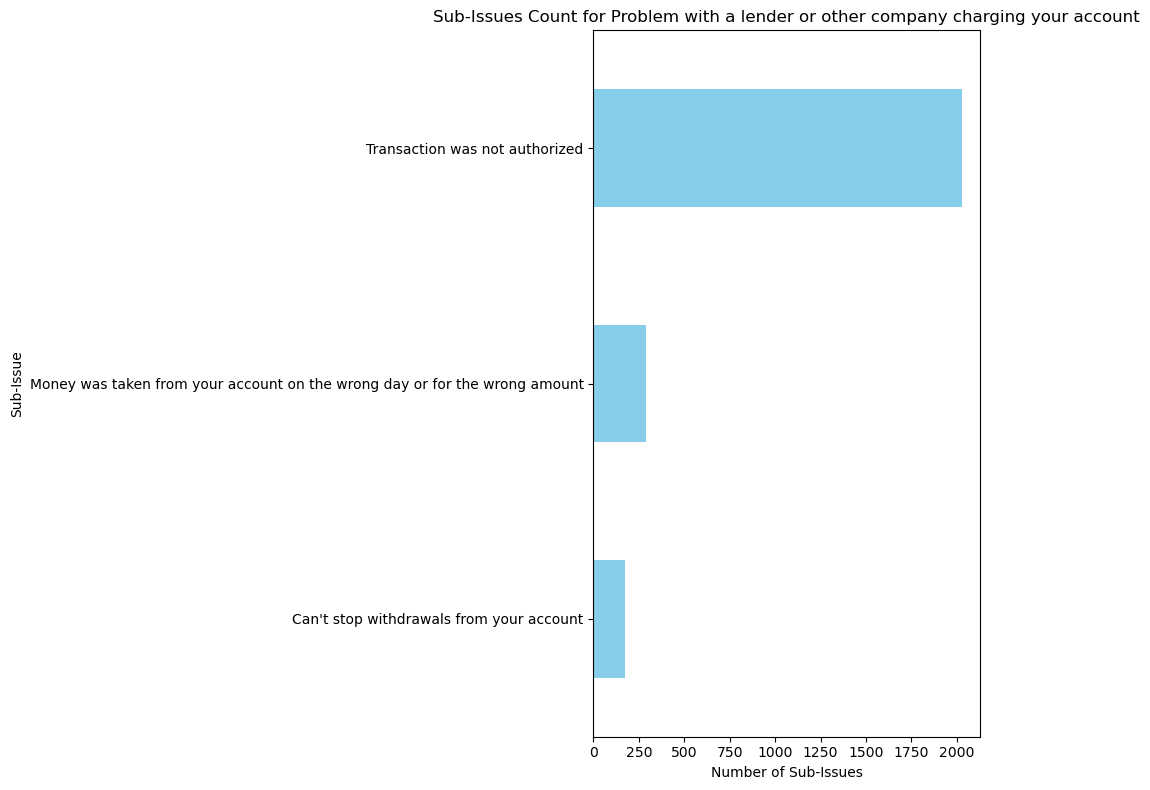

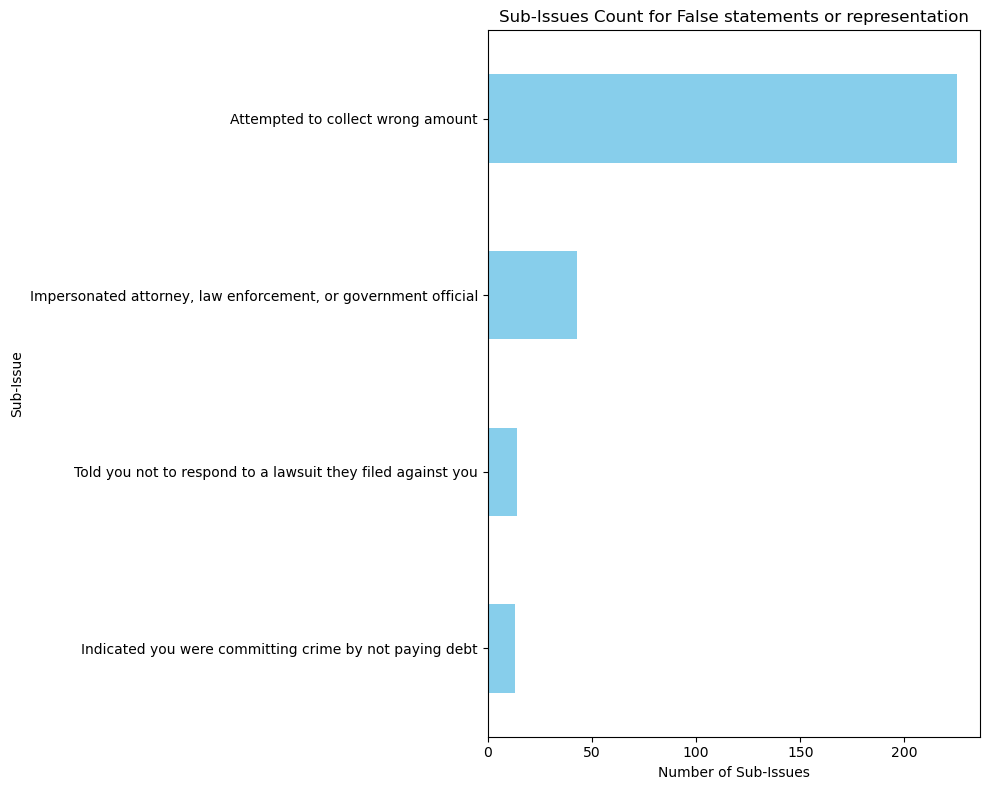

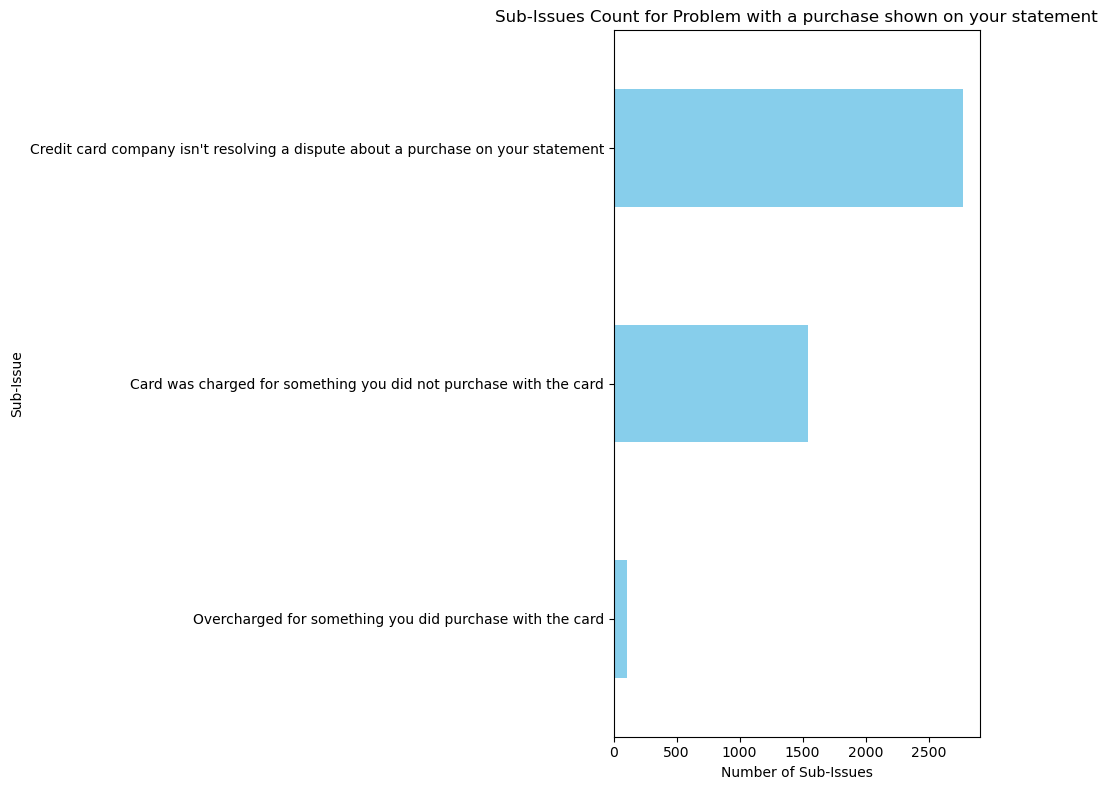

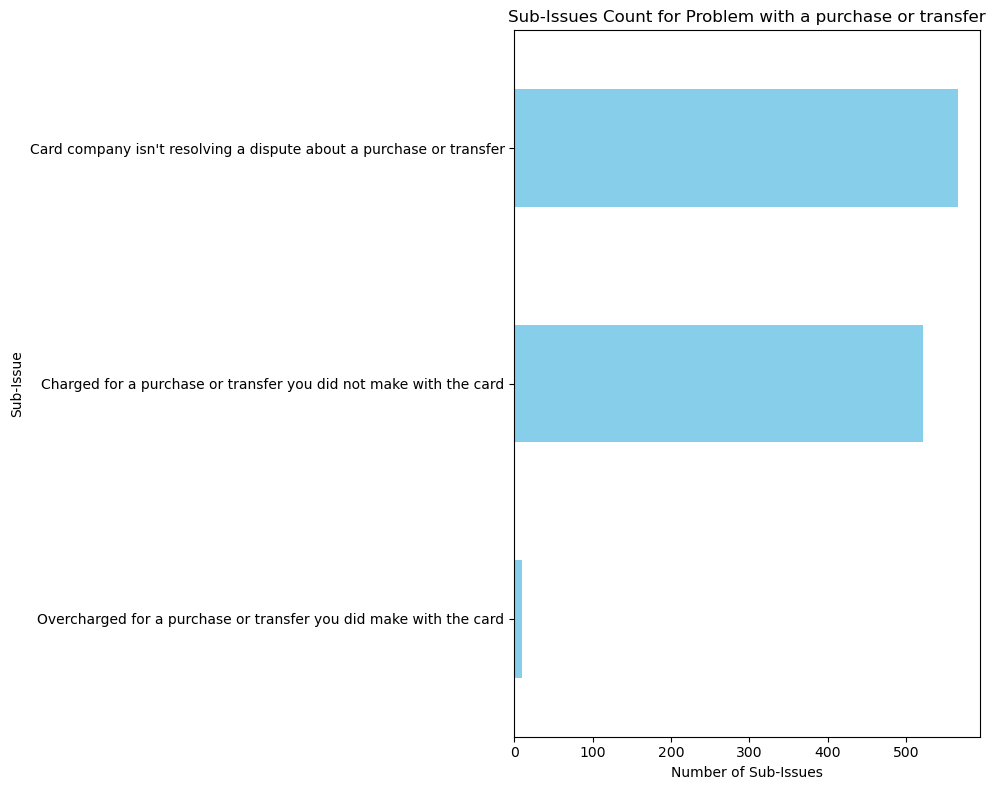

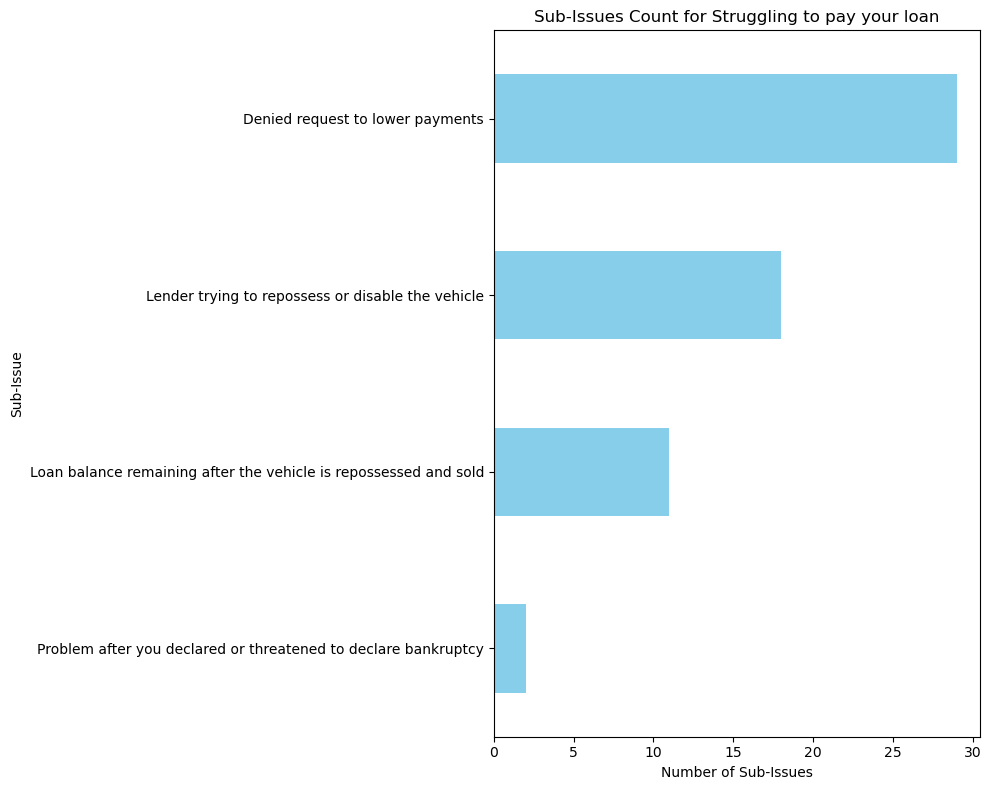

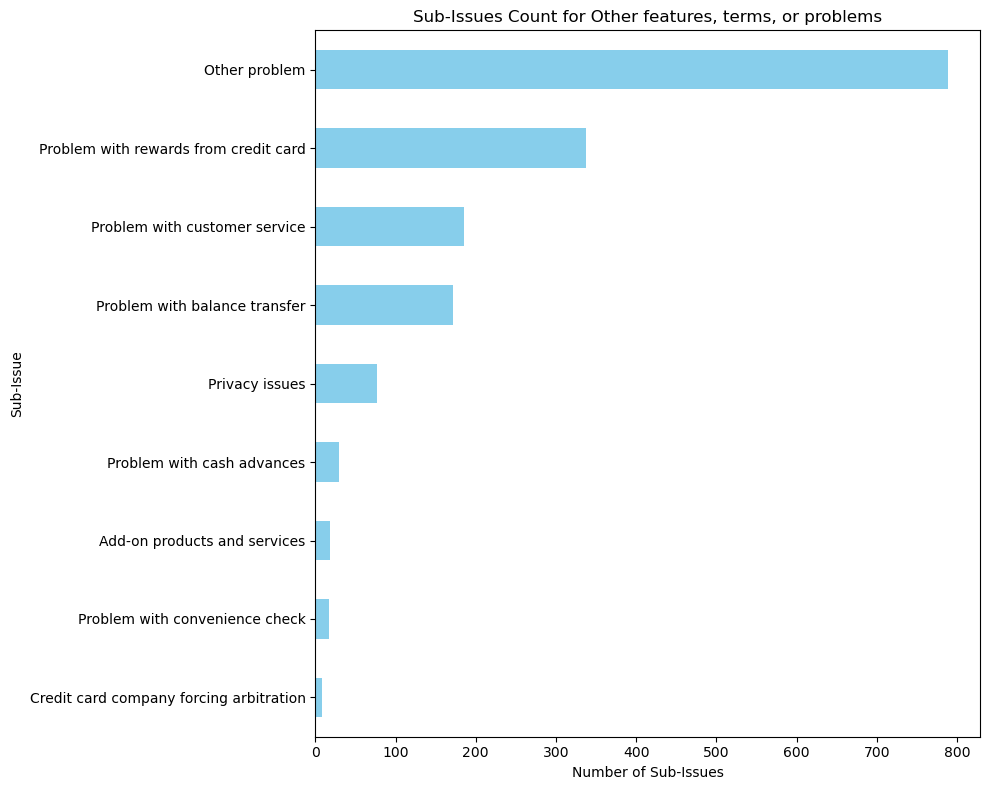

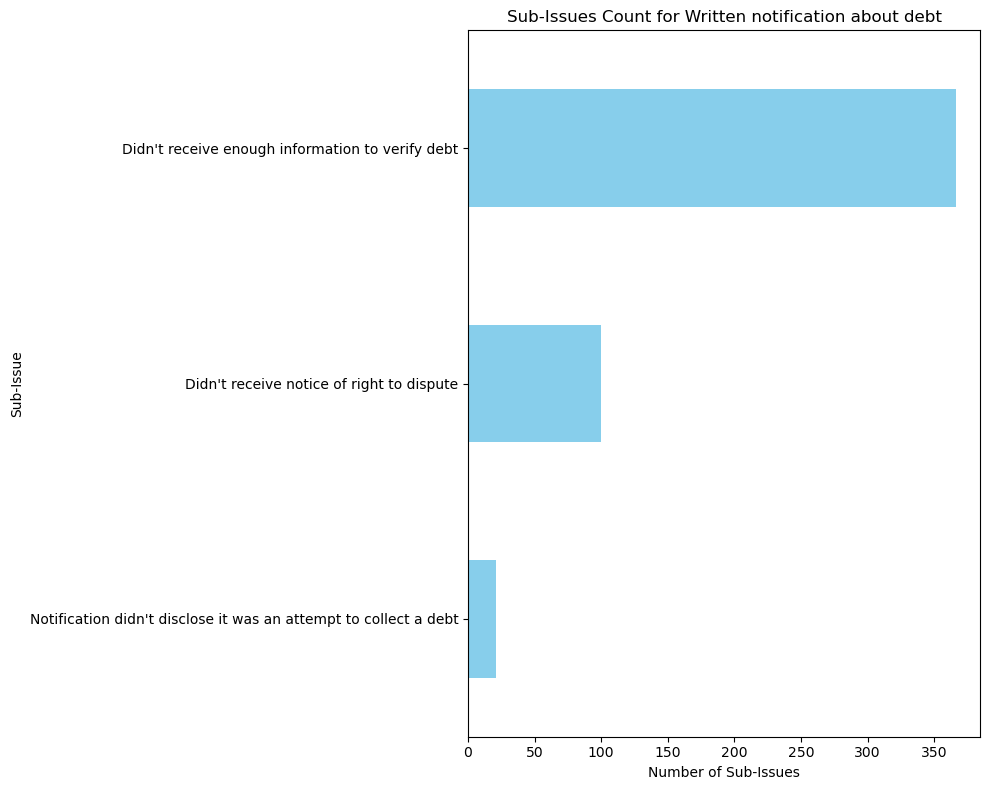

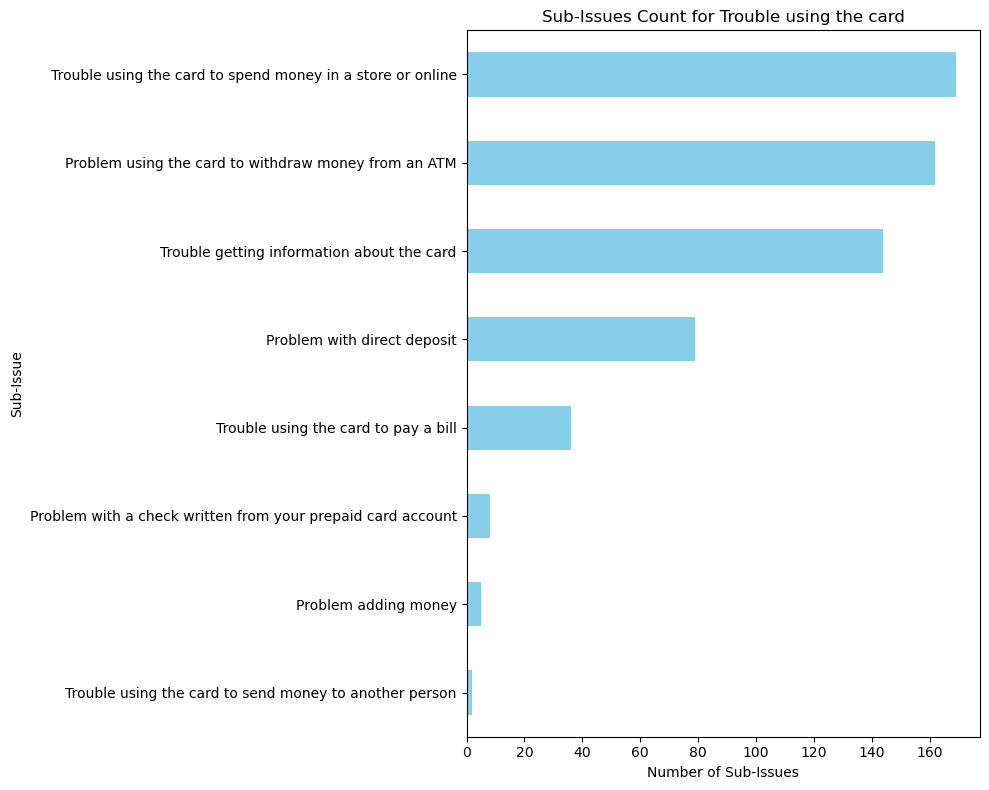

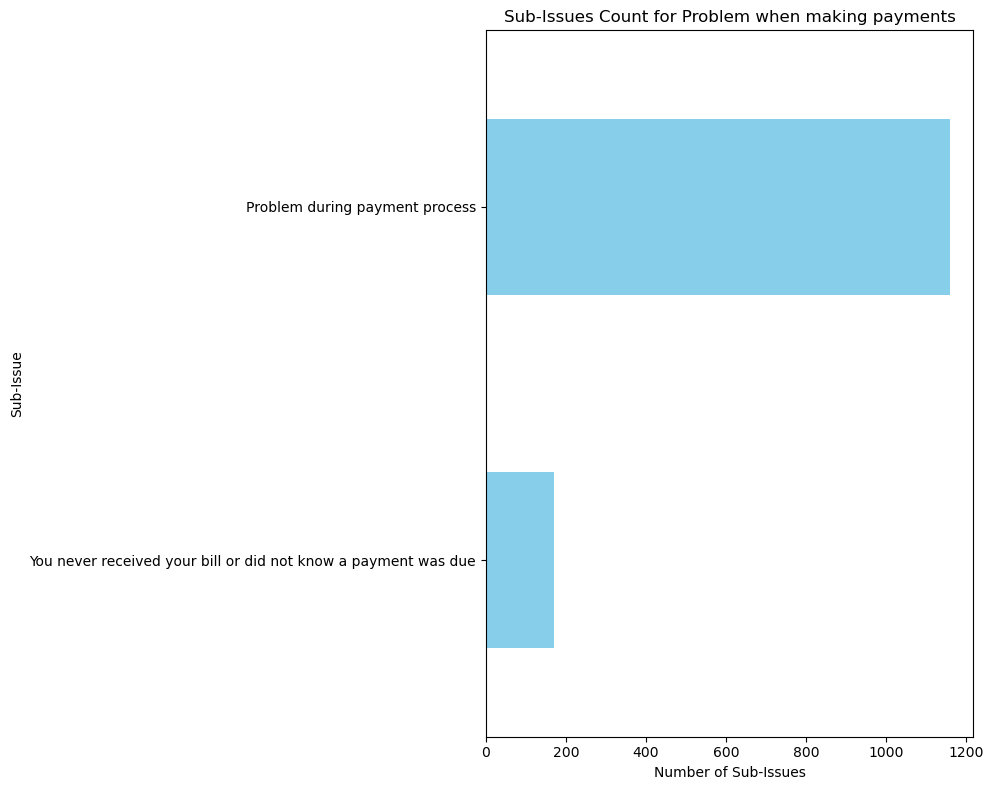

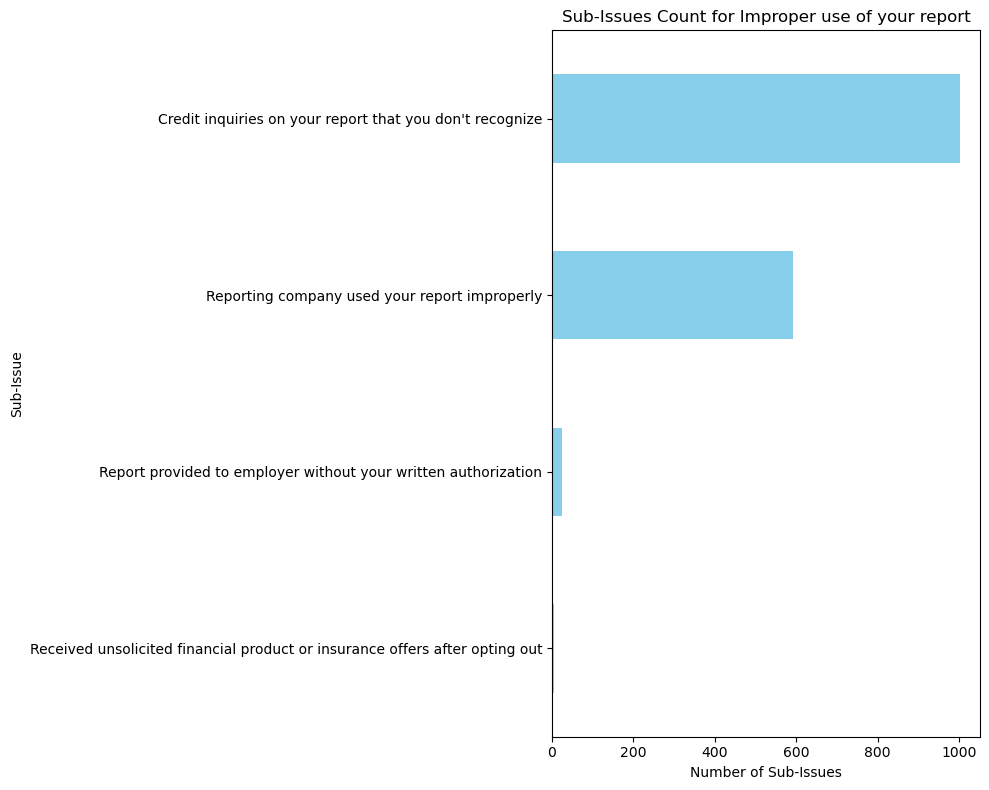

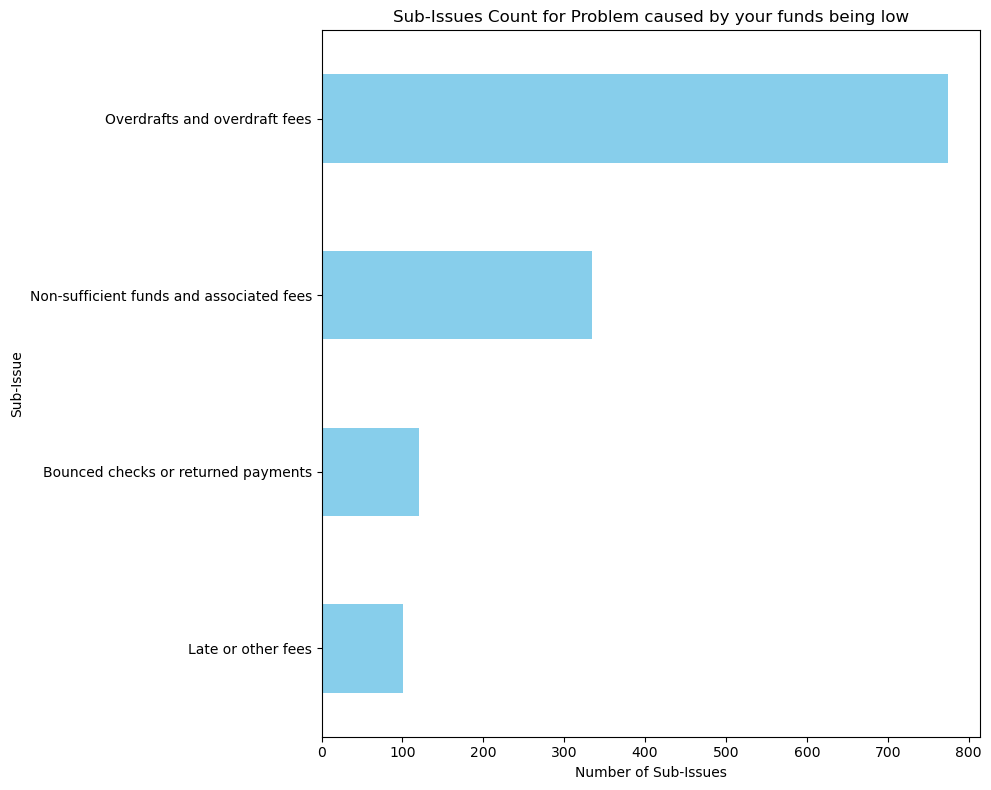

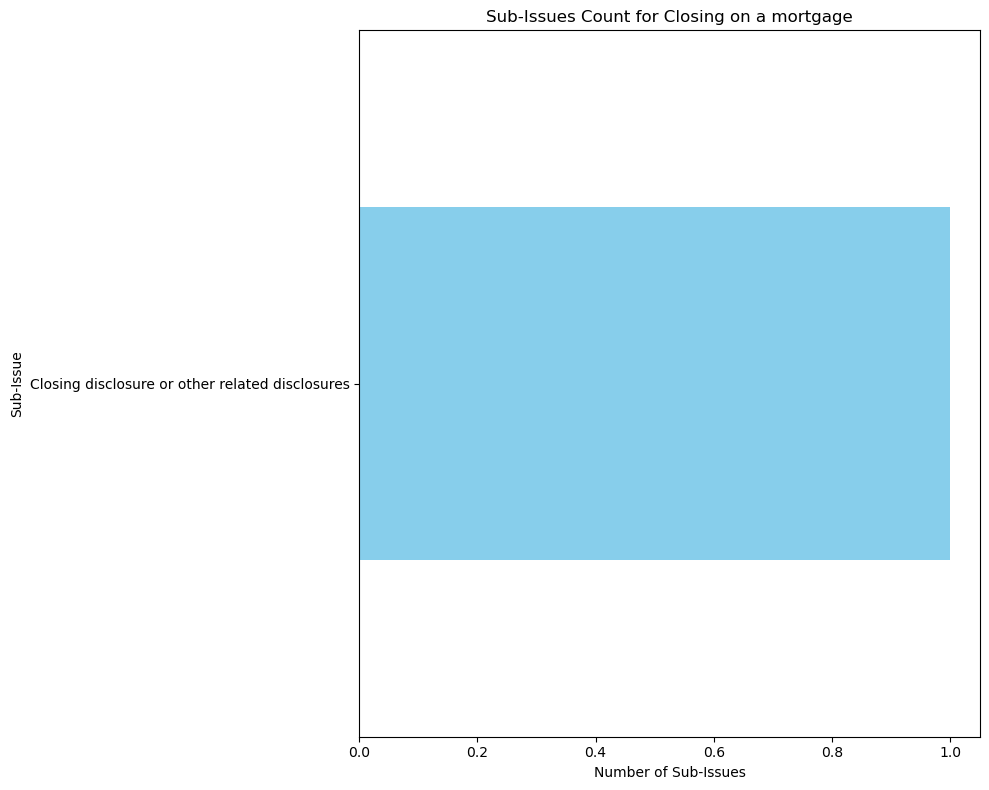

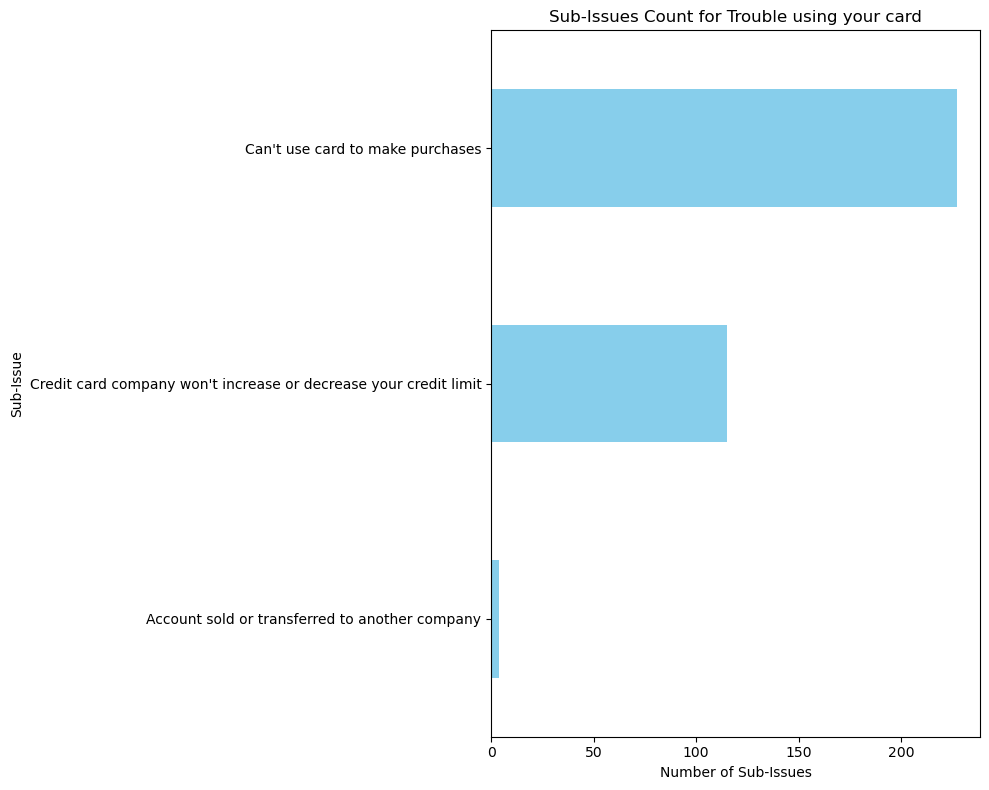

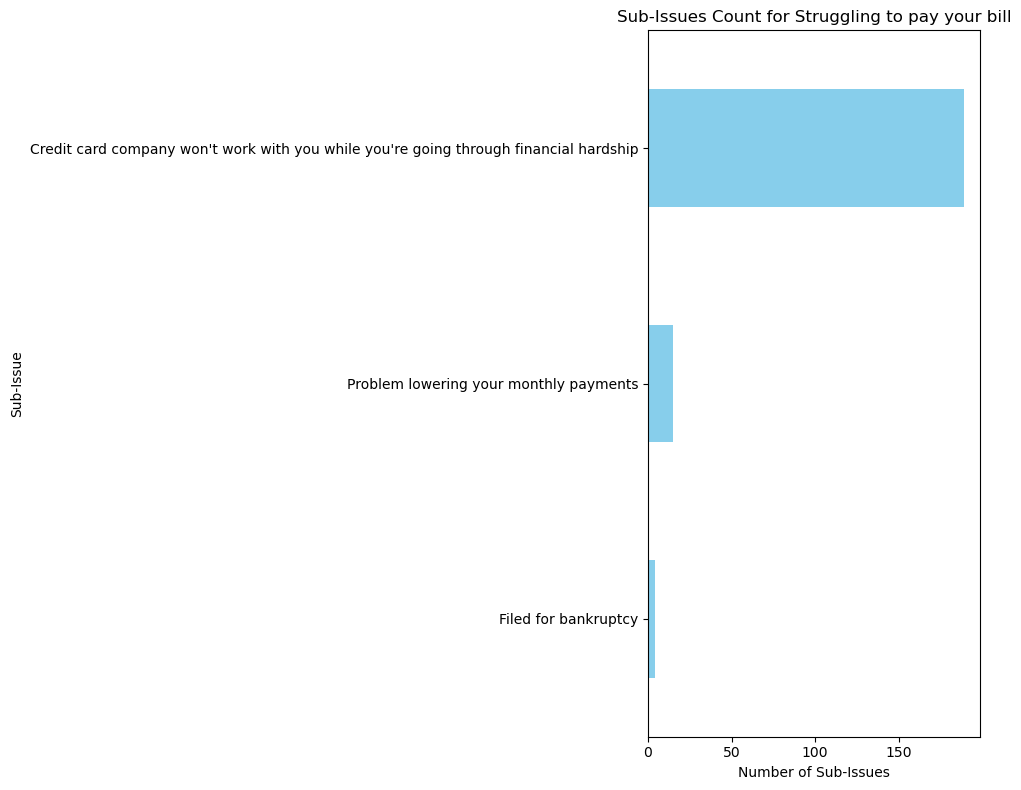

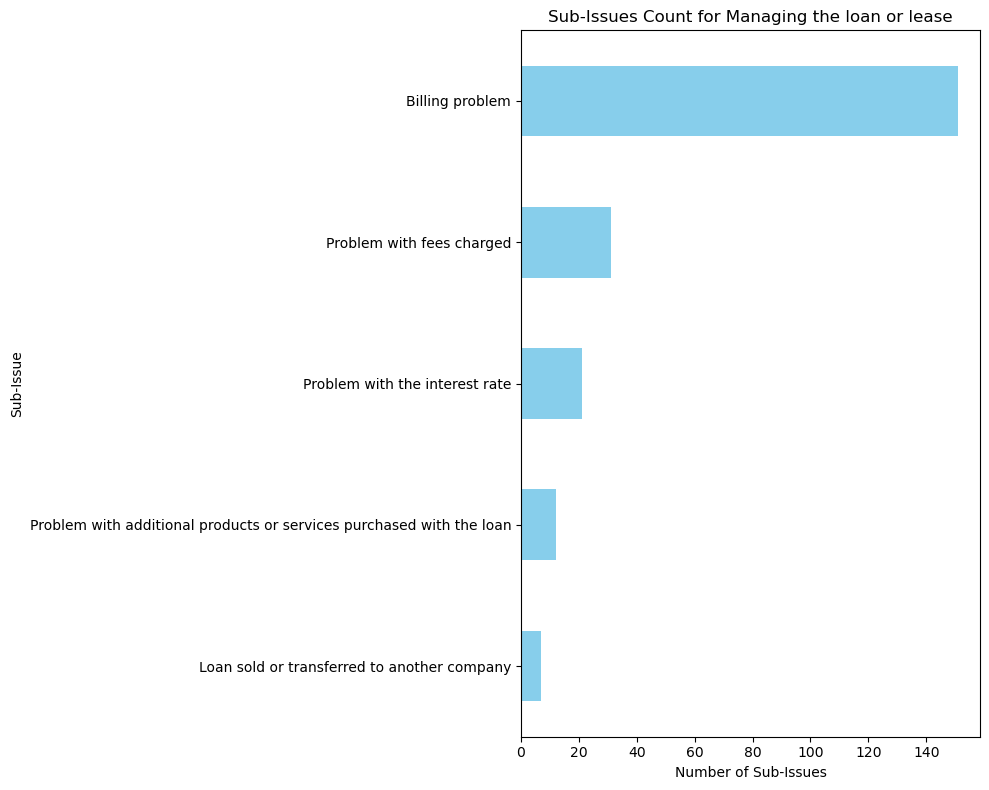

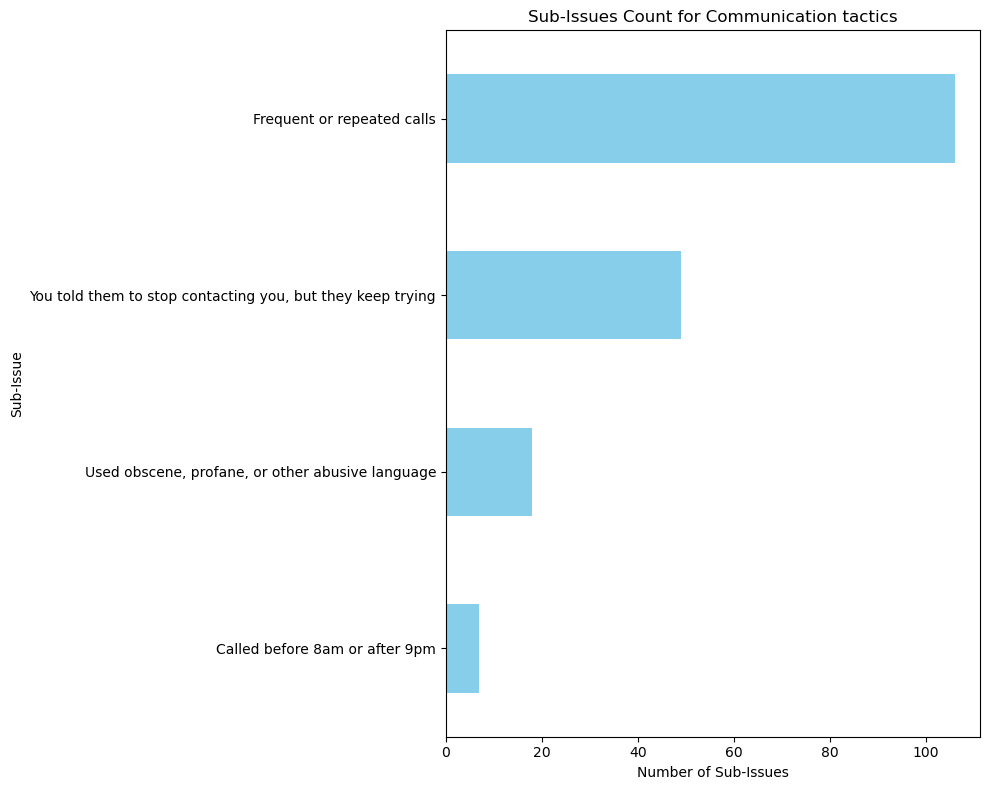

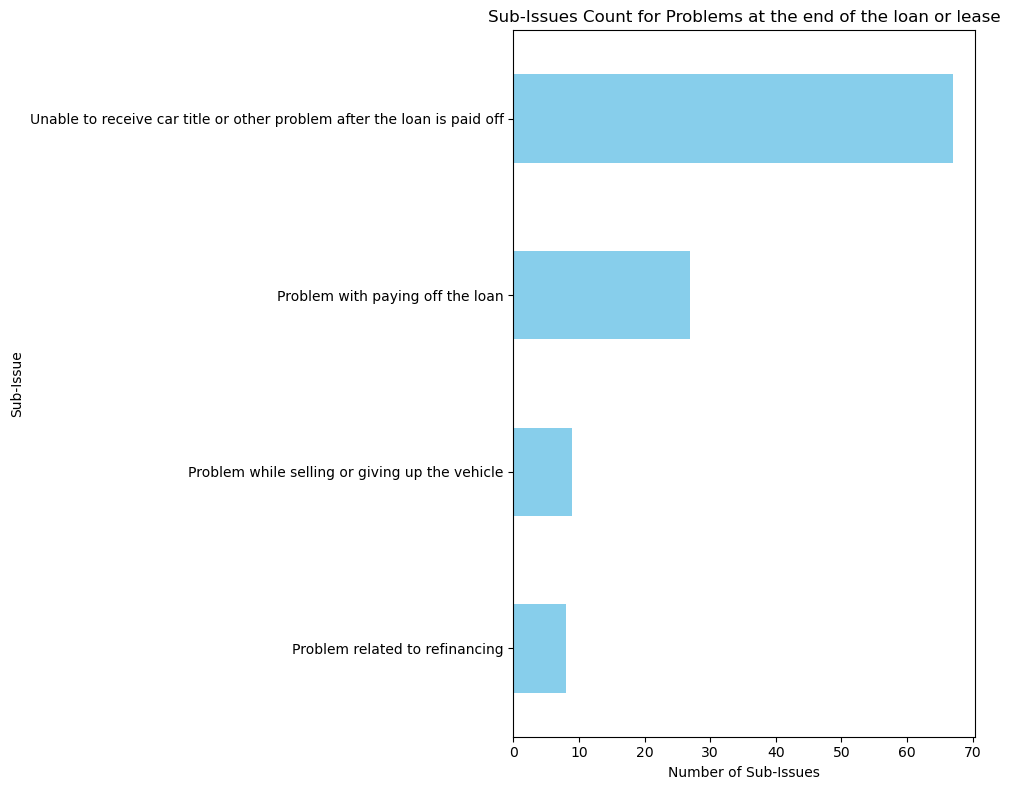

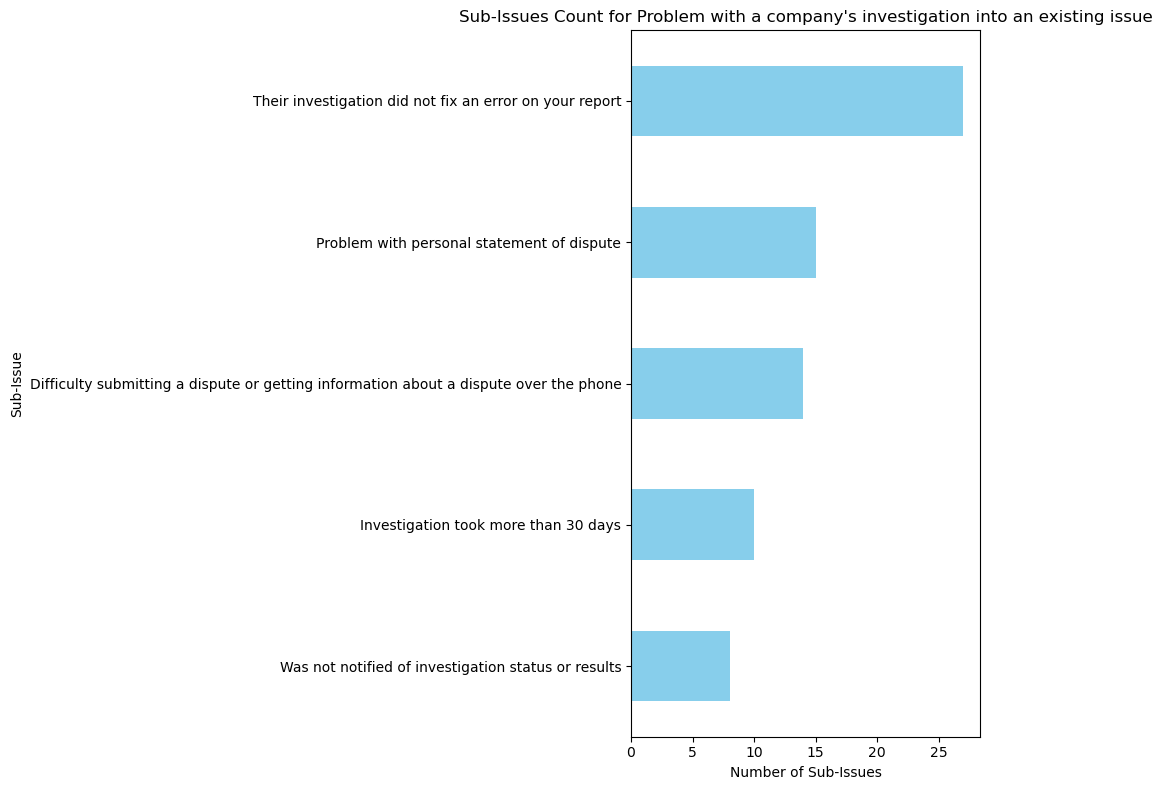

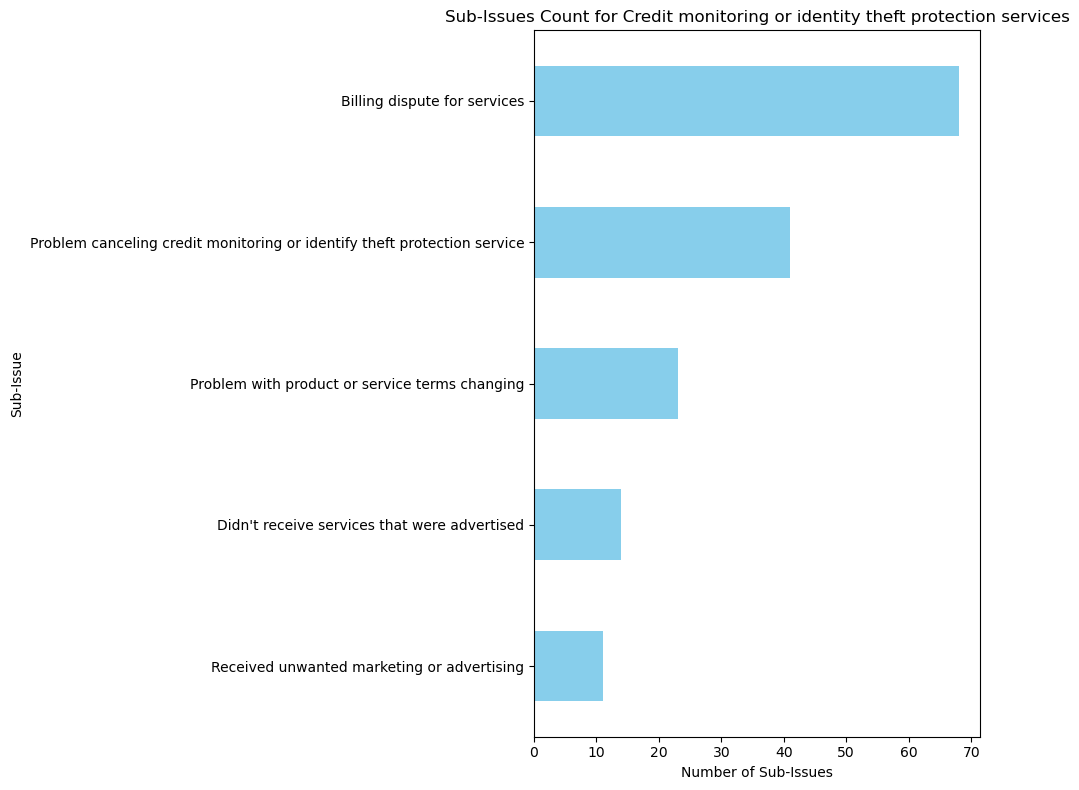

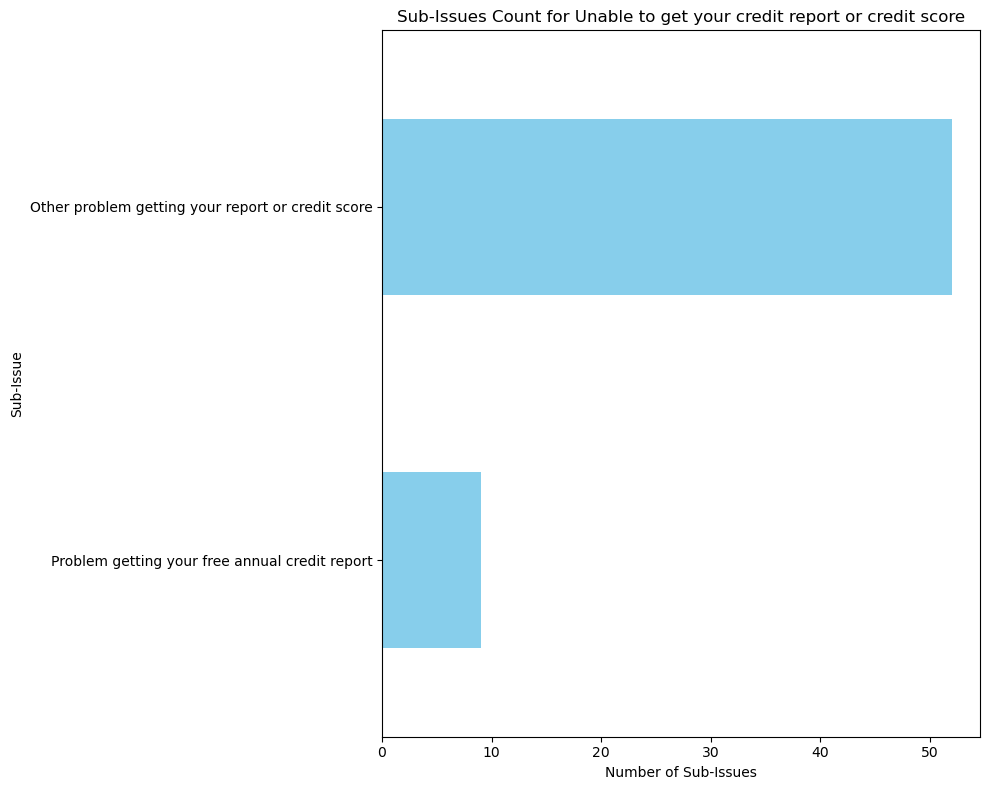

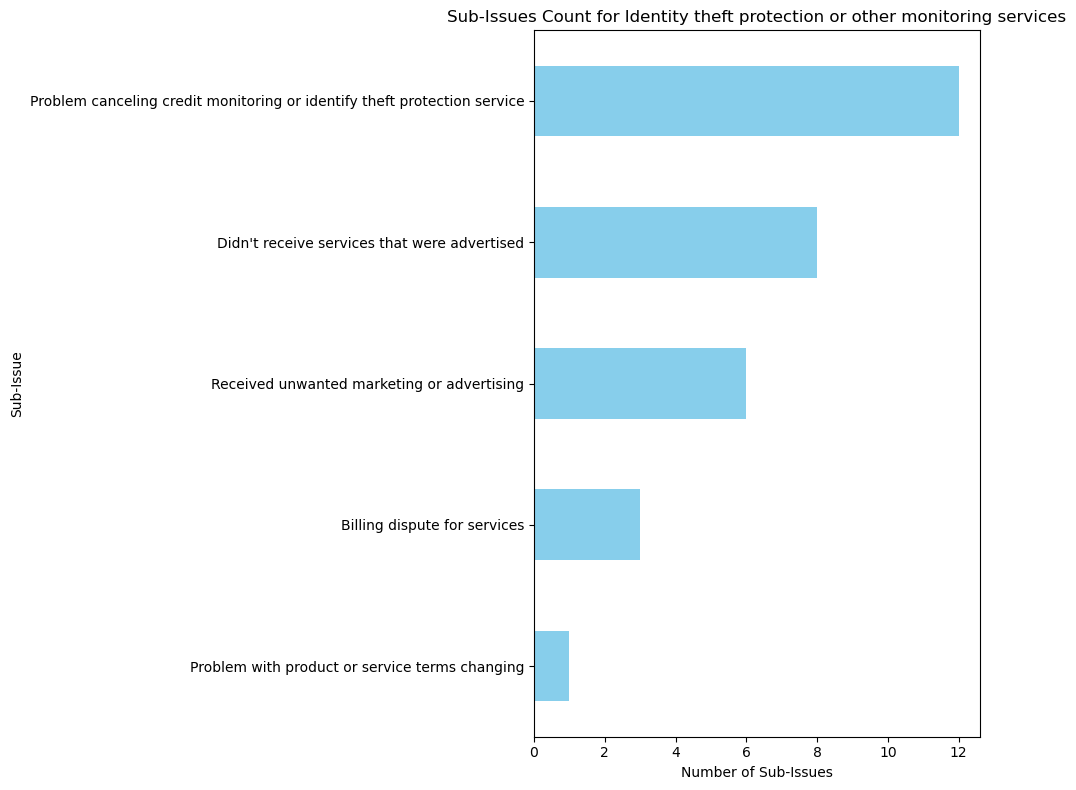

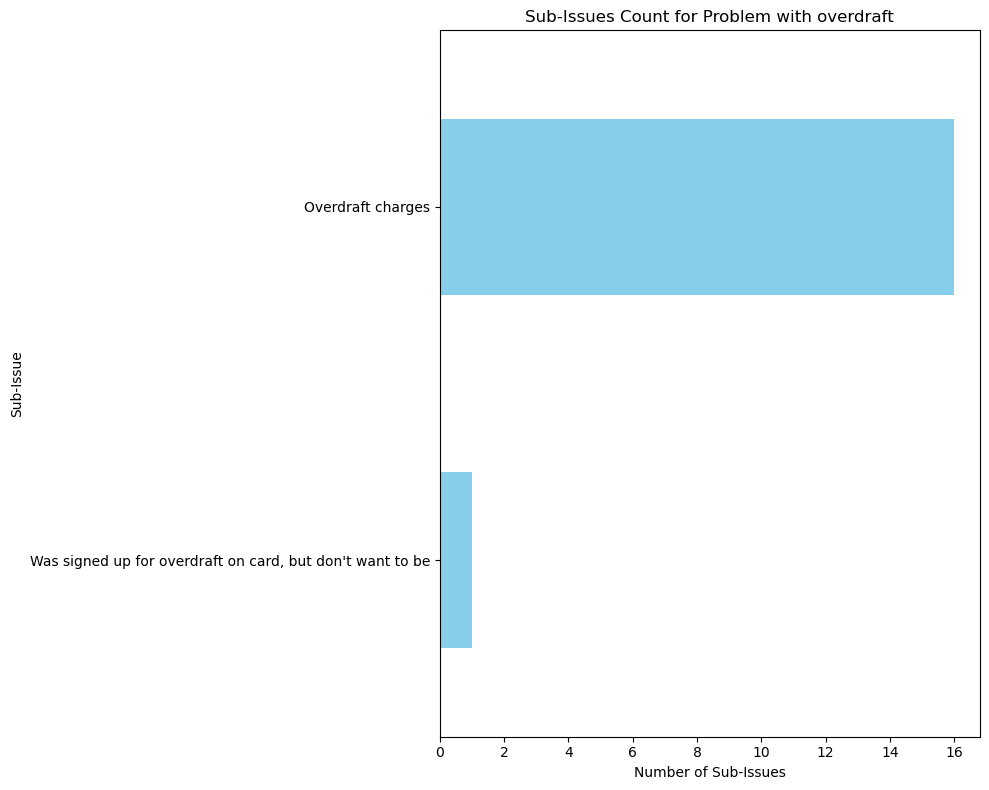

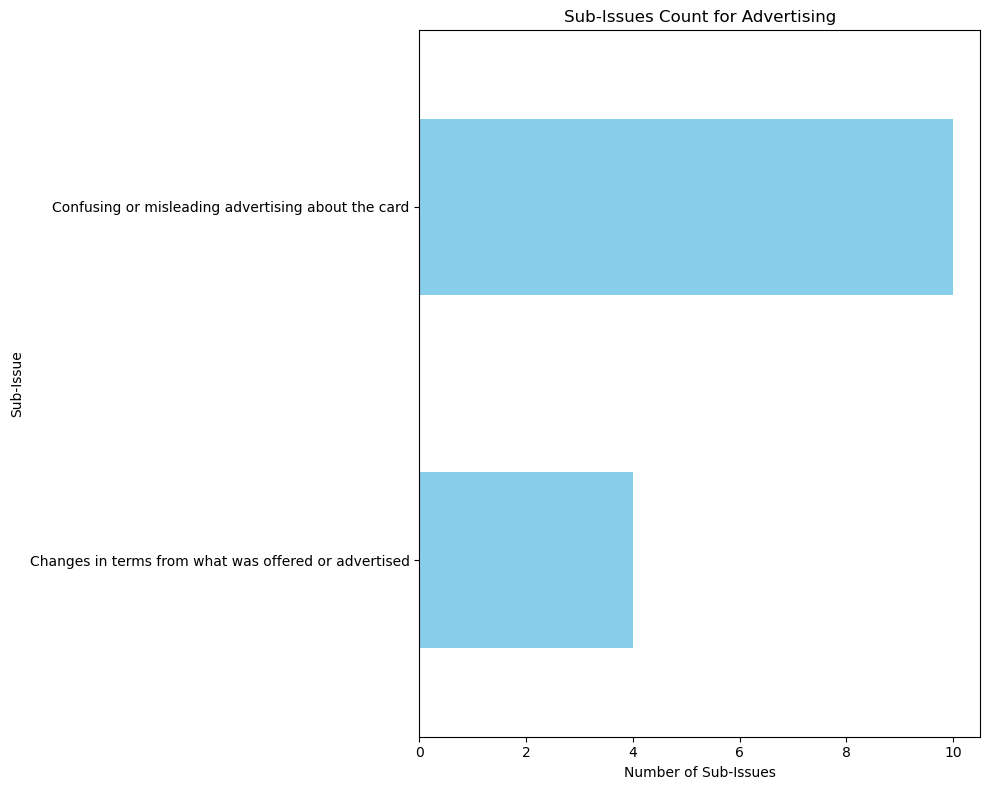

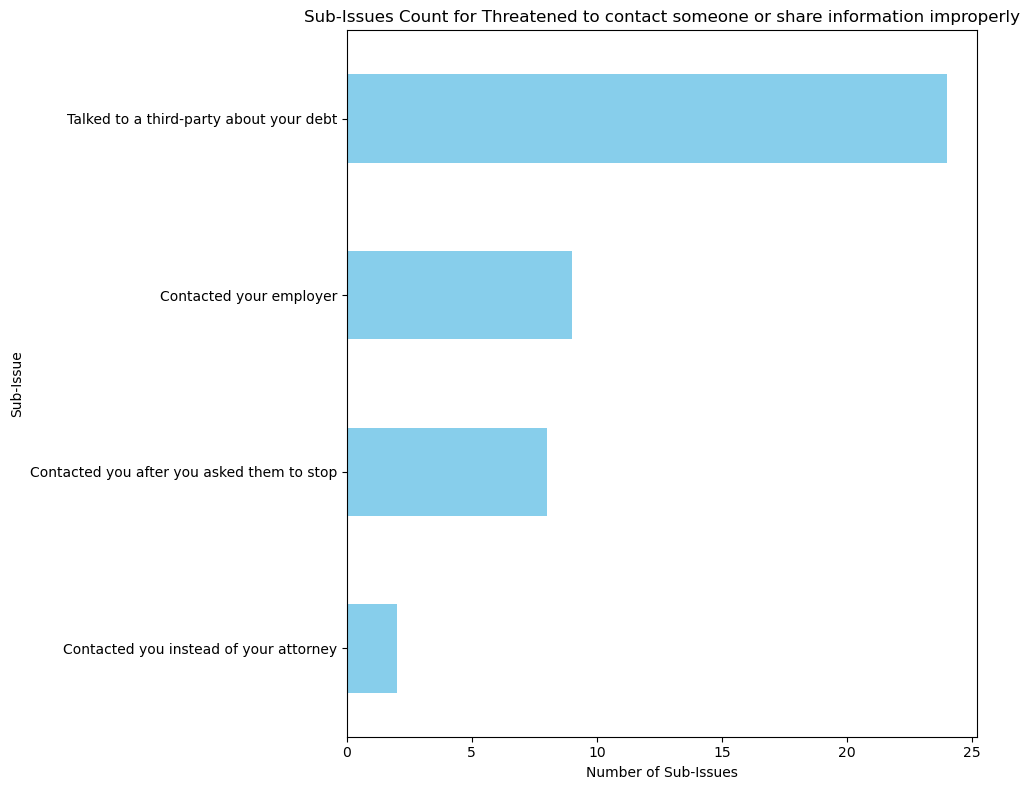

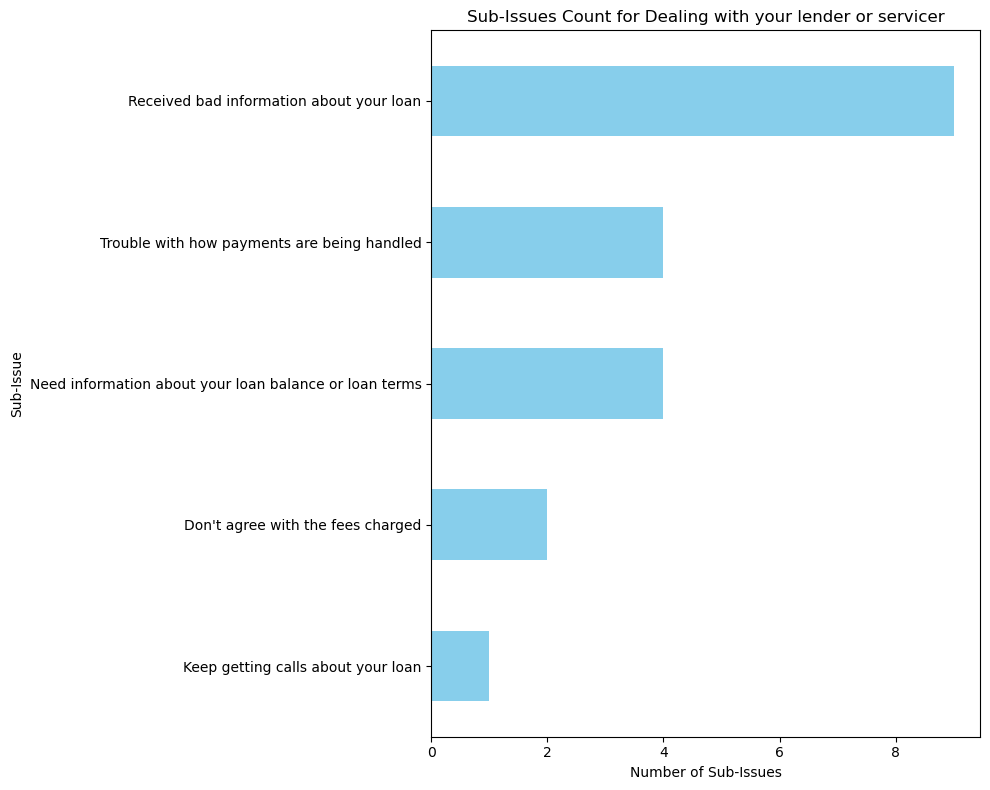

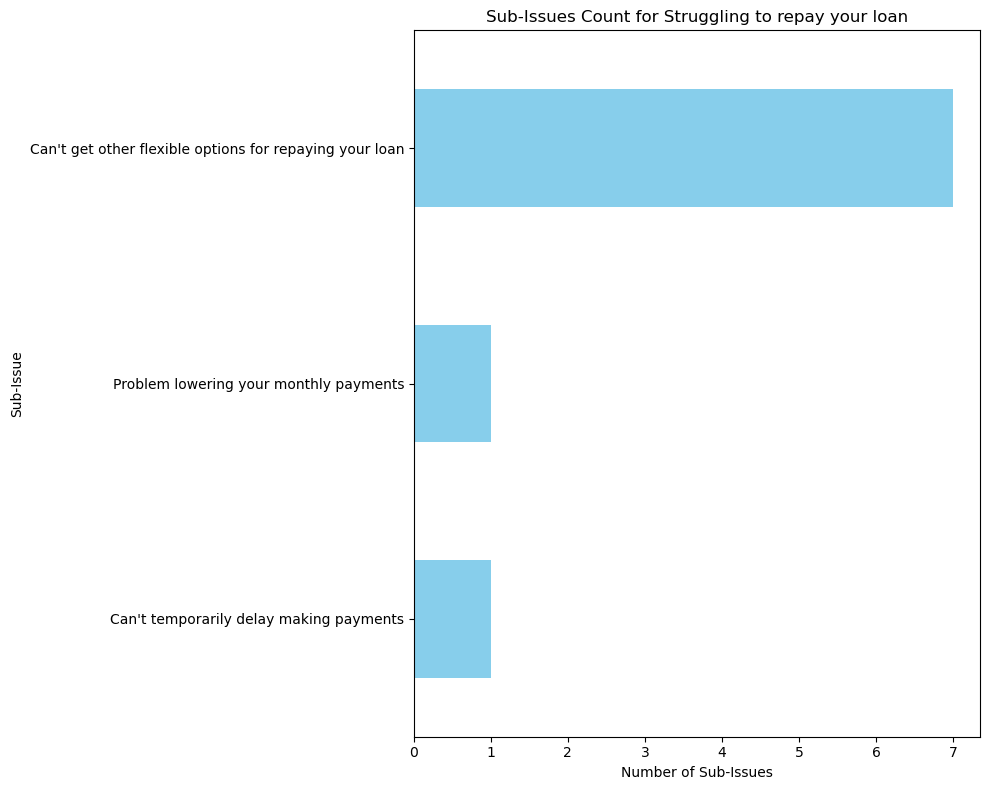

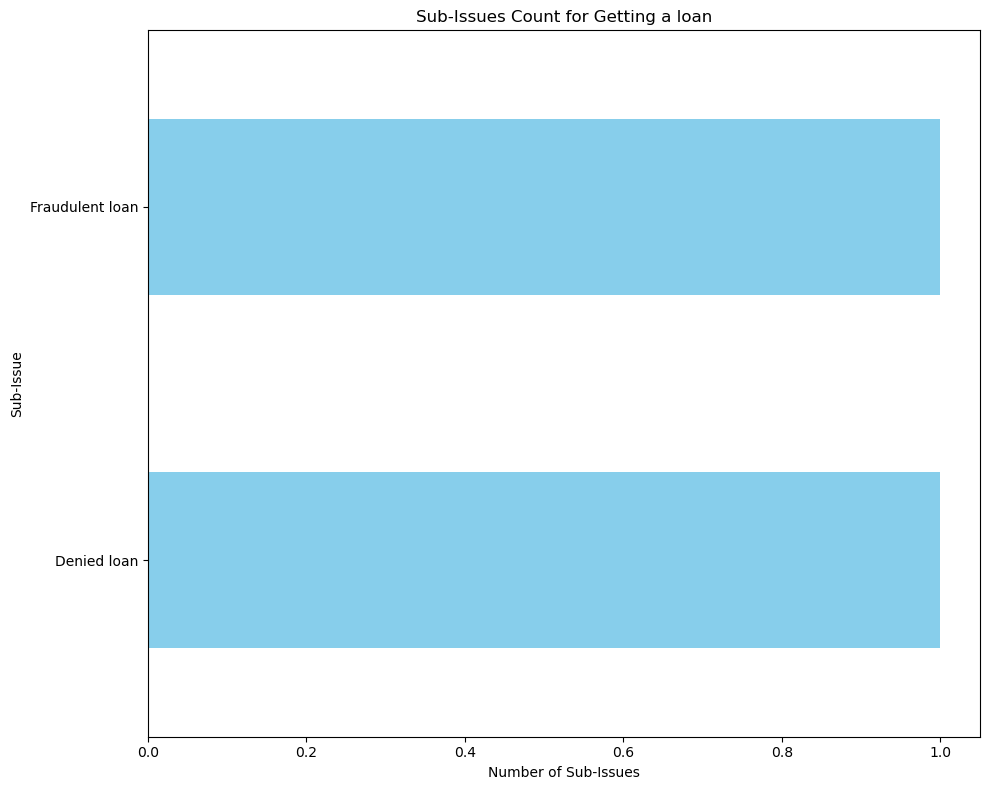

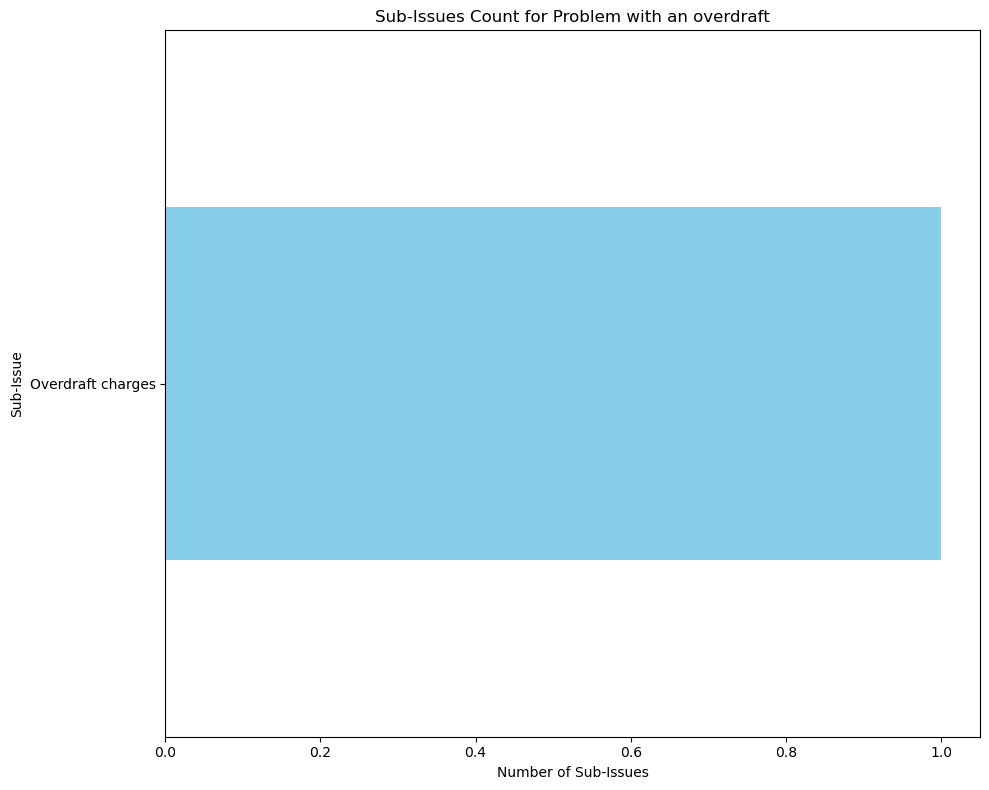

In [22]:
# Get list of unique Issues from our Issues column
unique_issues = df['Issue'].unique()  

# Print list of unique products
# print("List of Issues:")
# print(*unique_issues, sep='\n')


for issue in unique_issues:  
 # Check if the issue has sub-issues
    if issue not in sub_issues_counts.index.get_level_values(0):
        continue  # Skip if there are no sub-issues for this issue
    
    # Filter the sub-issue counts for the current issue  
    sub_issues = sub_issues_counts.loc[issue]
    
    # Plotting  
      
    plt.figure(figsize=(10, 8))
    sub_issues.sort_values().plot(kind='barh', color='skyblue')
    plt.title(f'Sub-Issues Count for {issue}')
    plt.xlabel('Number of Sub-Issues')
    plt.ylabel('Sub-Issue')
    plt.tight_layout()
    plt.show()


<a id='ca'></a>
>#### **(D) Channel Analysis:**
<p>Compare complaints submitted via different Submitted via channels to see if certain channels correlate with specific types of issues or responses. </p>



In [23]:
# Calculate the total number of complaints per submission channel
complaint_channel_counts = df['Submitted via'].value_counts()

print("Number of complaints based on Channel of submission: \n", complaint_channel_counts)

Number of complaints based on Channel of submission: 
 Submitted via
Web             45423
Referral        10766
Phone            4684
Postal mail      1318
Fax               233
Web Referral       90
Email               2
Name: count, dtype: int64


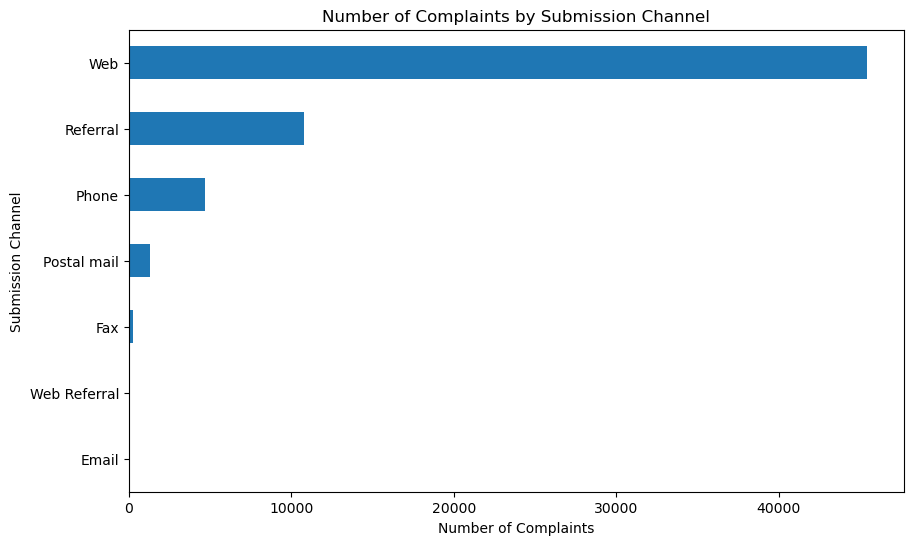

In [24]:
# Plot a horizontal bar chart
plt.figure(figsize=(10, 6))
complaint_channel_counts.plot(kind='barh')
plt.title('Number of Complaints by Submission Channel')
plt.xlabel('Number of Complaints')
plt.ylabel('Submission Channel')
plt.gca().invert_yaxis()  #to have the highest count on top
plt.show()

>**Observation:** </br>
Most complaints <b>(45,423)</b>were submitted via the web channel and only a few <b>(2) </b>via email

In [25]:
# To check volume of type of complaints by submission channel
# First, calculate the volume of each type of complaint by submission channel
complaints_by_channel = df.groupby(['Issue','Submitted via']).size().unstack(fill_value=0)

print("Number of complaints based on Channel of submission grouped by Issues: \n", complaints_by_channel)

Number of complaints based on Channel of submission grouped by Issues: 
 Submitted via                                       Email  Fax  Phone  \
Issue                                                                   
Advertising                                             0    0      0   
Advertising and marketing, including promotiona...      1    0     28   
Applying for a mortgage or refinancing an exist...      0    4     94   
Attempts to collect debt not owed                       0   11     26   
Can't contact lender or servicer                        0    0      0   
...                                                   ...  ...    ...   
Vehicle was repossessed or sold the vehicle             0    0      0   
Was approved for a loan, but didn't receive money       0    0      0   
Was approved for a loan, but didn't receive the...      0    0      1   
Written notification about debt                         0   12      7   
Wrong amount charged or received                   

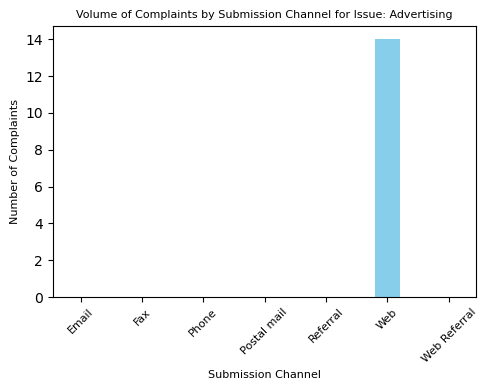

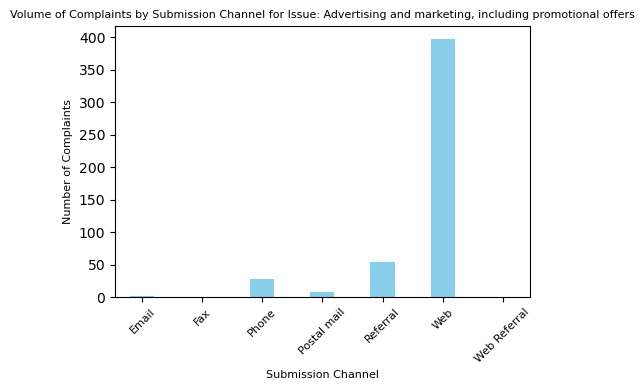

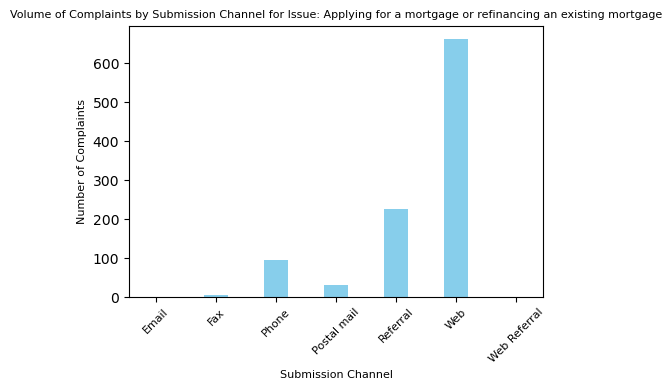

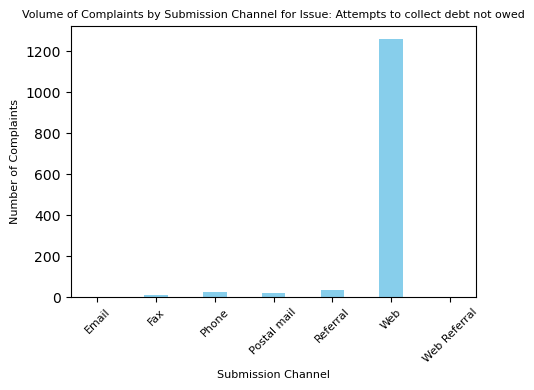

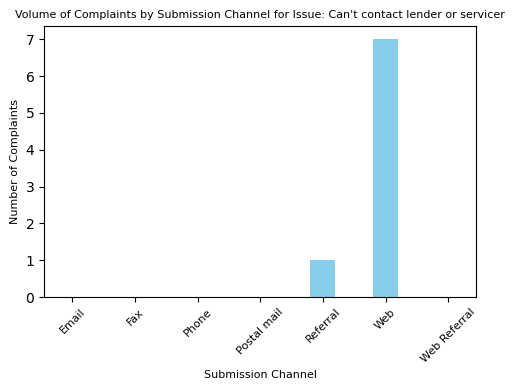

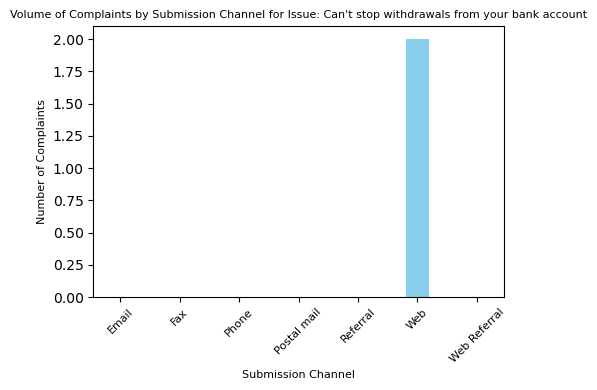

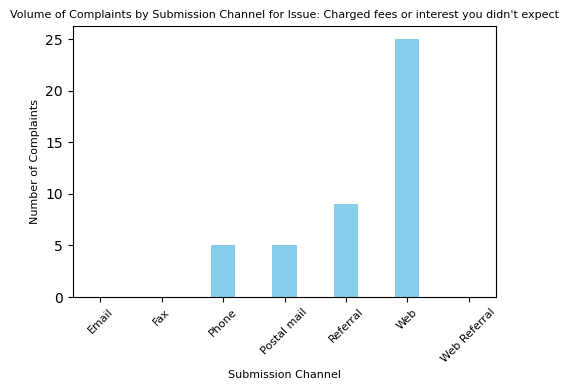

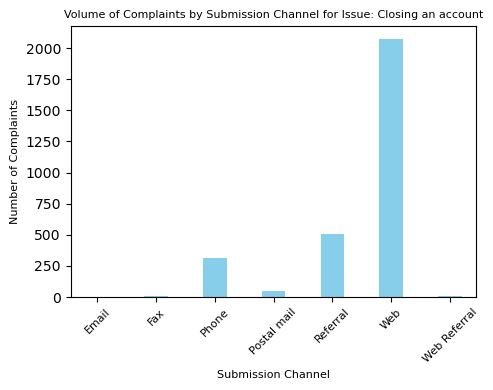

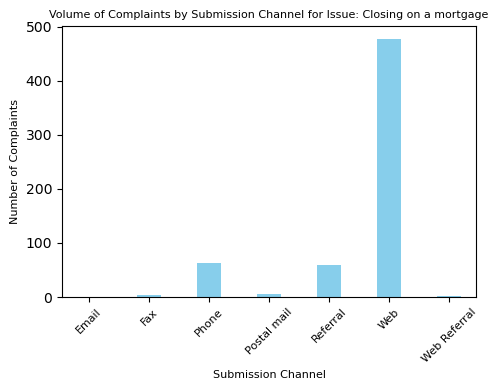

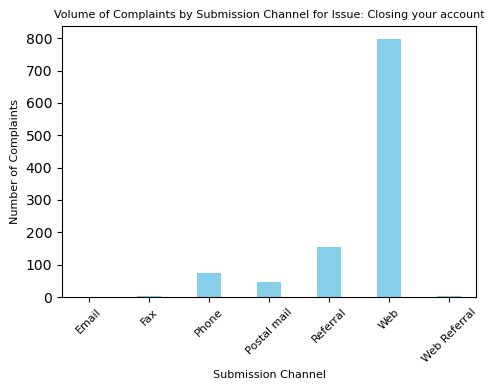

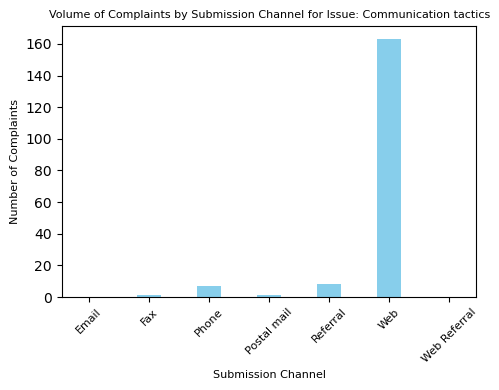

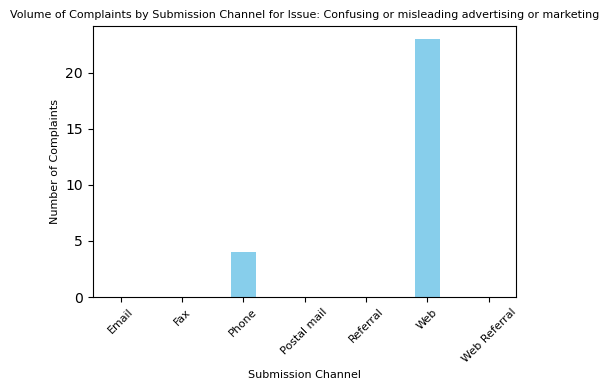

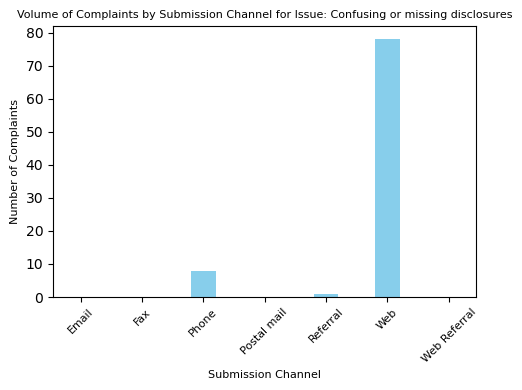

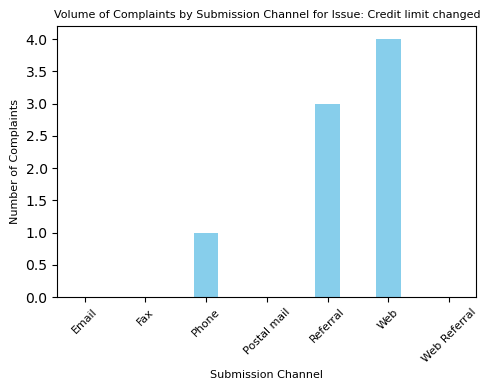

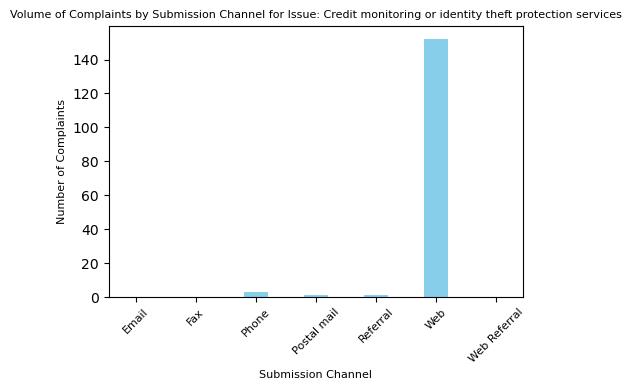

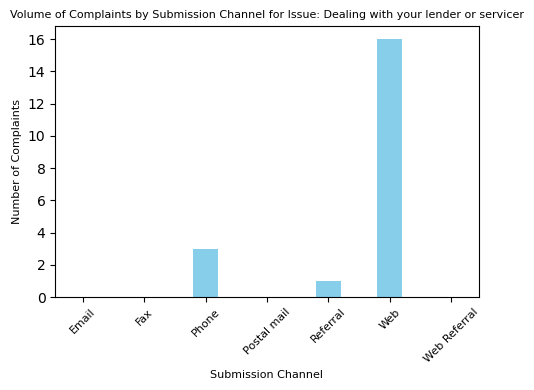

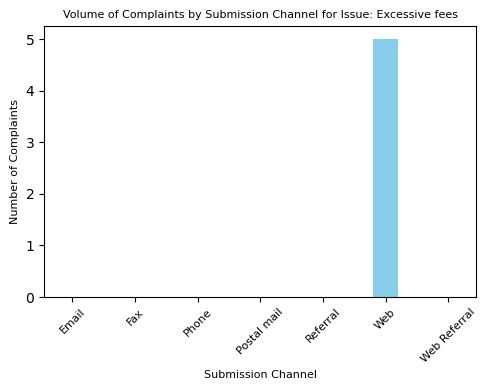

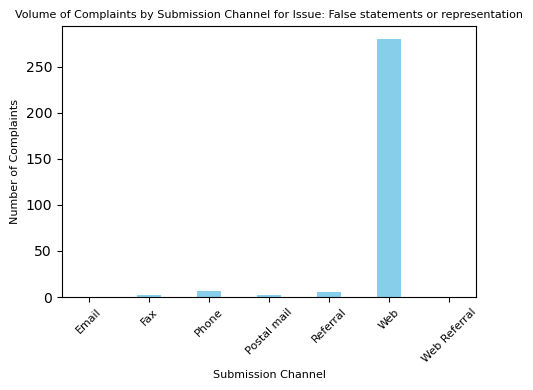

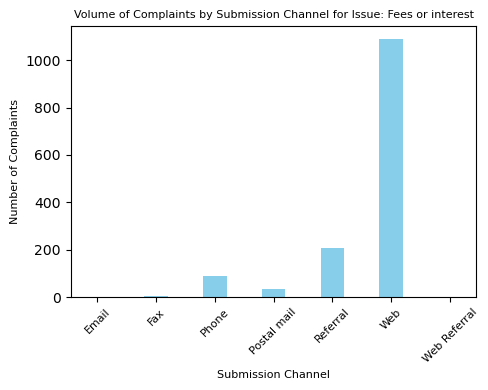

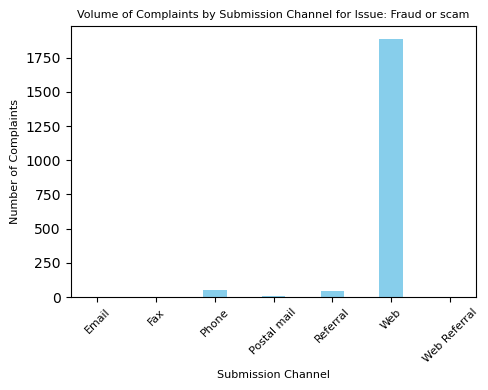

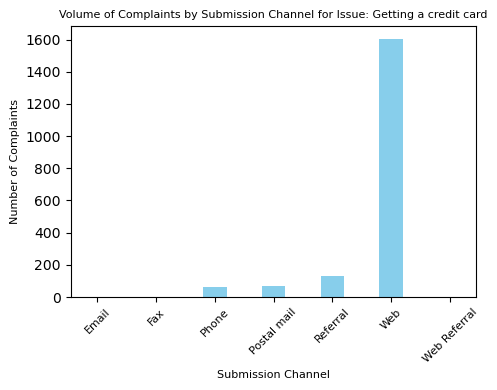

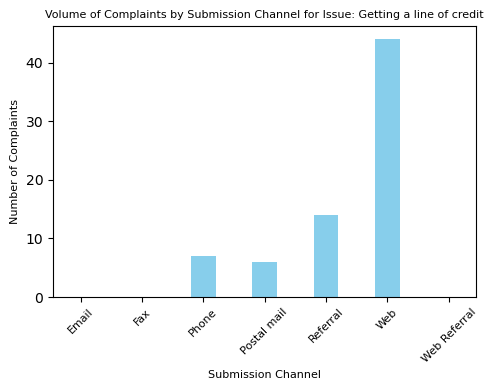

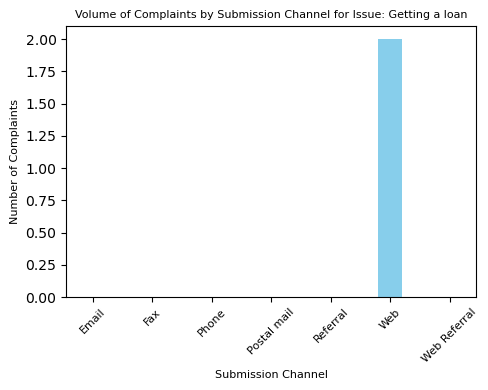

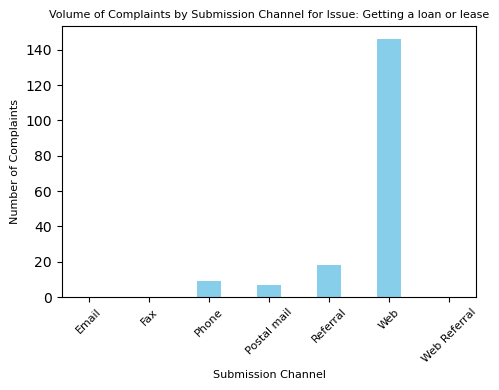

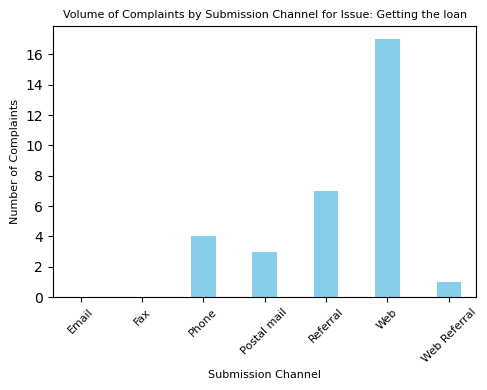

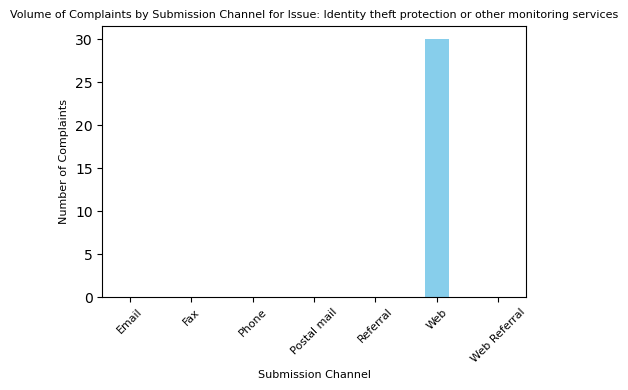

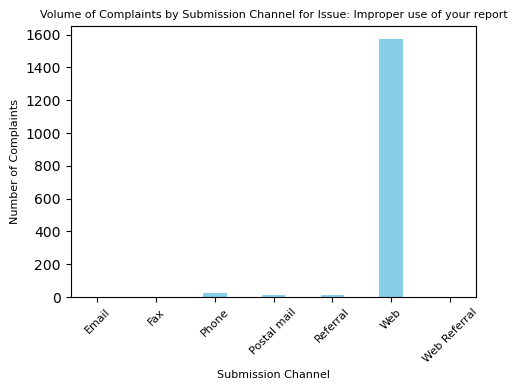

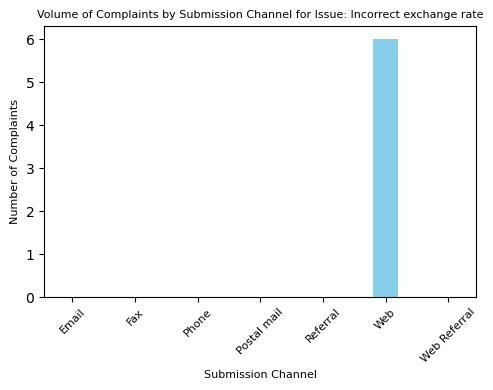

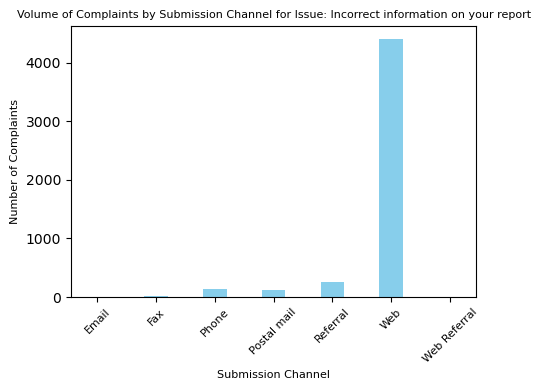

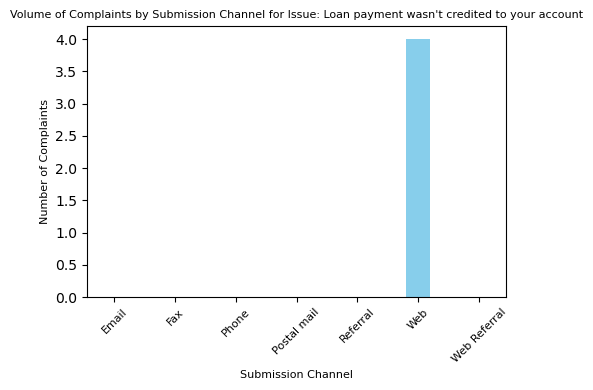

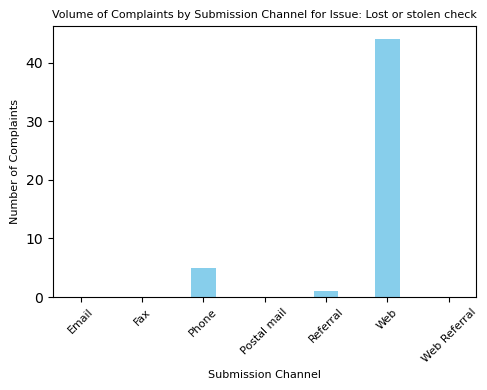

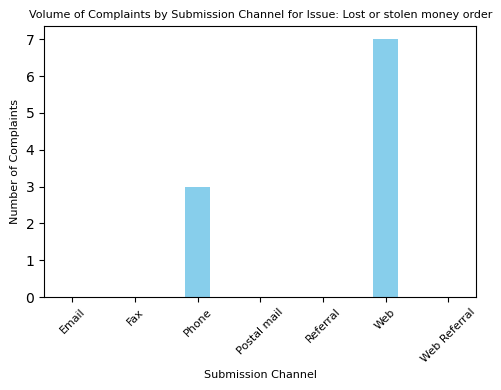

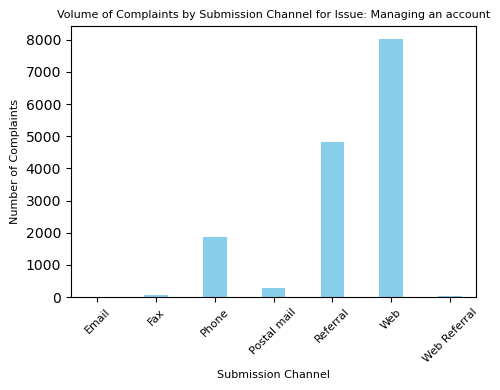

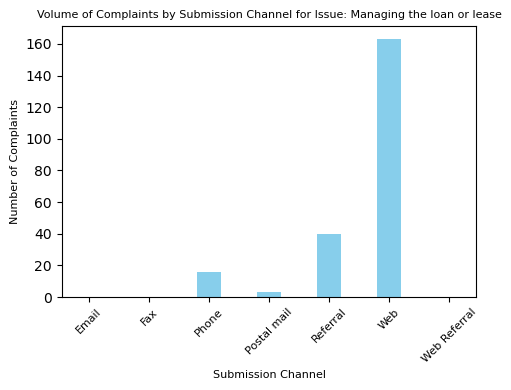

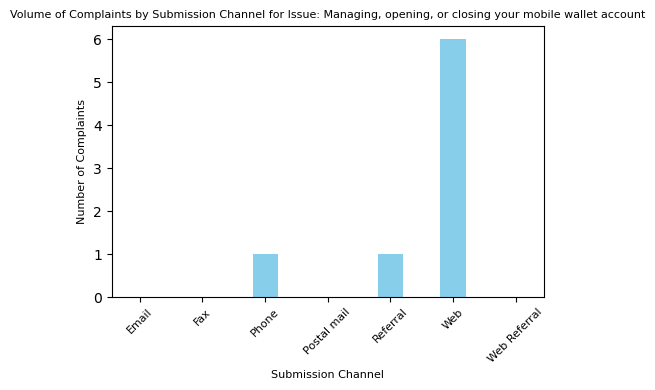

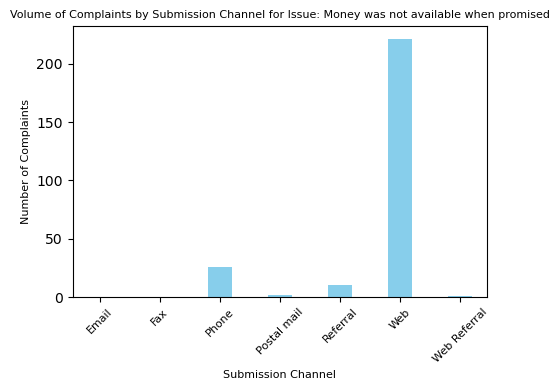

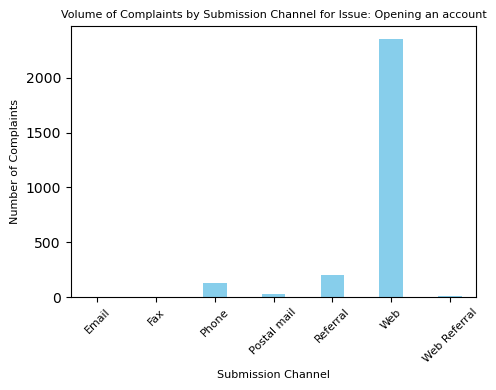

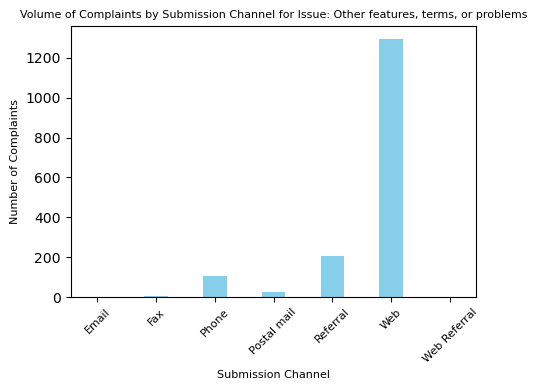

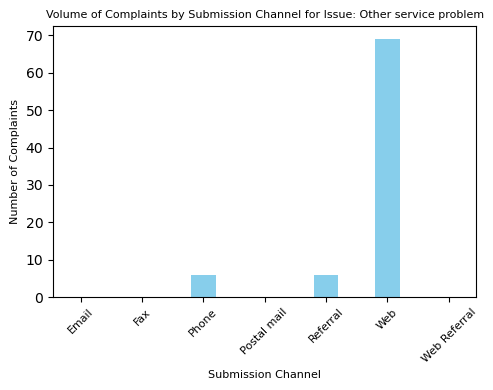

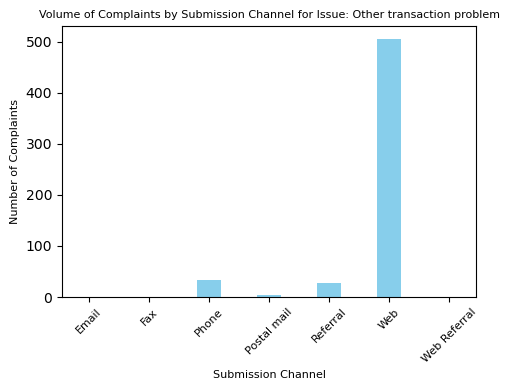

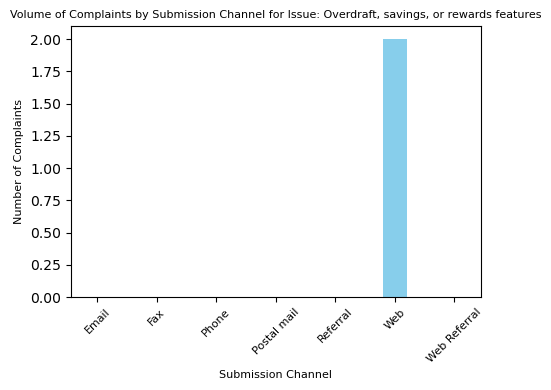

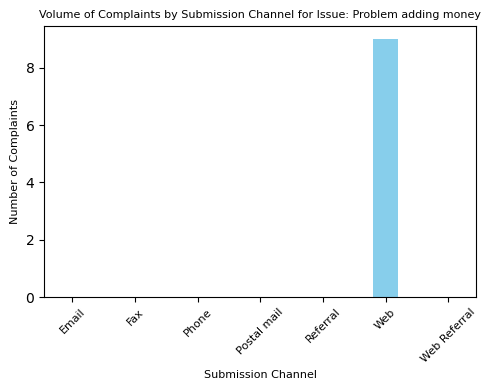

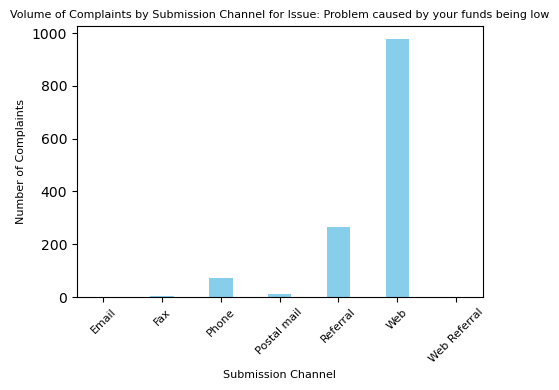

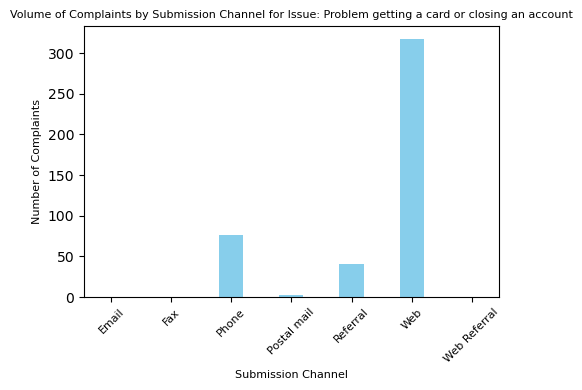

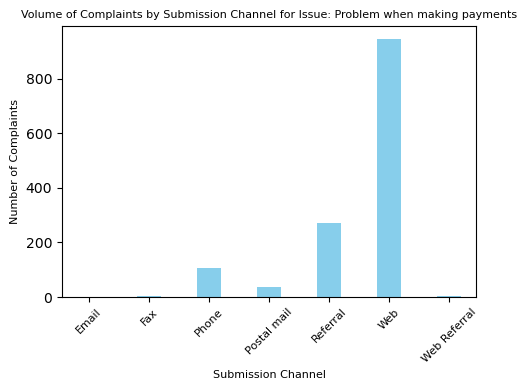

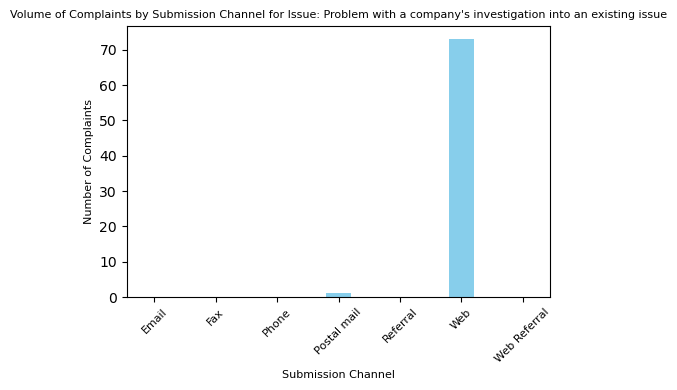

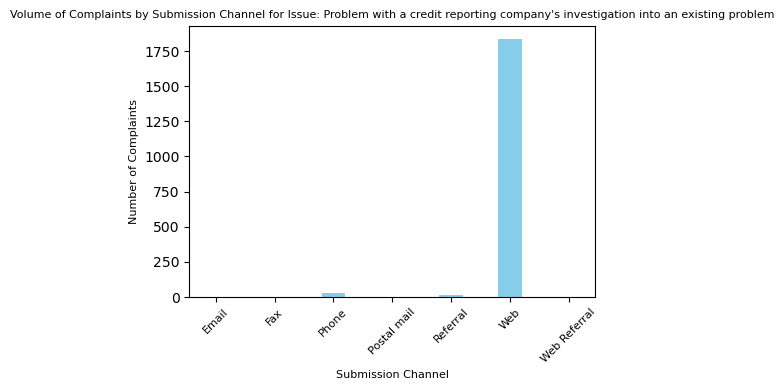

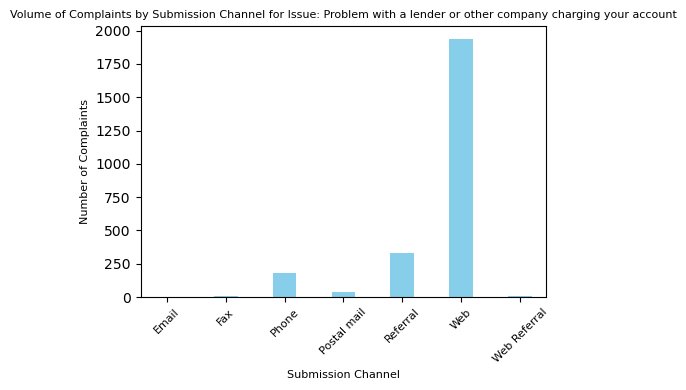

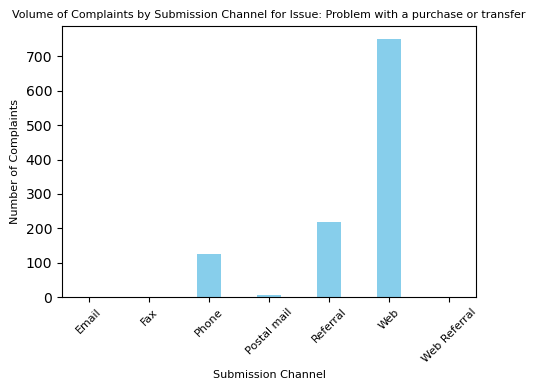

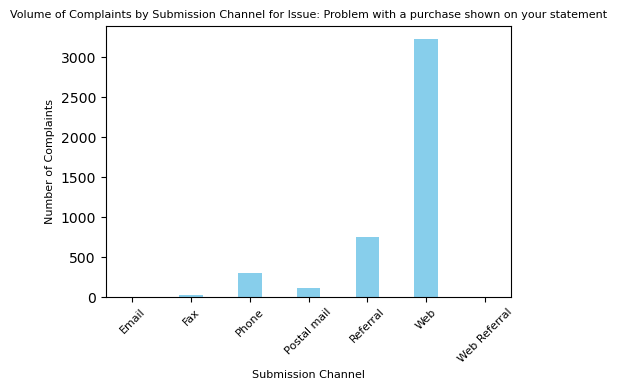

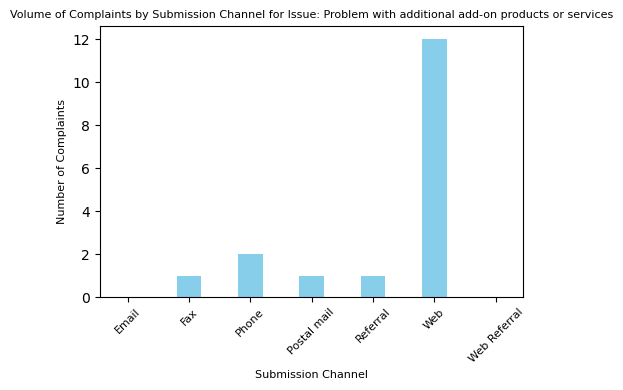

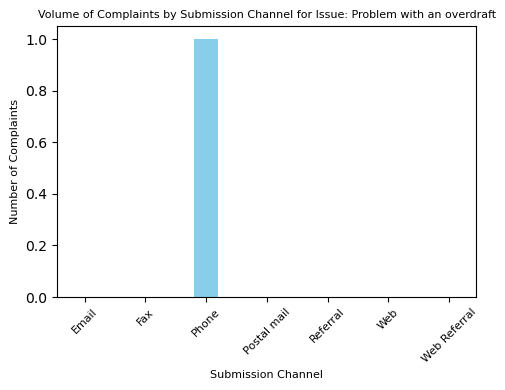

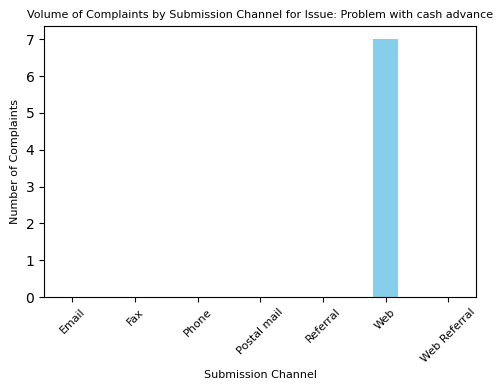

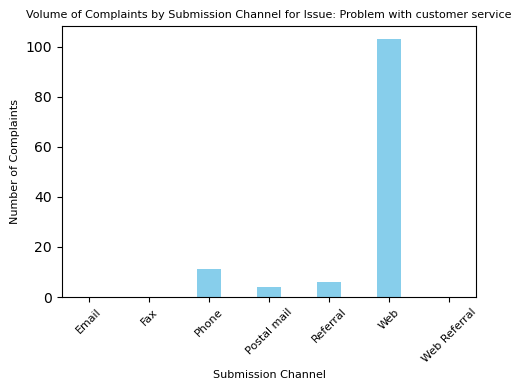

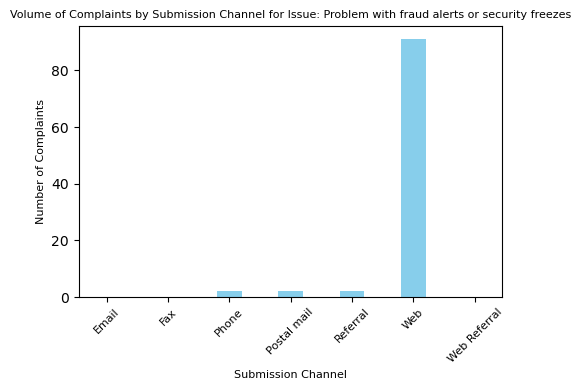

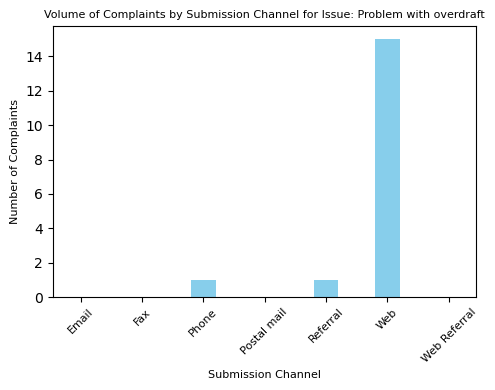

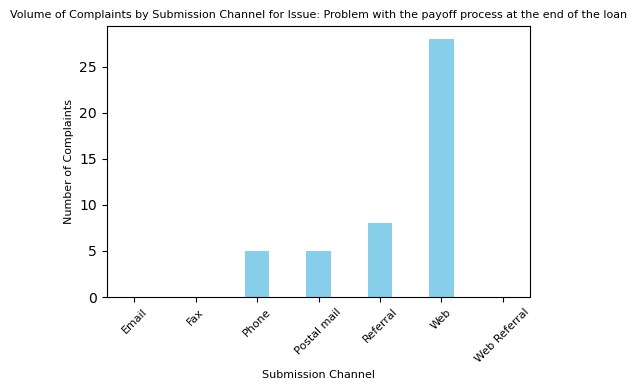

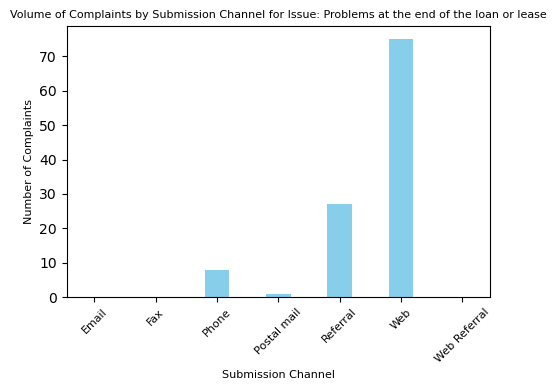

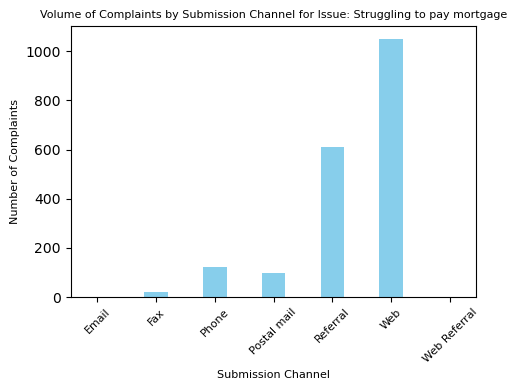

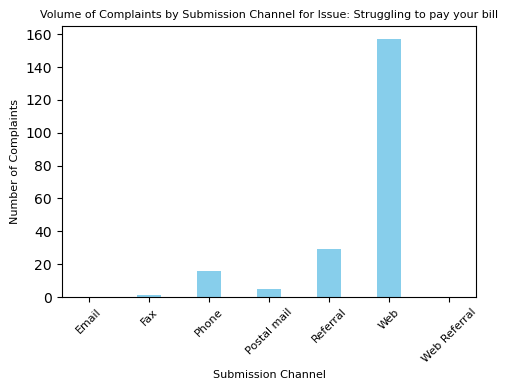

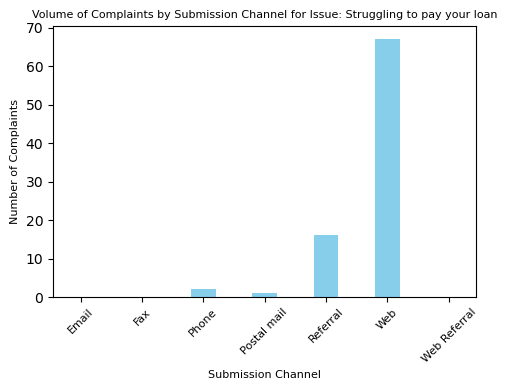

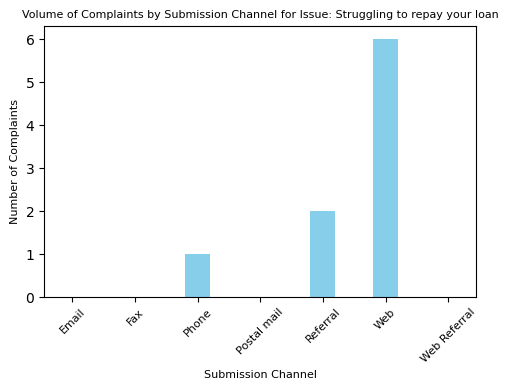

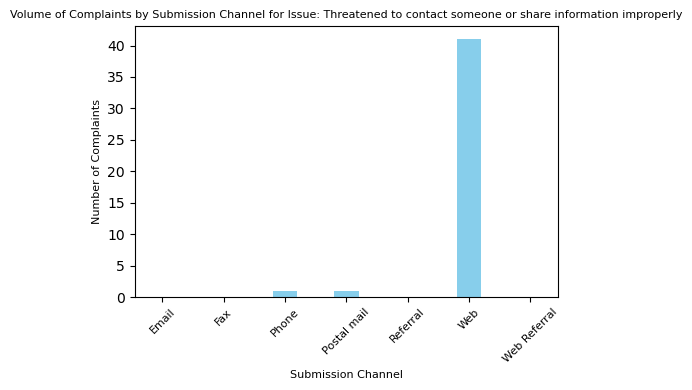

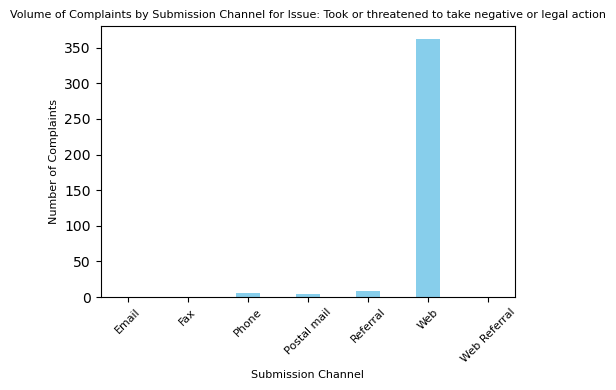

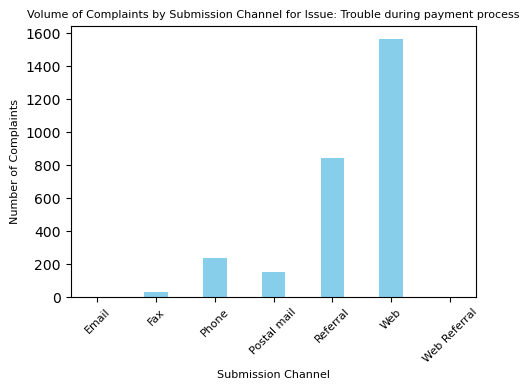

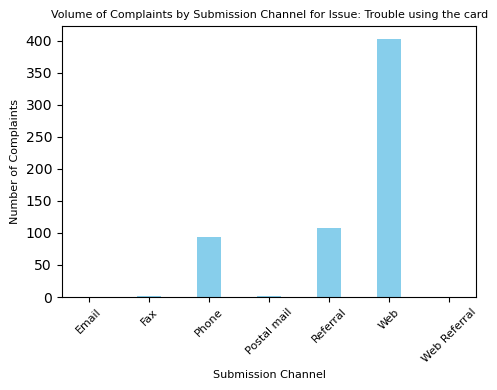

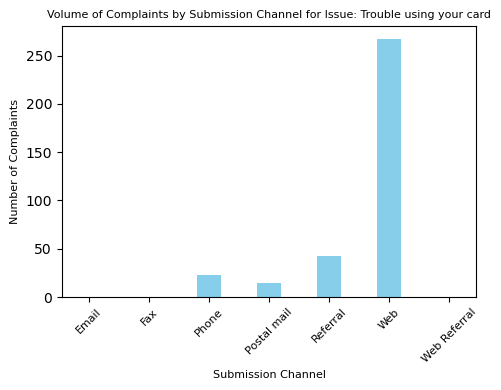

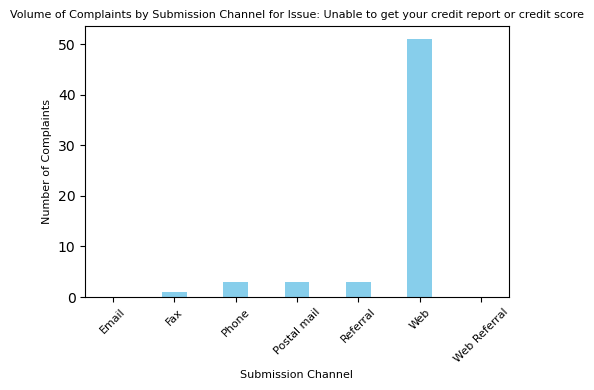

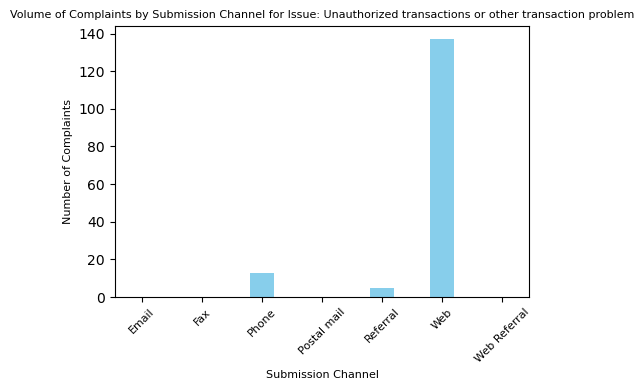

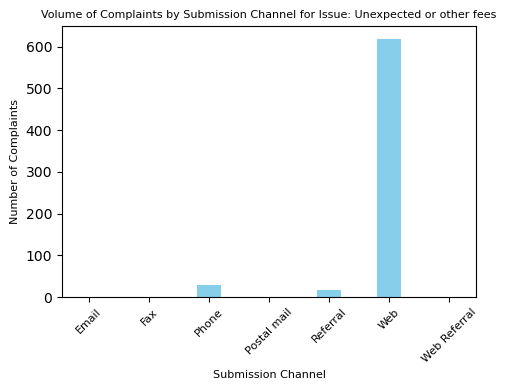

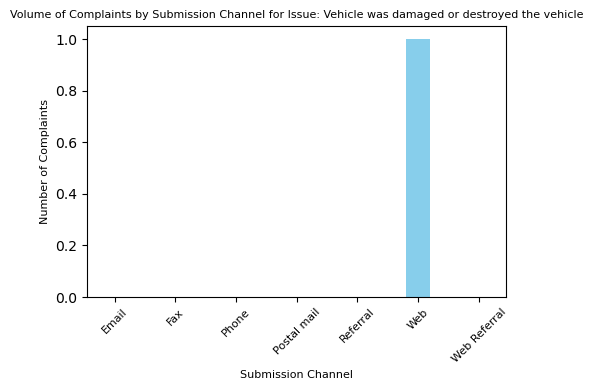

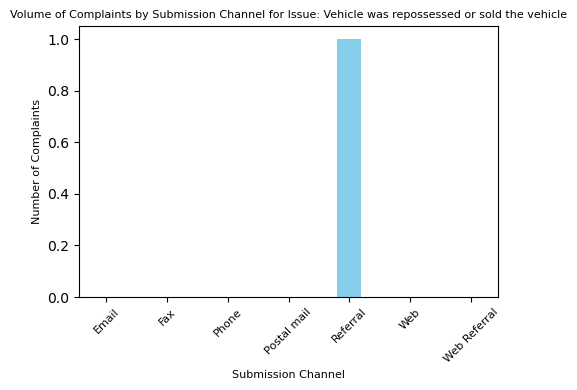

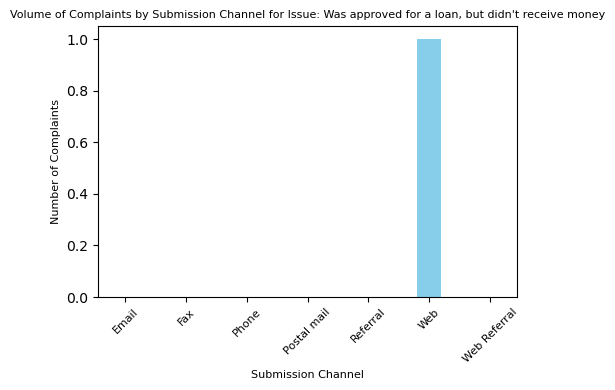

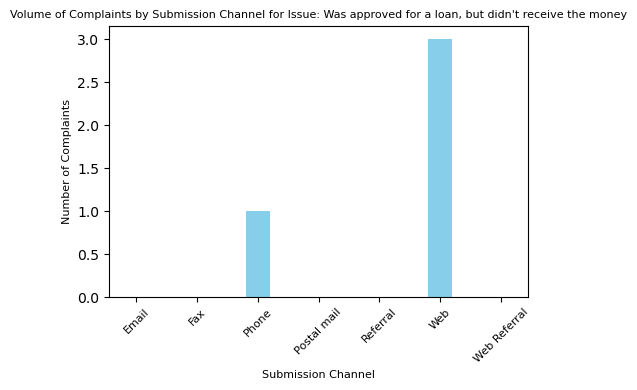

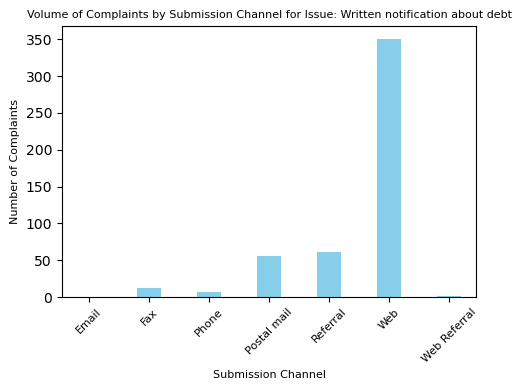

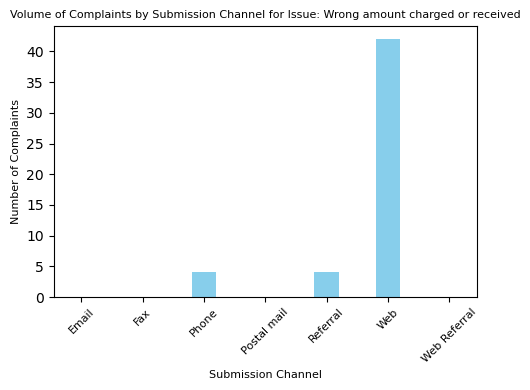

In [26]:
# Next, plot the results for each submission channel
for issue in complaints_by_channel.index:
    # Filter the complaint counts for the current issue
    comp_issue = complaints_by_channel.loc[issue]

    # Make the plot
    plt.figure(figsize=(5, 4))
    comp_issue.plot(kind='bar', color='skyblue', width=0.4)
    plt.title(f'Volume of Complaints by Submission Channel for Issue: {issue}', fontsize=8)
    plt.xlabel('Submission Channel', fontsize=8)
    plt.ylabel('Number of Complaints', fontsize=8)
    plt.xticks(rotation=45, fontsize=8)
    plt.tight_layout()
    plt.show()

<a id='sp'></a>
>#### **(E) Seasonal Patterns in Complaints:**
<p>Use the Date submitted and Date received columns to see if complaints peak in particular seasons, which might indicate recurring service disruptions or other cyclical issues.</p>



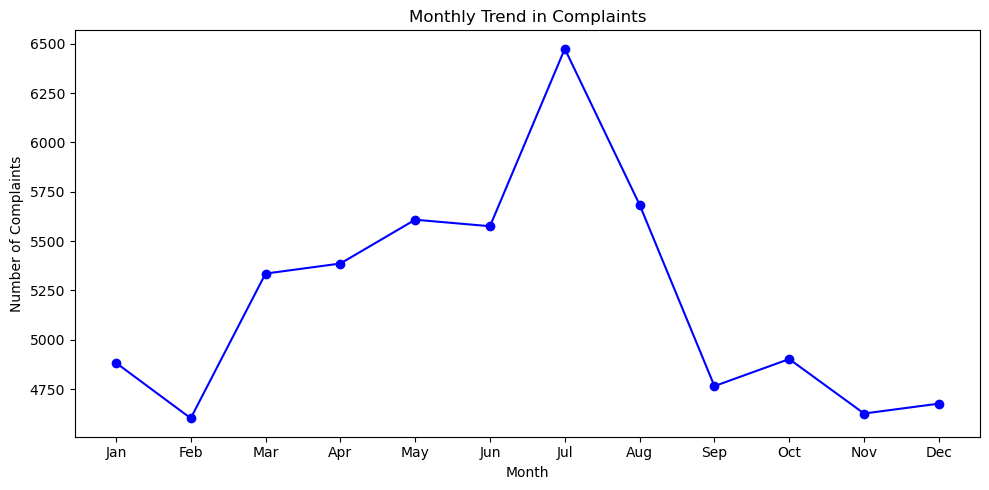

In [38]:
# Convert date columns to datetime format
df['Date submitted'] = pd.to_datetime(df['Date submitted'], errors='coerce')
df['Date received'] = pd.to_datetime(df['Date received'], errors='coerce')

# Extract month and season from Date submitted
df['Month'] = df['Date submitted'].dt.month
df['Season'] = df['Date submitted'].dt.month % 12 // 3 + 1  # Map months to seasons: 1=Winter, 2=Spring, etc.

# Replace season numbers with labels
season_labels = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
df['Season'] = df['Season'].map(season_labels)

# Group by month and season to get counts
monthly_counts = df['Month'].value_counts().sort_index()
seasonal_counts = df['Season'].value_counts().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plot monthly trend
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='line', marker='o', color='blue')
plt.title('Monthly Trend in Complaints')
plt.xlabel('Month')
plt.ylabel('Number of Complaints')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(False)
plt.tight_layout()
plt.show()

>**Observation:**
From the line chart, it can be observed that the number of complaints are less during the end of the year (October to December) and only begin to pickup during March with the peak happening during July (mid-year)

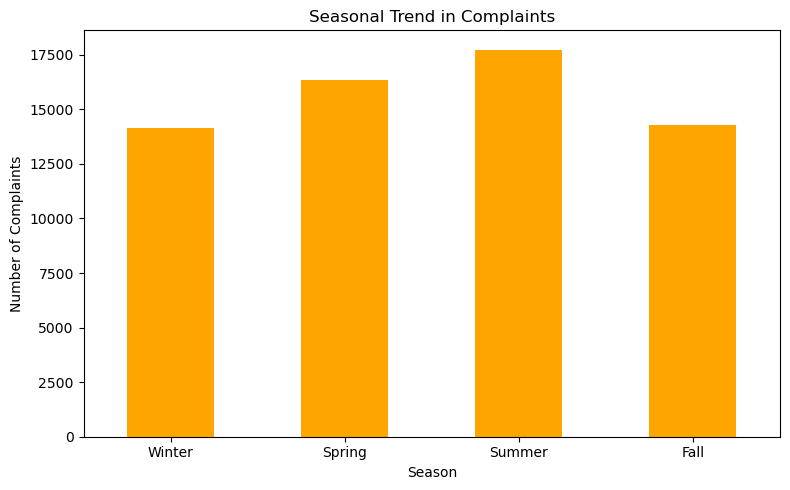

In [28]:
# Plot seasonal trend
plt.figure(figsize=(8, 5))
seasonal_counts.plot(kind='bar', color='orange')
plt.title('Seasonal Trend in Complaints')
plt.xlabel('Season')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

>**Observation:**
Most complaints happen during Summer as seen in the bar chart above. This is true as in the previous line chart where most of the complaints happen in July which falls under Summer.

<a id='tr'></a>
>#### **(F) Timeliness and Effectiveness of Responses:**
<p>Study the distribution of Timely response? to understand if delayed responses are associated with particular complaint types or channels.</p>

In [29]:
# Group by 'Issue' and 'Timely response?', then count occurrences
issue_timely_distribution = df.groupby(['Issue', 'Timely response?']).size().unstack(fill_value=0)

# Calculate percentage of timely responses within each issue
issue_timely_distribution['Timely_Percentage'] = (issue_timely_distribution['Yes'] / issue_timely_distribution.sum(axis=1) * 100)

print(issue_timely_distribution)

Timely response?                                    In progress   No   Yes  \
Issue                                                                        
Advertising                                                   1    0    13   
Advertising and marketing, including promotiona...           22   16   449   
Applying for a mortgage or refinancing an exist...            9    4  1004   
Attempts to collect debt not owed                            15  118  1218   
Can't contact lender or servicer                              1    0     7   
...                                                         ...  ...   ...   
Vehicle was repossessed or sold the vehicle                   0    0     1   
Was approved for a loan, but didn't receive money             0    0     1   
Was approved for a loan, but didn't receive the...            0    0     4   
Written notification about debt                              10   18   459   
Wrong amount charged or received                              1 

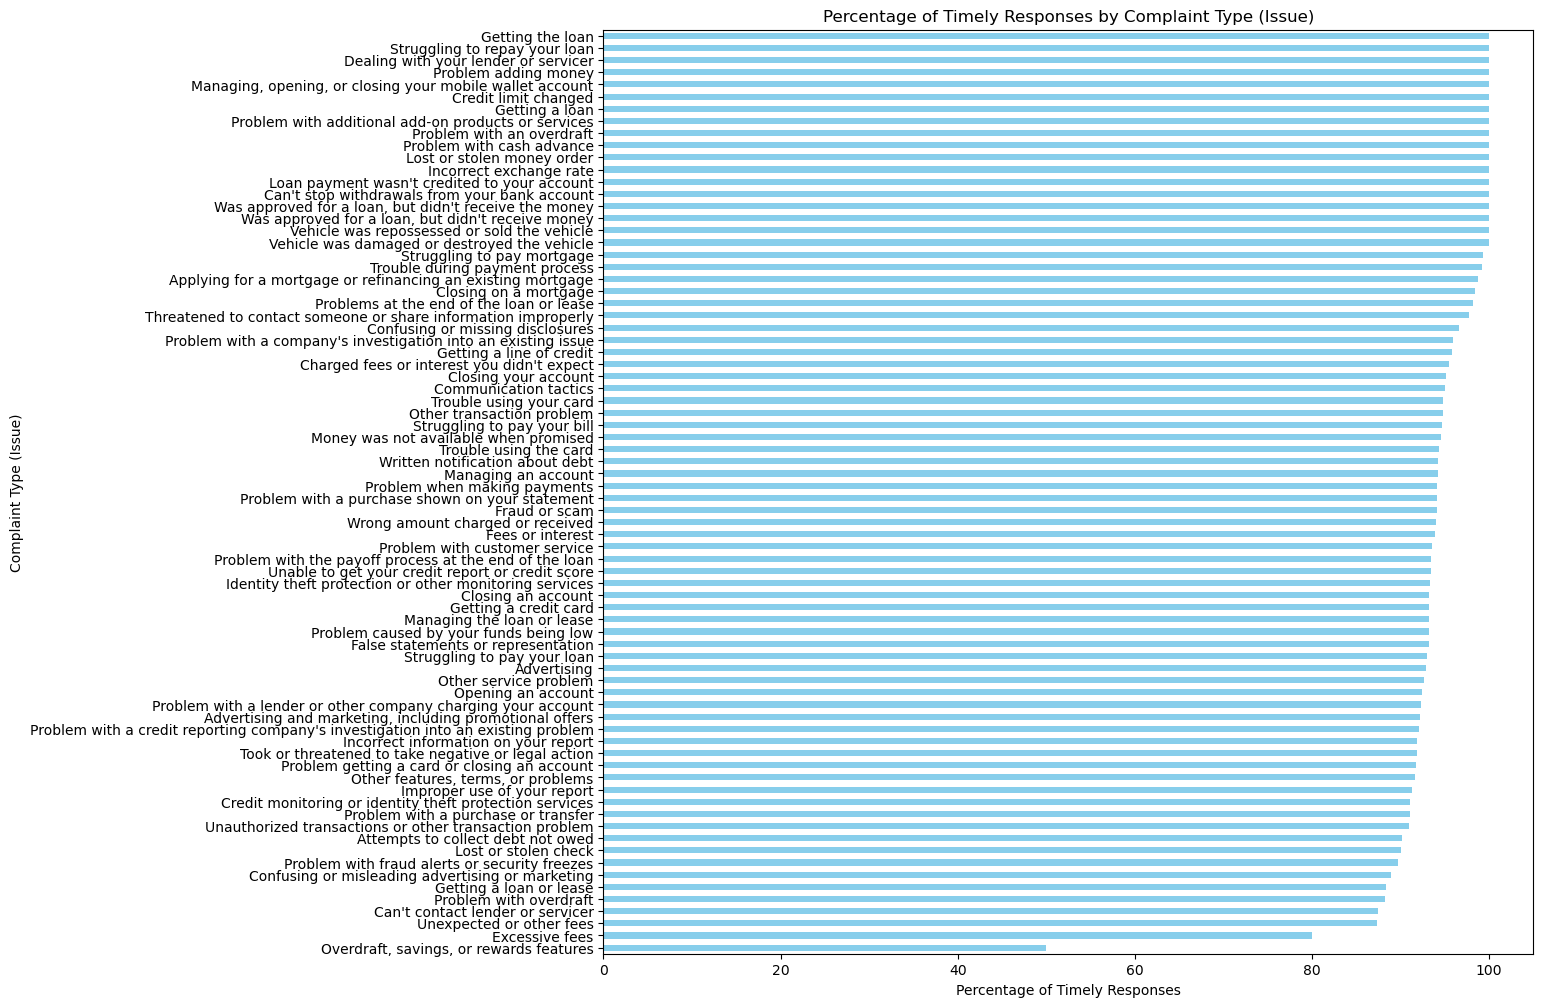

In [30]:
# Sort by percentage and plot
issue_timely_distribution['Timely_Percentage'].sort_values().plot(kind='barh', color='skyblue', figsize=(12, 12))
plt.title("Percentage of Timely Responses by Complaint Type (Issue)")
plt.xlabel("Percentage of Timely Responses")
plt.ylabel("Complaint Type (Issue)")
plt.show()

>**Observations:** </br>
Most Issues have a percentage of timely response above the upper quartile, this means that most issues are quickly responded to. However, <b>Overdraft, savings, or rewards features issues </b> have a poor percentage, meaning respondents don't attend to them as quickly as other issues

In [31]:
# Group by 'Submitted via' and 'Timely response?', then count occurrences
channel_timely_distribution = df.groupby(['Submitted via', 'Timely response?']).size().unstack(fill_value=0)

# Calculate percentage of timely responses within each channel
channel_timely_distribution['Timely_Percentage'] = (channel_timely_distribution['Yes'] / channel_timely_distribution.sum(axis=1) * 100)

print(channel_timely_distribution)

Timely response?  In progress    No    Yes  Timely_Percentage
Submitted via                                                
Email                       0     0      2         100.000000
Fax                         0     1    232          99.570815
Phone                     132   172   4380          93.509821
Postal mail                 8    28   1282          97.268589
Referral                   51   281  10434          96.916218
Web                      1296  1917  42210          92.926491
Web Referral                7     4     79          87.777778


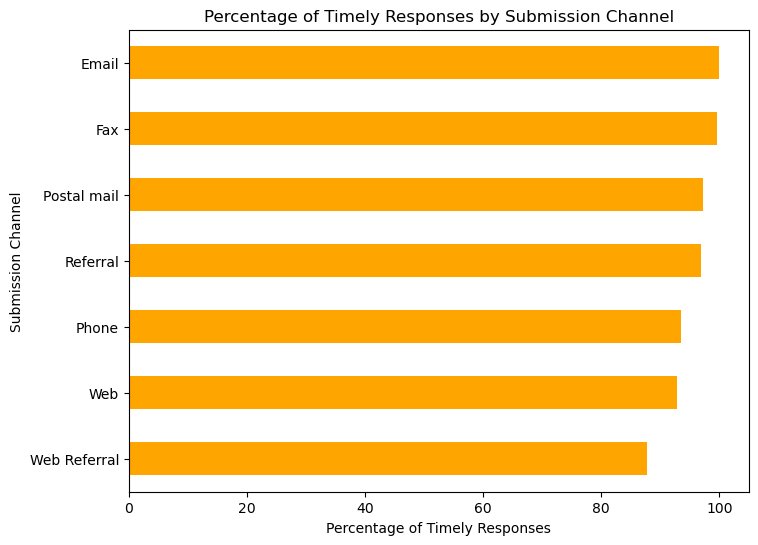

In [32]:
# Sort by percentage and plot
channel_timely_distribution['Timely_Percentage'].sort_values().plot(kind='barh', color='orange', figsize=(8, 6))
plt.title("Percentage of Timely Responses by Submission Channel")
plt.xlabel("Percentage of Timely Responses")
plt.ylabel("Submission Channel")
plt.show()

>**Observations:** </br>
<b>Complaints submitted via Email</b> have the highest percentage of timely responses, closely followed by complaints via postal mail.</br>
Web referral-based complaints have the lowest percentage of timely responses; however, based on the volume of complaints by channel, <b>complaints raised via Web have the lowest timely response percentage (1,917 complaints with no timely response) </b>

<a id='ssa'></a>
> #### **G) State-specific Analyses**

Here we want to draw insights regarding the following:
- Complaint Hotspots: States with the highest complaint volumes.
- Most Common Issues by State: Which complaint types are frequent in specific states.
- Response Timeliness: Which states have the fastest and slowest response times.

In [33]:
# Display unique states
unique_states = df['State'].unique()
print(f"Unique states in the dataset: {unique_states}")

Unique states in the dataset: ['NY' 'FL' 'CA' 'VA' 'TX' 'KS' 'GA' 'CT' 'OH' 'NJ' 'IL' 'MI' 'NC' 'PA'
 'WA' 'IN' 'MA' 'MD' 'NV' 'TN' 'AZ' 'MO' 'DC' 'ID' 'MS' 'CO' 'OR' 'MN'
 'KY' 'AR' 'NH' 'NM' 'UT' 'SC' 'AL' 'DE' 'OK' 'LA' 'RI' 'WI' 'IA' 'ME'
 'WV' 'VT' 'NE' 'SD' 'HI' 'AK' 'MT' 'ND' 'WY']


In [34]:
# Let's create a new column with the Full names of the states
# Dictionary for state abbreviations to full names
state_abbrev_to_name = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas',
    'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana',
    'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico',
    'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
    'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming', 'DC': 'Washington DC'
}
# Create a new  'State_Full_Name' column from abbreviations dictionary
df['State Full Name'] = df['State'].map(state_abbrev_to_name)

# Check dataframe for new column
df.head(5)

Complaint ID Submitted via Date submitted Date received State  \
0       4848023      Referral     2021-10-24    2021-10-27    NY   
1       3621464           Web     2020-04-24    2020-04-24    FL   
2       5818349           Web     2022-07-27    2022-07-27    CA   
3       7233015      Referral     2023-07-10    2023-07-11    CA   
4       5820224      Referral     2022-07-27    2022-07-28    VA   

                                             Product  \
0                                           Mortgage   
1  Money transfer, virtual currency, or money ser...   
2  Credit reporting, credit repair services, or o...   
3                        Credit card or prepaid card   
4                        Credit card or prepaid card   

                                  Sub-product  \
0                  Conventional home mortgage   
1                   Refund anticipation check   
2                            Credit reporting   
3                General-purpose prepaid card   
4  General-purpose credit card or charge card   

                                               Issue  \
0  Applying for a mortgage or refinancing an exis...   
1                               Lost or stolen check   
2               Incorrect information on your report   
3       Problem getting a card or closing an account   
4                               Closing your account   

                                           Sub-issue  \
0                                                NaN   
1                                                NaN   
2                      Account information incorrect   
3  Trouble getting, activating, or registering a ...   
4                        Company closed your account   

                             Company public response  \
0  Company has responded to the consumer and the ...   
1  Company has responded to the consumer and the ...   
2  Company has responded to the consumer and the ...   
3                                        No response   
4  Company has responded to the consumer and the ...   

  Company response to consumer Timely response? Year_Month  Year  Month  \
0      Closed with explanation              Yes    2021-10  2021     10   
1  Closed with monetary relief              Yes    2020-04  2020      4   
2      Closed with explanation              Yes    2022-07  2022      7   
3                  In progress      In progress    2023-07  2023      7   
4      Closed with explanation              Yes    2022-07  2022      7   

   Season State Full Name  
0    Fall        New York  
1  Spring         Florida  
2  Summer      California  
3  Summer      California  
4  Summer        Virginia

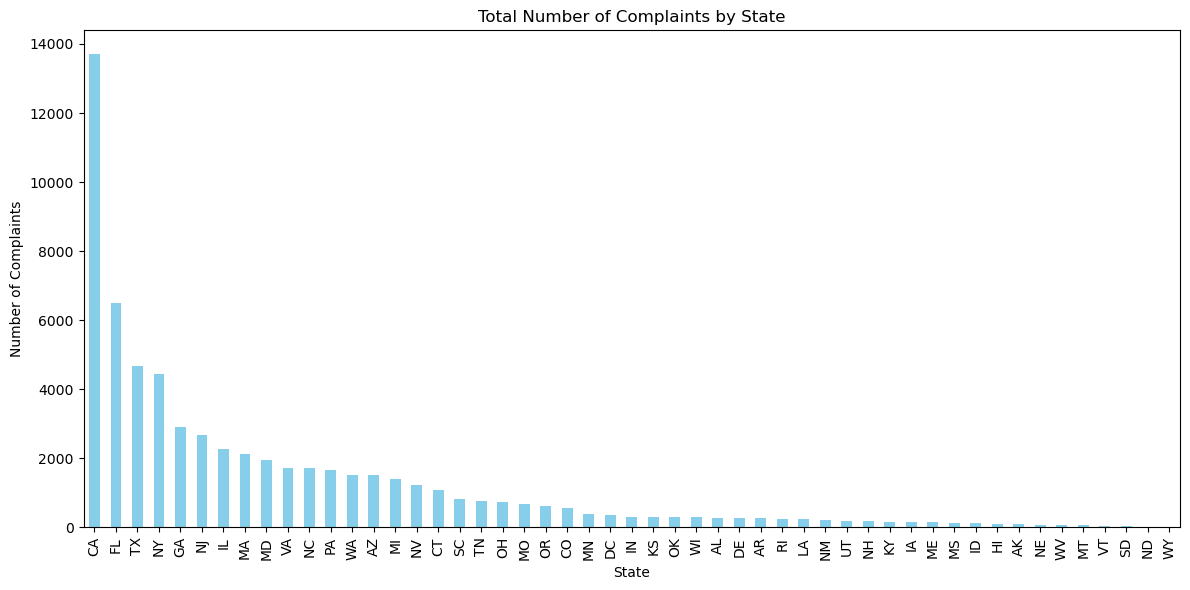

In [35]:
# Count complaints by state
complaints_by_state = df['State'].value_counts()

# Plot complaints by state
plt.figure(figsize=(12, 6))
complaints_by_state.plot(kind='bar', color='skyblue')
plt.title('Total Number of Complaints by State')
plt.xlabel('State')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

>**Observation:** The state with the highest number of complaints is <b>CA (California)</b>

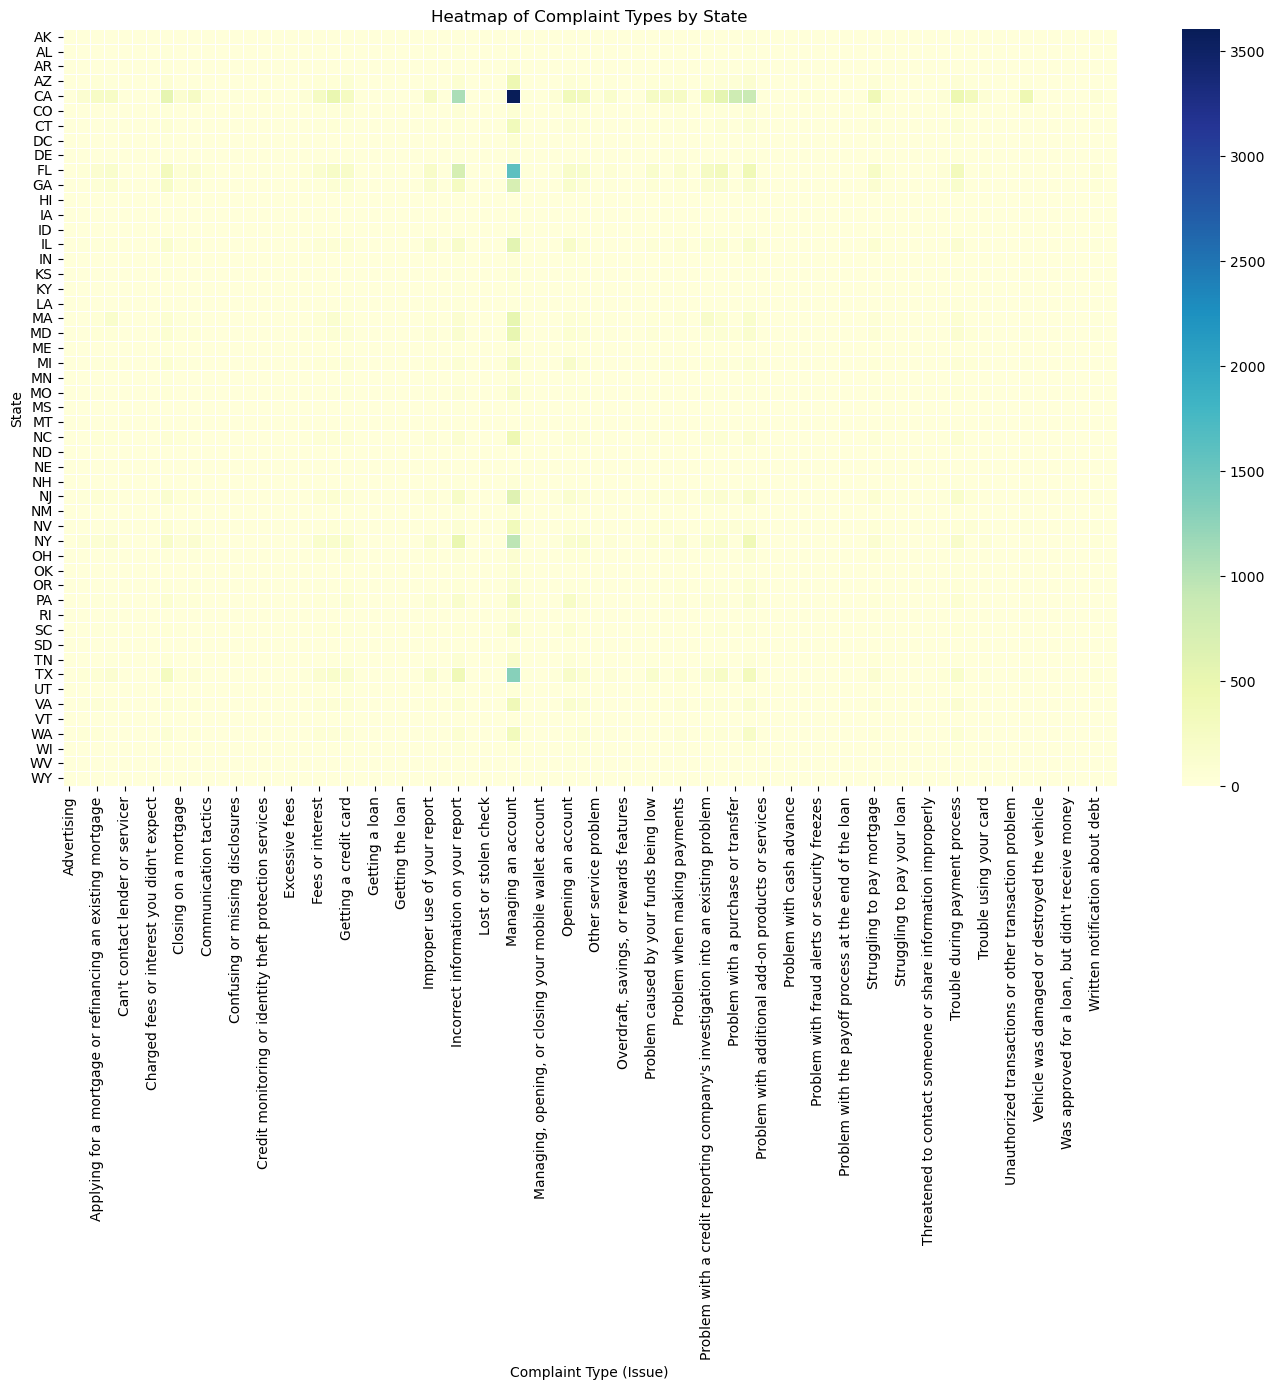

In [36]:
# Group by State and Issue, then count occurrences
complaints_by_state_issue = df.groupby(['State', 'Issue']).size().unstack(fill_value=0)

# Display top issues by state as a heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(complaints_by_state_issue, cmap='YlGnBu', linewidths=.5)
plt.title('Heatmap of Complaint Types by State')
plt.xlabel('Complaint Type (Issue)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

>**Observation:** <b>Managing an account</b> is a pressing issue in California, as well as in Texas and Floria

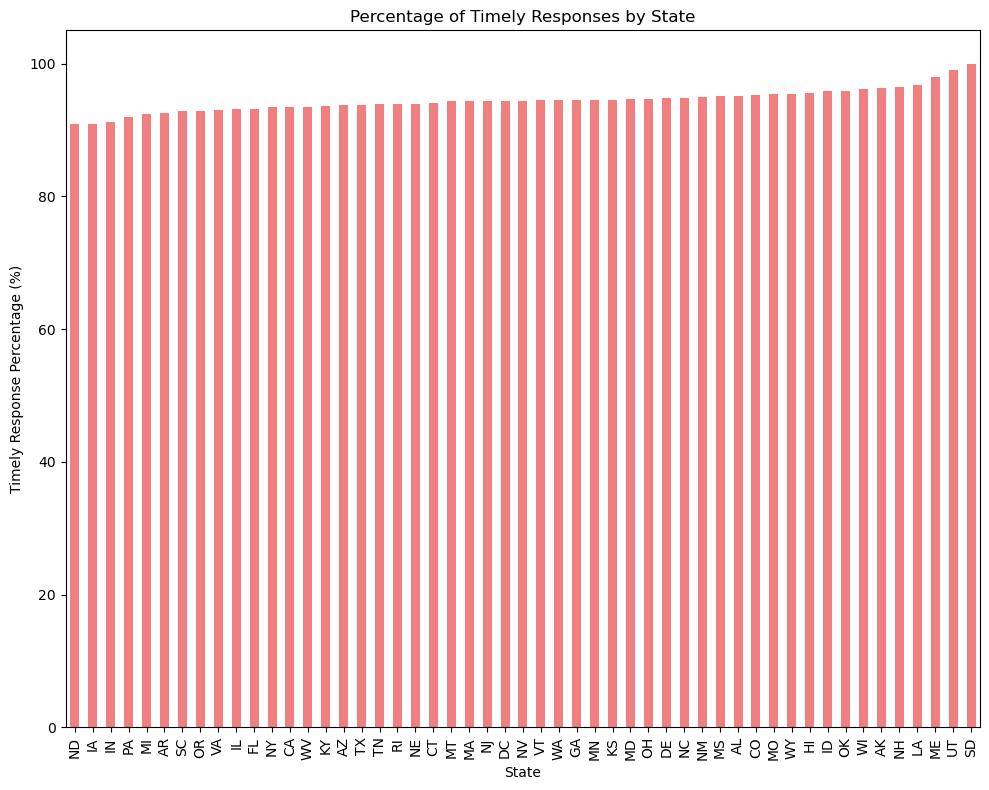

In [40]:
# Group by State and Timely response to get counts
timely_response_by_state = df.groupby(['State', 'Timely response?']).size().unstack(fill_value=0)

# Calculate the percentage of timely responses for each state
timely_response_by_state['Timely_Percentage'] = (
    timely_response_by_state['Yes'] / (timely_response_by_state['Yes'] + timely_response_by_state['No'] + timely_response_by_state['In progress']) * 100)

# Plot timely response percentages by state
timely_response_by_state['Timely_Percentage'].sort_values().plot(kind='bar', color='lightcoral', figsize=(10, 8))
plt.title('Percentage of Timely Responses by State')
plt.ylabel('Timely Response Percentage (%)')
plt.xlabel('State')
plt.tight_layout()
plt.show()

>**Observations:** Complaints from SD (South Dakota) have the highest percentage of timely reponses, meaning most of the complaints from this State are attended to almost immediately. Conversely, ND (North Dakota) has the lowest timely reponse percentage

<a id="bff"></a>
    
### Business Findings from EDA

#### Which financial products or services are generating the highest volume of complaints, and are there any identifiable trends over time?

- <b>Checking or savings account</b> have the highest volume of complaints, followed by <b>Credit Card or Prepaid Card</b>

#### What are the most common issues that customers face with specific BoA products, and how do these issues vary by <b>submission channel</b>?

The most common issues that BoA customers complain about based on product category are:
<p>
    <ol>
        <li>Mortgage - <b>Trouble during payment process</b></li>
        <li>Money transfer, virtual currency, or money service - <b>Fraud or scam</b></li>
        <li>Credit reporting, credit repair services, or other personal consumer reports - <b>Incorrect information on your report</b></li>
         <li>Credit card or prepaid card - <b>Problem with a purchase shown on your statement</b></li>
        <li>Checking or savings account - <b>Managing an account</b></li>
        <li>Vehicle loan or lease  - <b>Managing the loan or lease</b></li>
        <li>Debt collection - <b>Attempts to collect debt not owed</b></li>
        <li>Payday loan, title loan, or personal loan - <b>Getting a line of credit</b></li>
        <li>Student loan - <b>Dealing with your lender or service</b></li>
    </ol>
</p>

#### Are there specific states with consistently high complaint volumes, and what are the common issues in those states?

- The state with the <b>highest number of complaints is CA (California)</b>, followed by FL (Florida)
- <b>Managing an account is the most pressing issue</b> in California, as well as in Texas and Floria
- Complaints from SD (South Dakota) have the highest percentage of timely responses, meaning most of the complaints from this State are attended to almost immediately. Conversely, ND (North Dakota) has the lowest timely response percentage

#### Are there particular seasons or periods where complaints spike, indicating potential areas for improved resource allocation?

- Most complaints happen during Summer
- The number of complaints are less during the end of the year (October to December) and only begin to pickup during March with the peak happening during July (mid-year)

#### How effective are BoA's different resolution types (e.g., explanation, monetary relief)?

<ul>
    <li>BoA has a <b>high <i>"Closed with explanation"</i> rate </b>compared with other Response Types,</li>
    <li>Next is <i>"Closed with monetary relief"</i>, though, this represents a substantial number, as it means that were complaints cannot be closed with just explanation, the next option is to close with monetary relief. BoA may need to look at how to reduce this.</li>
    <li>There are <b>no <i>"In progress"</i> </b>requests from previous years except for 2023</li>
    <li>Only a few complaints were resolved with <i>"Closed"</i> through the years, meaning it is rare to simply close complaints with no explanation or a sort of relief</li>
</ul>

#### Which complaint types most frequently receive delayed responses?

- Overdraft, savings, or rewards features issues have a poor percentage, meaning respondents don't attend to them as quickly as other issues

#### Which complaint channels have delayed responses?

- Most complaints **(45,423) were submitted via the web channel** and only a few (2) via email
- Complaints submitted via Email have the highest percentage of timely responses, closely followed by complaints via postal mail.
Web referral-based complaints have the lowest percentage of timely responses; however, based on the volume of complaints by channel, complaints raised via Web have the lowest timely response percentage (1,917 complaints with no timely response)

<a id='conclusion'></a>
### Recommendations and Conclusion

Based on the findings from my analysis, here are some actionable
business recommendations for Bank of America (BoA) to enhance customer
service and operational practices:

**1.  Enhance Support for High-Complaint Products**

-   **Focus on Checking and Savings Accounts:** Since checking or
    savings accounts have the highest volume of complaints, BoA should
    focus on optimizing the user experience, simplifying account
    management processes, and ensuring effective customer support
    channels for these products.

-   **Specialized Teams for Frequent Issues:** Common issues like
    mortgage payment processing, money transfer fraud, and incorrect
    credit report information should have dedicated support teams or
    streamlined procedures to resolve these complaints faster and more
    effectively.

**2.  Optimize Timely Responses Based on Submission Channels**

-   **Improve Web-Based Complaint Handling:** Given that web-based
    complaints have the lowest timely response rate, BoA should consider
    implementing automated triage systems or increasing staff dedicated
    to handling online complaints. Quick acknowledgment and initial
    automated responses can improve customer satisfaction, even if a
    full resolution takes time.

-   **Review Resource Allocation for Different Channels:** While email
    and postal complaints generally have higher timely response rates,
    BoA should investigate if this aligns with demand and adjust
    resources to ensure consistency across all channels.

**3.  Address Seasonal Peaks with Dynamic Resource Allocation**

-   **Increase Staffing and Support in Summer:** Since complaints peak
    during mid-year (especially July), BoA should consider hiring
    temporary support staff, enabling overtime, or optimizing workflows
    during these months. This will allow the bank to handle the higher
    complaint volumes without delays.

-   **Evaluate Seasonal Patterns for Proactive Measures**: BoA could
    identify potential factors causing these seasonal spikes and
    implement preemptive customer communications or resources to prevent
    common issues before they lead to complaints.

**4.  Reduce Dependency on Monetary Relief for Complaint Resolutions**

-   **Enhance First-Contact Resolution Quality:** Since a large number
    of complaints are closed with \"explanation,\" followed by
    \"monetary relief,\" BoA should work towards enhancing the quality
    of first-contact resolutions, aiming to resolve issues
    satisfactorily without the need for monetary compensation.

-   **Training and Empowerment of Support Staff:** Provide training that
    empowers customer service agents to resolve complaints effectively
    with clear explanations and alternative solutions where possible.
    This can help reduce reliance on monetary relief and improve overall
    customer satisfaction.

**5.  Improve Processes for Overdraft, Savings, and Rewards Issues**

-   **Prioritize Responses for Slow-Responded Issues**: Issues
        related to overdraft, savings, or rewards features often face
        delayed responses. BoA should identify the root causes behind
        these delays, whether it's workflow complexity, staffing levels,
        or specific procedural bottlenecks, and address them to ensure
        these issues receive timely attention.

-   **Process Mapping and Simplification:** Simplifying the
        processes for handling common overdraft or rewards-related
        complaints can help reduce the time required to resolve them and
        lead to faster, more efficient responses.

**6.  Monitor and Improve the "Closed with Explanation" Response**

-   **Quality Control for Explanations:** Since most complaints are
        closed with an explanation, BoA should implement quality control
        measures to ensure that explanations are clear, accurate, and
        helpful. This can reduce customer dissatisfaction and lower
        follow-up complaint rates.

 -   **Customer Feedback on Explanations**: Collect customer feedback
        specifically on whether the explanations provided were
        satisfactory. This feedback loop can help refine the way BoA
        communicates resolutions and identifies areas where additional
        support might be needed.

**7.  Focused Resource Allocation in High-Complaint States**

-   **Prioritize California and Florida:** With California (CA) and
    Florida (FL) being the states with the highest number of complaints,
    BoA should consider allocating additional resources and customer
    service support to these regions. This could include increasing
    staffing levels, extending service hours, or providing specialized
    training for common complaint types in these states.

-   **Address Account Management Issues:** Since \"managing an account\"
    is a prominent issue in California, Texas, and Florida, BoA should
    conduct a deeper investigation into account management processes
    specific to these regions. Simplifying online and mobile banking
    features, enhancing account security, and providing clearer
    guidelines for account-related issues could help reduce complaints.

**8.  Improve Timely Response Rates in Low-Performing States**

-   **Focus on North Dakota:** North Dakota (ND) has the lowest timely
    response percentage, indicating potential bottlenecks in complaint
    handling in this region. BoA should review the workflow and identify
    any delays specific to ND, such as staffing shortages, procedural
    inefficiencies, or delays in complaint routing. Investing in
    automation tools or setting up a dedicated team for North Dakota
    could help improve timely responses in this region.

-   **Adopt Best Practices from South Dakota:** South Dakota (SD) has
    the highest percentage of timely responses, meaning BoA's response
    practices in this state are effective. BoA could analyze the
    workflows, staffing structure, and response strategies used in SD
    and apply these best practices to states with lower timely response
    rates, such as North Dakota.

**9.  Implement Targeted Training and Support for Common Issues**

-   **Specialized Training for Account Management:** Since \"Managing an
    account\" is the most pressing issue in key states, BoA should
    provide specialized training for support agents in California,
    Texas, and Florida to address these issues more effectively.
    Training should focus on resolving account-related concerns swiftly
    and providing proactive guidance to prevent recurring problems.

-   **Regular Performance Reviews for Timeliness:** Implement a
    monitoring and evaluation system that tracks the timeliness of
    responses by state. This can help ensure that regions like North
    Dakota improve their response times, while high-performing states
    like South Dakota maintain their effectiveness.

These recommendations are designed to address specific trends and gaps
identified in the analysis, providing a roadmap for BoA to improve both
customer experience and operational efficiency.
ciency.
